</font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font> <font size="2">[Modeling_1](#[Modeling_1])</font> <font size="2">[Modeling_2](#[Modeling_2])</font> <font size="2">[Modeling_Train_Results](#[Modeling_Train_Results])</font> <font size="2">[Modeling_Test_Results](#[Modeling_Test_Results])</font>

In [1]:
filename_version='3dot10'

In [2]:
import sys
source_directory = "/Users/pauljacob/Library/Python/3.8/lib/python/site-packages"

sys.path.append(source_directory)

In [3]:
#file structure
!pip3 install cookiecutter

#general
!pip3 install --upgrade pip
!pip3 install ipython-autotime --quiet


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [4]:
%load_ext autotime

time: 221 µs (started: 2023-01-10 16:48:44 -08:00)


## Import Libraries

In [5]:
#get libraries
import pandas as pd
import os
import numpy as np


#get visualization libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import matplotlib.patches as mpatches



#ML preprocessing
from sklearn.preprocessing import StandardScaler

#get ML functions
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV, StratifiedKFold, learning_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


from sklearn import __version__ as sklearn_version
import datetime


#get ML metric functions
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, log_loss, auc, brier_score_loss
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay, classification_report, brier_score_loss
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import log_loss

#get icr module and associated common functions
import in_vehicle_coupon_recommendation as icr
from in_vehicle_coupon_recommendation import p, rcp, rpp, rcr, sr, pl, pdc, save_and_return_data_frame, initialize_custom_notebook_settings

#sound alert
from IPython.display import Audio

time: 1.31 s (started: 2023-01-10 16:48:44 -08:00)


In [6]:
#initialize notebook
initialize_custom_notebook_settings()

%load_ext autoreload
%autoreload 1
%aimport in_vehicle_coupon_recommendation 


time: 20.5 ms (started: 2023-01-10 16:48:45 -08:00)


## Get In-Vehicle Coupon Recommendation Dataset

In [7]:
df = pd.read_csv(os.path.join('..', 'data', 'raw', 'in-vehicle-coupon-recommendation.csv'))
df = df.sample(frac=1, random_state=200)
#p(df)

time: 35.2 ms (started: 2023-01-10 16:48:45 -08:00)


<font size="5"><a id='[Data_Wrangling]'></a></font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font>  <font size="2">[Modeling_1](#[Modeling_1])</font> <font size="2">[Modeling_2](#[Modeling_2])</font> <font size="2">[Modeling_Train_Results](#[Modeling_Train_Results])</font> <font size="2">[Modeling_Test_Results](#[Modeling_Test_Results])</font>

<font size="6"><a id='[Data_Wrangling]'>**Data Wrangling**</a> </font>

In [8]:
#rename 'passanger' and 'coupon' column
df = df.rename(columns={'passanger':'passenger', 'coupon':'coupon_venue_type'})


#decode string 'age' values to (explicit) string age ranges
column_name_age_value_list = list(df.loc[:, 'age'].unique())
column_name_age_value_list_cleaned_up = ['21-25', '46-49', '26-30', '31-35', '41-45', '50+', '36-40', '<21']
column_name_age_value_dict = dict(zip(column_name_age_value_list, column_name_age_value_list_cleaned_up))
df.loc[:, 'age'] = df.loc[:, 'age'].replace(column_name_age_value_dict)

del column_name_age_value_dict, column_name_age_value_list, column_name_age_value_list_cleaned_up


#drop column 'toCoupon_GEQ5min' because all 1's
column_name_list_not_toCoupon_GEQ5min = [column_name for column_name in df.columns if column_name != 'toCoupon_GEQ5min']
df = df.loc[:, column_name_list_not_toCoupon_GEQ5min]

del column_name_list_not_toCoupon_GEQ5min


#rename values in columns 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', and 'Restaurant20To50' to math language...
#get column name list for column values uniques that are the same as column name 'CarryAway' value uniques
column_name_list_same_unique_values = []
for column_name in df.columns:    
    value = icr.column_name_value_sets_equal(df, column_name1='CarryAway', column_name2=column_name)
    if value == 1:
        column_name_list_same_unique_values = column_name_list_same_unique_values + [column_name]
#rename values in columns 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', and 'Restaurant20To50' to math language
column_name_Bar_value_list = list(df.loc[:, 'Bar'].unique())
column_name_Bar_value_list_cleaned_up = ['never', '<1', '1-3', '>8', np.nan, '4-8']
column_name_Bar_value_dict = dict(zip(column_name_Bar_value_list, column_name_Bar_value_list_cleaned_up))
df.loc[:, column_name_list_same_unique_values] = df.loc[:, column_name_list_same_unique_values].replace(column_name_Bar_value_dict)

del column_name_Bar_value_dict, column_name_Bar_value_list, column_name_Bar_value_list_cleaned_up, column_name_list_same_unique_values


#clean up columns 'direction_same' and 'direction_opp' to 'direction_same_or_opposite'
#drop column 'direction_same'
column_name_list_not_direction_same = [column_name for column_name in df.columns if column_name != 'direction_same']
df = df.loc[:, column_name_list_not_direction_same]

del column_name_list_not_direction_same

#rename 'direction_opp' to 'direction_same_or_opposite'
df = df.rename(columns={'direction_opp':'direction_same_or_opposite'})


#solution1: fill in missing values with 'no response' or 'unknown'
column_name_list = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'car']
df.loc[:, column_name_list] = df.loc[:, column_name_list].fillna('no response')


#fix income values
income_list = df.loc[:, 'income'].drop_duplicates().to_list()
income_list_fixed = ['\$12500 - \$24999', '\$87500 - \$99999', '\$37500 - \$49999', '\$50000 - \$62499', '\$75000 - \$87499', '\$25000 - \$37499', '\$100000 or More', 'Less than \$12500', '\$62500 - \$74999']
income_dictionary = dict(zip(income_list, income_list_fixed))
df.loc[:, 'income'] = df.loc[:, 'income'].replace(income_dictionary)
p(df)



(12684, 24)


destination passenger weather  temperature  time  \
11199             Home     Alone   Sunny           80   6PM   
1474              Work     Alone   Sunny           55   7AM   
10836             Home     Alone   Sunny           30   6PM   
4567   No Urgent Place     Alone   Sunny           80  10AM   
5658   No Urgent Place     Alone   Sunny           80   2PM   
11343             Work     Alone   Sunny           80   7AM   
9036              Home     Alone   Snowy           30  10PM   
11050             Home     Alone   Sunny           80   6PM   
784               Work     Alone   Sunny           80   7AM   
1818   No Urgent Place    Kid(s)   Sunny           80  10AM   

           coupon_venue_type expiration  gender    age      maritalStatus  \
11199  Carry out & Take away         2h    Male  21-25             Single   
1474                     Bar         1d    Male  46-49    Married partner   
10836  Carry out & Take away         1d    Male  26-30             Single   
4567                     Bar         1d  Female  21-25  Unmarried partner   
5658         Restaurant(<20)         2h  Female  31-35             Single   
11343      Restaurant(20-50)         2h  Female  36-40             Single   
9036         Restaurant(<20)         2h    Male  26-30             Single   
11050      Restaurant(20-50)         1d    Male  46-49             Single   
784    Carry out & Take away         2h  Female  21-25             Single   
1818                     Bar         1d  Female  36-40    Married partner   

       has_children                               education  \
11199             0                        Bachelors degree   
1474              1  Graduate degree (Masters or Doctorate)   
10836             0                Some college - no degree   
4567              0  Graduate degree (Masters or Doctorate)   
5658              1                        Bachelors degree   
11343             1                        Bachelors degree   
9036              0                Some college - no degree   
11050             0                Some college - no degree   
784               0  Graduate degree (Masters or Doctorate)   
1818              1                        Bachelors degree   

                               occupation             income          car  \
11199                             Student  \$12500 - \$24999  no response   
1474                           Management  \$87500 - \$99999  no response   
10836                     Sales & Related  \$37500 - \$49999  no response   
4567           Education&Training&Library  \$37500 - \$49999  no response   
5658               Production Occupations  \$37500 - \$49999  no response   
11343  Food Preparation & Serving Related  \$12500 - \$24999  no response   
9036                              Student  \$12500 - \$24999  no response   
11050                     Sales & Related  Less than \$12500  no response   
784                                 Legal  \$25000 - \$37499  no response   
1818                              Retired  \$50000 - \$62499  no response   

         Bar  CoffeeHouse    CarryAway RestaurantLessThan20 Restaurant20To50  \
11199  never  no response  no response          no response            never   
1474   never           <1           <1                never               <1   
10836     <1  no response           >8                   <1            never   
4567     1-3           <1           <1                   <1            never   
5658   never        never           >8                  4-8            never   
11343    1-3           <1           >8                never            never   
9036      <1        never           >8                never              1-3   
11050     <1           <1           >8                   >8               >8   
784       <1           <1           <1          no response               <1   
1818     1-3        never           >8                   <1            never   

       toCoupon_GEQ15min  toCoupon_GEQ25min  d

time: 84.4 ms (started: 2023-01-10 16:48:45 -08:00)


### Store df_pre_feature_engineering from df

In [9]:
# df_pre_feature_engineering = df.copy()
# p(df_pre_feature_engineering)

time: 486 µs (started: 2023-01-10 16:48:46 -08:00)


In [10]:
column_name_list_scenario = ['destination', 'passenger', 'weather', 'temperature', 'time', 'coupon_venue_type', 'expiration', 
                             'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same_or_opposite']
pl(column_name_list_scenario)


10


['destination',
 'passenger',
 'weather',
 'temperature',
 'time',
 'coupon_venue_type',
 'expiration',
 'toCoupon_GEQ15min',
 'toCoupon_GEQ25min',
 'direction_same_or_opposite']

time: 1.79 ms (started: 2023-01-10 16:48:46 -08:00)


In [11]:
df.loc[:, column_name_list_scenario].drop_duplicates().shape

(201, 10)

time: 7.76 ms (started: 2023-01-10 16:48:46 -08:00)


In [12]:
df.loc[:, column_name_list_scenario].drop_duplicates() #there are plenty of combinations of sceanrios, what are the scenario counts??

#are some scenarios not represented and why???

destination  passenger weather  temperature  time  \
11199             Home      Alone   Sunny           80   6PM   
1474              Work      Alone   Sunny           55   7AM   
10836             Home      Alone   Sunny           30   6PM   
4567   No Urgent Place      Alone   Sunny           80  10AM   
5658   No Urgent Place      Alone   Sunny           80   2PM   
431    No Urgent Place  Friend(s)   Sunny           80  10AM   
11668  No Urgent Place    Partner   Rainy           55   6PM   
473    No Urgent Place      Alone   Sunny           55   2PM   
4732              Home      Alone   Sunny           80  10PM   
2323   No Urgent Place  Friend(s)   Sunny           80   6PM   
3256   No Urgent Place  Friend(s)   Sunny           55   2PM   
3122   No Urgent Place  Friend(s)   Sunny           80   6PM   
9648   No Urgent Place      Alone   Sunny           30  10AM   
7329   No Urgent Place     Kid(s)   Snowy           30   6PM   
3523   No Urgent Place    Partner   Sunny           80  10AM   
2611   No Urgent Place     Kid(s)   Sunny           80  10AM   
4376   No Urgent Place    Partner   Sunny           80   2PM   
3898   No Urgent Place  Friend(s)   Sunny           55   2PM   
637    No Urgent Place  Friend(s)   Sunny           80   2PM   
5743   No Urgent Place  Friend(s)   Sunny           80   2PM   
5041   No Urgent Place     Kid(s)   Sunny           80  10AM   
8375   No Urgent Place     Kid(s)   Sunny           80   2PM   
9309              Work      Alone   Rainy           55   7AM   
12317             Home      Alone   Rainy           55  10PM   
2958              Work      Alone   Sunny           55   7AM   
11295             Work      Alone   Rainy           55   7AM   
4211              Home      Alone   Sunny           80  10PM   
2197              Home      Alone   Sunny           55   6PM   
196    No Urgent Place  Friend(s)   Sunny           80  10AM   
727    No Urgent Place  Friend(s)   Sunny           80   2PM   
5395   No Urgent Place  Friend(s)   Sunny           55   2PM   
9850              Work      Alone   Sunny           30   7AM   
6698              Home      Alone   Sunny           55   6PM   
4767   No Urgent Place  Friend(s)   Sunny           80   6PM   
4543              Work      Alone   Sunny           80   7AM   
9058              Home      Alone   Rainy           55   6PM   
9738   No Urgent Place      Alone   Sunny           80  10PM   
10417             Home      Alone   Sunny           80  10PM   
3182              Work      Alone   Sunny           80   7AM   
1516              Home      Alone   Sunny           80   6PM   
12604             Home      Alone   Sunny           80   6PM   
11037  No Urgent Place  Friend(s)   Sunny           80  10PM   
2746   No Urgent Place      Alone   Sunny           55  10AM   
9947   No Urgent Place  Friend(s)   Sunny           55  10AM   
12621  No Urgent Place    Partner   Snowy           30  10AM   
7861   No Urgent Place  Friend(s)   Sunny           80  10AM   
7903              Work      Alone   Sunny           80   7AM   
11087  No Urgent Place      Alone   Sunny           80  10AM   
6616              Home     Kid(s)   Snowy           30  10PM   
923               Work      Alone   Sunny           55   7AM   
9118   No Urgent Place     Kid(s)   Sunny           80  10AM   
1354   No Urgent Place    Partner   Sunny           80  10AM   
7607   No Urgent Place  Friend(s)   Rainy           55  10PM   
2083   No Urgent Place     Kid(s)   Sunny           80   2PM   
10105  No Urgent Place     Kid(s)   Sunny           80   2PM   
9609              Home      Alone   Snowy           30  10PM   
9778   No Urgent Place  Friend(s)   Rainy           55  10PM   
8431   No Urgent Place     Kid(s)   Rainy           55  10PM   
8557              Work      Alone   Rainy           55   7AM   
7835              Work      Alone   Snowy           30   7AM   
4289   No Urgent Place    Partner   Sunny           80  10AM   
8990              Home      Alone   Sunny  

time: 31.5 ms (started: 2023-01-10 16:48:46 -08:00)


In [13]:
df.loc[:, column_name_list_scenario].value_counts() #yes, the most represented scenario is heading to Work, alone, sunny weather, 55 degrees, 7am, bar, 
#1 day til expiration, >25 minute away in the opposite drive direction of destination


destination      passenger  weather  temperature  time  coupon_venue_type      expiration  toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same_or_opposite
Work             Alone      Sunny    55           7AM   Bar                    1d          1                  1                  1                             194
No Urgent Place  Friend(s)  Sunny    55           2PM   Carry out & Take away  1d          1                  0                  1                             181
                                     80           2PM   Coffee House           2h          1                  0                  1                             181
Work             Alone      Sunny    80           7AM   Carry out & Take away  2h          0                  0                  0                             181
No Urgent Place  Alone      Sunny    55           2PM   Restaurant(<20)        1d          0                  0                  1                             181
                 Friend(s)  S

time: 14.2 ms (started: 2023-01-10 16:48:46 -08:00)


In [14]:
#how many permutations is there?

#expiration is 2
#temperature is 3
#time is 5

#201


time: 551 µs (started: 2023-01-10 16:48:46 -08:00)


In [15]:
df.value_counts('expiration') #imbalance in the expiration date??? why???? how does this influence our analysis????

expiration
1d    7091
2h    5593
dtype: int64

time: 3.2 ms (started: 2023-01-10 16:48:46 -08:00)


In [16]:
7091 / (7091 + 5593)

0.5590507726269316

time: 1.41 ms (started: 2023-01-10 16:48:46 -08:00)


In [17]:
df.loc[:, column_name_list_scenario].drop_duplicates().value_counts('expiration')

expiration
1d    118
2h     83
dtype: int64

time: 9.57 ms (started: 2023-01-10 16:48:46 -08:00)


In [18]:
101 / (101 + 73)

0.5804597701149425

time: 1.33 ms (started: 2023-01-10 16:48:46 -08:00)


<font size="5"><a id='[Feature_Engineering]'></a></font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font>  <font size="2">[Modeling_1](#[Modeling_1])</font> <font size="2">[Modeling_2](#[Modeling_2])</font> <font size="2">[Modeling_Train_Results](#[Modeling_Train_Results])</font> <font size="2">[Modeling_Test_Results](#[Modeling_Test_Results])</font>

<font size="6"><a id='[Feature_Engineering]'>**Feature Engineering**</a> </font>

## Get Category Representative Numeric Encoding for Features: expiration, time, age, income

In [19]:
#category representative numeric encoding: expiration, time, age, income

expiration_category_representative_numeric_encoding={'expiration':{'2h':2, '1d':24}}
time_category_representative_numeric_encoding={'time':{'7AM':7,'10AM':10, '2PM':14, '6PM':18, '10PM':22}}
age_category_representative_numeric_encoding={'age':{'<21':18, '21-25':23, '26-30':28, '31-35':33, '36-40':38, '41-45':43, '46-49':48, '50+':56}}
income_category_representative_numeric_encoding={'income':{'Less than \$12500':6250, '\$12500 - \$24999':18749.5, '\$25000 - \$37499':31249.5, '\$37500 - \$49999':43749.5, '\$50000 - \$62499':56249.5, '\$62500 - \$74999':68749.5, '\$75000 - \$87499':81249.5, '\$87500 - \$99999':93749.5,'\$100000 or More':150000}}

#combine category representative numeric encoding dictionaries
category_representative_numeric_encoding_dictionary = expiration_category_representative_numeric_encoding|time_category_representative_numeric_encoding|age_category_representative_numeric_encoding|income_category_representative_numeric_encoding

del expiration_category_representative_numeric_encoding, time_category_representative_numeric_encoding, age_category_representative_numeric_encoding, income_category_representative_numeric_encoding

category_representative_numeric_encoding_key_list = list(category_representative_numeric_encoding_dictionary.keys())

df_category_representative_numeric_encoding = df.loc[:, category_representative_numeric_encoding_key_list].replace(category_representative_numeric_encoding_dictionary)

del category_representative_numeric_encoding_dictionary, 

#rename columns
category_representative_numeric_encoding_substring='_category_representative_numeric_encoding'

column_name_list_category_representative_numeric_encoding = [str(column_name) + category_representative_numeric_encoding_substring for column_name in category_representative_numeric_encoding_key_list]

column_name_dictionary_category_representative_numeric_encoding = dict(zip(category_representative_numeric_encoding_key_list, column_name_list_category_representative_numeric_encoding))

df_category_representative_numeric_encoding = df_category_representative_numeric_encoding.rename(columns=column_name_dictionary_category_representative_numeric_encoding)

del column_name_dictionary_category_representative_numeric_encoding, column_name_list_category_representative_numeric_encoding, category_representative_numeric_encoding_key_list, category_representative_numeric_encoding_substring

#p(df_category_representative_numeric_encoding)

time: 23.1 ms (started: 2023-01-10 16:48:46 -08:00)


## Get Binary Encoding for Features: gender, expiration

In [20]:
#binary encoding: gender, expiration
gender_binary_encoding={'gender':{'Female':0, 'Male':1}}
expiration_binary_encoding={'expiration':{'2h':0, '1d':1}}

binary_encoding_dictionary = gender_binary_encoding|expiration_binary_encoding

del gender_binary_encoding, expiration_binary_encoding

binary_encoding_key_list = list(binary_encoding_dictionary.keys())

df_binary_encoding = df.loc[:, binary_encoding_key_list].replace(binary_encoding_dictionary)

del binary_encoding_dictionary


#rename columns
binary_encoding_substring = '_binary_encoding'
column_name_list_binary_encoding = [str(column_name) + binary_encoding_substring for column_name in binary_encoding_key_list]
column_name_dictionary_binary_encoding = dict(zip(binary_encoding_key_list, column_name_list_binary_encoding))
df_binary_encoding = df_binary_encoding.rename(columns=column_name_dictionary_binary_encoding)

del column_name_dictionary_binary_encoding, column_name_list_binary_encoding, binary_encoding_key_list, binary_encoding_substring

#p(df_binary_encoding)

time: 11.1 ms (started: 2023-01-10 16:48:46 -08:00)


## Get Ordinal Integer Encoding for Features: coupon_venue_type, education, income, age, time, temperature

In [21]:
#ordinal integer encoding: coupon_venue_type, education, income, age, time, temperature

#category ordinal features to ordinal integer encoding
coupon_venue_type_ordinal_integer_encoding={'coupon_venue_type':{'Coffee House':1, 'Bar':2, 'Carry out & Take away':3, 'Restaurant(<20)':4, 'Restaurant(20-50)':5}}
education_ordinal_integer_encoding={'education':{'Some High School':1, 'High School Graduate':2, 'Some college - no degree':3, 'Associates degree':4, 'Bachelors degree':5,'Graduate degree (Masters or Doctorate)':6}}
income_ordinal_integer_encoding={'income':{'Less than \$12500':1, '\$12500 - \$24999':2, '\$25000 - \$37499':3, '\$37500 - \$49999':4, '\$50000 - \$62499':5, '\$62500 - \$74999':6, '\$75000 - \$87499':7, '\$87500 - \$99999':8, '\$100000 or More':9}}
age_ordinal_integer_encoding={'age':{'<21':1, '21-25':2, '26-30':3, '31-35':4, '36-40':5, '41-45':6, '46-49':7, '50+':8}}
time_ordinal_integer_encoding={'time':{'7AM':1, '10AM':2, '2PM':3, '6PM':4, '10PM':5}}

#numeric to ordinal integer encoding
temperature_ordinal_integer_encoding={'temperature':{30:1, 55:2, 80:3}}


ordinal_integer_encoding_dictionary = coupon_venue_type_ordinal_integer_encoding|education_ordinal_integer_encoding|income_ordinal_integer_encoding|age_ordinal_integer_encoding|time_ordinal_integer_encoding|temperature_ordinal_integer_encoding

del coupon_venue_type_ordinal_integer_encoding, education_ordinal_integer_encoding, income_ordinal_integer_encoding, age_ordinal_integer_encoding, time_ordinal_integer_encoding, temperature_ordinal_integer_encoding

ordinal_integer_encoding_key_list = list(ordinal_integer_encoding_dictionary.keys())

df_ordinal_integer_encoding = df.loc[:, ordinal_integer_encoding_key_list].replace(ordinal_integer_encoding_dictionary)

del ordinal_integer_encoding_dictionary

#rename columns
ordinal_integer_encoding_substring='_ordinal_integer_encoding'
column_name_list_ordinal_integer_encoding=[str(column_name) + ordinal_integer_encoding_substring for column_name in ordinal_integer_encoding_key_list]
column_name_dictionary_ordinal_integer_encoding=dict(zip(ordinal_integer_encoding_key_list,column_name_list_ordinal_integer_encoding))
df_ordinal_integer_encoding=df_ordinal_integer_encoding.rename(columns=column_name_dictionary_ordinal_integer_encoding)

del column_name_dictionary_ordinal_integer_encoding, column_name_list_ordinal_integer_encoding, ordinal_integer_encoding_key_list, ordinal_integer_encoding_substring

#p(df_ordinal_integer_encoding)

time: 30.3 ms (started: 2023-01-10 16:48:46 -08:00)


## Get Venue Type Visits Per Month Yes Response to Ordinal Integer Encoding for Features: bar, coffeehouse, carryaway, restaurantlessthan20, restaurant20to50

In [22]:
#venue type visits per month yes response to ordinal integer encoding: bar, coffeehouse, carryaway, restaurantlessthan20, restaurant20to50
bar_venue_visit_frequency_yes_response_ordinal_integer_encoding={'Bar':{'never':1, '<1':2, '1-3':3, '4-8':4, '>8':5, 'no response':0}}
coffeehouse_venue_visit_frequency_yes_response_ordinal_integer_encoding={'CoffeeHouse':{'never':1, '<1':2, '1-3':3, '4-8':4, '>8':5, 'no response':0}}
carryaway_venue_visit_frequency_yes_response_ordinal_integer_encoding={'CarryAway':{'never':1, '<1':2, '1-3':3, '4-8':4, '>8':5, 'no response':0}}
restaurantlessthan20_venue_visit_frequency_yes_response_ordinal_integer_encoding={'RestaurantLessThan20':{'never':1, '<1':2, '1-3':3, '4-8':4, '>8':5, 'no response':0}}
restaurant20to50_venue_visit_frequency_yes_response_ordinal_integer_encoding={'Restaurant20To50':{'never':1, '<1':2, '1-3':3, '4-8':4, '>8':5, 'no response':0}}


venue_visit_frequency_yes_response_ordinal_integer_encoding_dictionary=bar_venue_visit_frequency_yes_response_ordinal_integer_encoding|coffeehouse_venue_visit_frequency_yes_response_ordinal_integer_encoding|carryaway_venue_visit_frequency_yes_response_ordinal_integer_encoding|restaurantlessthan20_venue_visit_frequency_yes_response_ordinal_integer_encoding|restaurant20to50_venue_visit_frequency_yes_response_ordinal_integer_encoding

del bar_venue_visit_frequency_yes_response_ordinal_integer_encoding, carryaway_venue_visit_frequency_yes_response_ordinal_integer_encoding, restaurantlessthan20_venue_visit_frequency_yes_response_ordinal_integer_encoding, restaurant20to50_venue_visit_frequency_yes_response_ordinal_integer_encoding
#del bar_venue_visit_frequency_yes_response_ordinal_integer_encoding, coffeehouse_venue_visit_frequency_yes_response_ordinal_integer_encoding, carryaway_venue_visit_frequency_yes_response_ordinal_integer_encoding, restaurantlessthan20_venue_visit_frequency_yes_response_ordinal_integer_encoding, restaurant20to50_venue_visit_frequency_yes_response_ordinal_integer_encoding

venue_visit_frequency_yes_response_ordinal_integer_encoding_key_list=list(venue_visit_frequency_yes_response_ordinal_integer_encoding_dictionary.keys())

df_venue_visit_frequency_yes_response_ordinal_integer_encoding = df.loc[:, venue_visit_frequency_yes_response_ordinal_integer_encoding_key_list].replace(venue_visit_frequency_yes_response_ordinal_integer_encoding_dictionary)

del venue_visit_frequency_yes_response_ordinal_integer_encoding_dictionary

#rename columns
venue_visit_frequency_yes_response_ordinal_integer_encoding_substring='_venue_visit_frequency_yes_response_ordinal_integer_encoding'
column_name_list_venue_visit_frequency_yes_response_ordinal_integer_encoding=[str(column_name) + venue_visit_frequency_yes_response_ordinal_integer_encoding_substring for column_name in venue_visit_frequency_yes_response_ordinal_integer_encoding_key_list]
column_name_dictionary_venue_visit_frequency_yes_response_ordinal_integer_encoding=dict(zip(venue_visit_frequency_yes_response_ordinal_integer_encoding_key_list, column_name_list_venue_visit_frequency_yes_response_ordinal_integer_encoding))
df_venue_visit_frequency_yes_response_ordinal_integer_encoding = df_venue_visit_frequency_yes_response_ordinal_integer_encoding.rename(columns=column_name_dictionary_venue_visit_frequency_yes_response_ordinal_integer_encoding)

del column_name_dictionary_venue_visit_frequency_yes_response_ordinal_integer_encoding, venue_visit_frequency_yes_response_ordinal_integer_encoding_key_list, venue_visit_frequency_yes_response_ordinal_integer_encoding_substring, column_name_list_venue_visit_frequency_yes_response_ordinal_integer_encoding

#p(df_venue_visit_frequency_yes_response_ordinal_integer_encoding)

time: 29.5 ms (started: 2023-01-10 16:48:46 -08:00)


## Get Venue Type Visits Per Month No Response to Indicator Variable for Features: bar, coffeehouse, carryaway, restaurantlessthan20, restaurant20to50

In [23]:
#venue type visits per month no response to indicator variable: bar, coffeehouse, carryaway, restaurantlessthan20, restaurant20to50
bar_venue_visit_frequency_no_response_indicator_variable={'Bar':{'never':0, '<1':0, '1-3':0, '4-8':0, '>8':0, 'no response':1}}
coffeehouse_venue_visit_frequency_no_response_indicator_variable={'CoffeeHouse':{'never':0, '<1':0, '1-3':0, '4-8':0, '>8':0, 'no response':1}}
carryaway_venue_visit_frequency_no_response_indicator_variable={'CarryAway':{'never':0, '<1':0, '1-3':0, '4-8':0, '>8':0, 'no response':1}}
restaurantlessthan20_venue_visit_frequency_no_response_indicator_variable={'RestaurantLessThan20':{'never':0, '<1':0, '1-3':0, '4-8':0, '>8':0, 'no response':1}}
restaurant20to50_venue_visit_frequency_no_response_indicator_variable={'Restaurant20To50':{'never':0, '<1':0, '1-3':0, '4-8':0, '>8':0, 'no response':1}}

venue_visit_frequency_no_response_indicator_variable_dictionary=bar_venue_visit_frequency_no_response_indicator_variable|coffeehouse_venue_visit_frequency_no_response_indicator_variable|carryaway_venue_visit_frequency_no_response_indicator_variable|restaurantlessthan20_venue_visit_frequency_no_response_indicator_variable|restaurant20to50_venue_visit_frequency_no_response_indicator_variable

del bar_venue_visit_frequency_no_response_indicator_variable, coffeehouse_venue_visit_frequency_no_response_indicator_variable, carryaway_venue_visit_frequency_no_response_indicator_variable, restaurantlessthan20_venue_visit_frequency_no_response_indicator_variable, restaurant20to50_venue_visit_frequency_no_response_indicator_variable

venue_visit_frequency_no_response_indicator_variable_key_list=list(venue_visit_frequency_no_response_indicator_variable_dictionary.keys())

df_venue_visit_frequency_no_response_indicator_variable=df.loc[:, venue_visit_frequency_no_response_indicator_variable_key_list].replace(venue_visit_frequency_no_response_indicator_variable_dictionary)

del venue_visit_frequency_no_response_indicator_variable_dictionary

#rename columns
venue_visit_frequency_no_response_indicator_variable='_venue_visit_frequency_no_response_indicator'
column_name_list_venue_visit_frequency_no_response_indicator_variable=[str(column_name) + venue_visit_frequency_no_response_indicator_variable for column_name in venue_visit_frequency_no_response_indicator_variable_key_list]
column_name_dictionary_venue_visit_frequency_no_response_indicator_variable=dict(zip(venue_visit_frequency_no_response_indicator_variable_key_list, column_name_list_venue_visit_frequency_no_response_indicator_variable))
df_venue_visit_frequency_no_response_indicator_variable=df_venue_visit_frequency_no_response_indicator_variable.rename(columns=column_name_dictionary_venue_visit_frequency_no_response_indicator_variable)

del column_name_dictionary_venue_visit_frequency_no_response_indicator_variable, column_name_list_venue_visit_frequency_no_response_indicator_variable, venue_visit_frequency_no_response_indicator_variable_key_list, venue_visit_frequency_no_response_indicator_variable

#p(df_venue_visit_frequency_no_response_indicator_variable)

time: 29.4 ms (started: 2023-01-10 16:48:46 -08:00)


In [24]:
df_venue_visit_frequency_no_response_indicator_variable

Bar_venue_visit_frequency_no_response_indicator  \
11199                                                0   
1474                                                 0   
10836                                                0   
4567                                                 0   
5658                                                 0   
...                                                ...   
11343                                                0   
9036                                                 0   
11050                                                0   
784                                                  0   
1818                                                 0   

       CoffeeHouse_venue_visit_frequency_no_response_indicator  \
11199                                                        1   
1474                                                         0   
10836                                                        1   
4567                                                         0   
5658                                                         0   
...                                                        ...   
11343                                                        0   
9036                                                         0   
11050                                                        0   
784                                                          0   
1818                                                         0   

       CarryAway_venue_visit_frequency_no_response_indicator  \
11199                                                      1   
1474                                                       0   
10836                                                      0   
4567                                                       0   
5658                                                       0   
...                                                      ...   
11343                                                      0   
9036                                                       0   
11050                                                      0   
784                                                        0   
1818                                                       0   

       RestaurantLessThan20_venue_visit_frequency_no_response_indicator  \
11199                                                                 1   
1474                                                                  0   
10836                                                                 0   
4567                                                                  0   
5658                                                                  0   
...                                                                 ...   
11343                                                                 0   
9036                                                                  0   
11050                                                                 0   
784                                                                   1   
1818                                                                  0   

       Restaurant20To50_venue_visit_frequency_no_response_indicator  
11199                                                             0  
1474                                                              0  
10836                                                             0  
4567                                                              0  
5658                                                              0  
...                                                             ...  
11343                                                             0  
9036                                                              0  
11050                                                             0  
784                                                               0  
1818                                                              0  

[12684

time: 4.57 ms (started: 2023-01-10 16:48:46 -08:00)


## Concatenate the Data Frames

In [25]:
#concatenate the data frames

#get data frame list
data_frame_list=[df, df_category_representative_numeric_encoding, df_binary_encoding, df_ordinal_integer_encoding, df_venue_visit_frequency_yes_response_ordinal_integer_encoding, df_venue_visit_frequency_no_response_indicator_variable]
del df_category_representative_numeric_encoding, df_binary_encoding, df_ordinal_integer_encoding, df_venue_visit_frequency_yes_response_ordinal_integer_encoding, df_venue_visit_frequency_no_response_indicator_variable

#concat data frames
df = pd.concat(data_frame_list, axis=1)
del data_frame_list

p(df)


(12684, 46)


destination passenger weather  temperature  time  \
11199             Home     Alone   Sunny           80   6PM   
1474              Work     Alone   Sunny           55   7AM   
10836             Home     Alone   Sunny           30   6PM   
4567   No Urgent Place     Alone   Sunny           80  10AM   
5658   No Urgent Place     Alone   Sunny           80   2PM   
11343             Work     Alone   Sunny           80   7AM   
9036              Home     Alone   Snowy           30  10PM   
11050             Home     Alone   Sunny           80   6PM   
784               Work     Alone   Sunny           80   7AM   
1818   No Urgent Place    Kid(s)   Sunny           80  10AM   

           coupon_venue_type expiration  gender    age      maritalStatus  \
11199  Carry out & Take away         2h    Male  21-25             Single   
1474                     Bar         1d    Male  46-49    Married partner   
10836  Carry out & Take away         1d    Male  26-30             Single   
4567                     Bar         1d  Female  21-25  Unmarried partner   
5658         Restaurant(<20)         2h  Female  31-35             Single   
11343      Restaurant(20-50)         2h  Female  36-40             Single   
9036         Restaurant(<20)         2h    Male  26-30             Single   
11050      Restaurant(20-50)         1d    Male  46-49             Single   
784    Carry out & Take away         2h  Female  21-25             Single   
1818                     Bar         1d  Female  36-40    Married partner   

       has_children                               education  \
11199             0                        Bachelors degree   
1474              1  Graduate degree (Masters or Doctorate)   
10836             0                Some college - no degree   
4567              0  Graduate degree (Masters or Doctorate)   
5658              1                        Bachelors degree   
11343             1                        Bachelors degree   
9036              0                Some college - no degree   
11050             0                Some college - no degree   
784               0  Graduate degree (Masters or Doctorate)   
1818              1                        Bachelors degree   

                               occupation             income          car  \
11199                             Student  \$12500 - \$24999  no response   
1474                           Management  \$87500 - \$99999  no response   
10836                     Sales & Related  \$37500 - \$49999  no response   
4567           Education&Training&Library  \$37500 - \$49999  no response   
5658               Production Occupations  \$37500 - \$49999  no response   
11343  Food Preparation & Serving Related  \$12500 - \$24999  no response   
9036                              Student  \$12500 - \$24999  no response   
11050                     Sales & Related  Less than \$12500  no response   
784                                 Legal  \$25000 - \$37499  no response   
1818                              Retired  \$50000 - \$62499  no response   

         Bar  CoffeeHouse    CarryAway RestaurantLessThan20 Restaurant20To50  \
11199  never  no response  no response          no response            never   
1474   never           <1           <1                never               <1   
10836     <1  no response           >8                   <1            never   
4567     1-3           <1           <1                   <1            never   
5658   never        never           >8                  4-8            never   
11343    1-3           <1           >8                never            never   
9036      <1        never           >8                never              1-3   
11050     <1           <1           >8                   >8               >8   
784       <1           <1           <1          no response               <1   
1818     1-3        never           >8                   <1            never   

       toCoupon_GEQ15min  toCoupon_GEQ25min  d

time: 18.5 ms (started: 2023-01-10 16:48:46 -08:00)


<font size="5"><a id='[Exploratory_Data_Analysis]'></a></font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font>  <font size="2">[Modeling_1](#[Modeling_1])</font> <font size="2">[Modeling_2](#[Modeling_2])</font> <font size="2">[Modeling_Train_Results](#[Modeling_Train_Results])</font> <font size="2">[Modeling_Test_Results](#[Modeling_Test_Results])</font>

<font size="6"><a id='[Exploratory_Data_Analysis]'>**Exploratory Data Analysis**</a> </font>

In [26]:
#Every feature is investigated using either histograms, bi-plots, or other visual and numeric means.

#Pearson correlation coefficients and other statistical methods were used to identify statistical relationship strengths.



time: 628 µs (started: 2023-01-10 16:48:46 -08:00)


In [27]:
column_name_list_all = \
['destination',
 'passenger',
 'weather',
 'temperature',
 'time',
 'coupon_venue_type',
 'expiration',
 'gender',
 'age',
 'maritalStatus',
 'has_children',
 'education',
 'occupation',
 'income',
 'car',
 'Bar',
 'CoffeeHouse',
 'CarryAway',
 'RestaurantLessThan20',
 'Restaurant20To50',
 'toCoupon_GEQ15min',
 'toCoupon_GEQ25min',
 'direction_same_or_opposite',
 'Y',
 'expiration_category_representative_numeric_encoding',
 'time_category_representative_numeric_encoding',
 'age_category_representative_numeric_encoding',
 'income_category_representative_numeric_encoding',
 'gender_binary_encoding',
 'expiration_binary_encoding',
 'coupon_venue_type_ordinal_integer_encoding',
 'education_ordinal_integer_encoding',
 'income_ordinal_integer_encoding',
 'age_ordinal_integer_encoding',
 'time_ordinal_integer_encoding',
 'temperature_ordinal_integer_encoding',
 'Bar_venue_visit_frequency_yes_response_ordinal_integer_encoding',
 'CoffeeHouse_venue_visit_frequency_yes_response_ordinal_integer_encoding',
 'CarryAway_venue_visit_frequency_yes_response_ordinal_integer_encoding',
 'RestaurantLessThan20_venue_visit_frequency_yes_response_ordinal_integer_encoding',
 'Restaurant20To50_venue_visit_frequency_yes_response_ordinal_integer_encoding',
 'Bar_venue_visit_frequency_no_response_indicator',
 'CoffeeHouse_venue_visit_frequency_no_response_indicator',
 'CarryAway_venue_visit_frequency_no_response_indicator',
 'RestaurantLessThan20_venue_visit_frequency_no_response_indicator',
 'Restaurant20To50_venue_visit_frequency_no_response_indicator']

column_name_list_graphed = ['Y','income', 'expiration', 'gender', 'has_children', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 
                            'destination', 'passenger', 'weather', 'time', 'coupon_venue_type', 'age', 'maritalStatus', 'education', 'occupation',
                            'Bar_venue_visit_frequency_yes_response_ordinal_integer_encoding',
                            'CoffeeHouse_venue_visit_frequency_yes_response_ordinal_integer_encoding',
                            'CarryAway_venue_visit_frequency_yes_response_ordinal_integer_encoding',
                            'RestaurantLessThan20_venue_visit_frequency_yes_response_ordinal_integer_encoding',
                            'Restaurant20To50_venue_visit_frequency_yes_response_ordinal_integer_encoding',
                            'temperature_ordinal_integer_encoding']

column_name_list_redundant_like = ['temperature', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 
                                   'expiration_category_representative_numeric_encoding', 'time_category_representative_numeric_encoding', 
                                   'expiration_category_representative_numeric_encoding', 'age_category_representative_numeric_encoding', 
                                   'income_category_representative_numeric_encoding', 'gender_binary_encoding', 'expiration_binary_encoding', 
                                   'coupon_venue_type_ordinal_integer_encoding', 'education_ordinal_integer_encoding', 'income_ordinal_integer_encoding', 
                                   'age_ordinal_integer_encoding', 'time_ordinal_integer_encoding', 'Bar_venue_visit_frequency_no_response_indicator',
                                   'CoffeeHouse_venue_visit_frequency_no_response_indicator', 'CarryAway_venue_visit_frequency_no_response_indicator',
                                   'RestaurantLessThan20_venue_visit_frequency_no_response_indicator', 
                                   'Restaurant20To50_venue_visit_frequency_no_response_indicator']

column_name_list_remaining = [column_name for column_name in column_name_list_all if not column_name in column_name_list_graphed+column_name_list_redundant_like]
pl(column_name_list_remaining)

2


['car', 'direction_same_or_opposite']

time: 3.91 ms (started: 2023-01-10 16:48:46 -08:00)


#### Initialize Variables

In [28]:
color_list = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6']


time: 647 µs (started: 2023-01-10 16:48:46 -08:00)


#### Coupon Accepted Percentage and Frequency Distribution (Vertical Bar Plot)

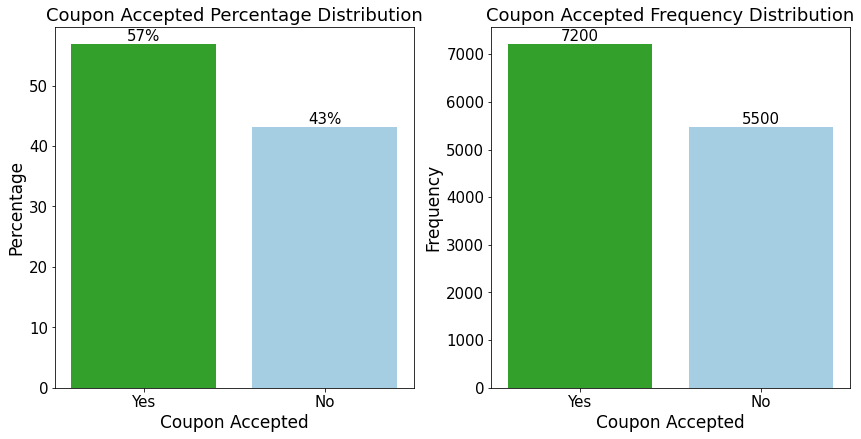

time: 238 ms (started: 2023-01-10 16:48:46 -08:00)


In [29]:
bar_orientation='vertical'
dpi=100
figure_filename = '../reports/figures/figure_coupon_accepted_percentage_and_frequency_distribution_'+ str(bar_orientation) + '_bar_plot_all_data_dpi_' + str(dpi) + '_v' + filename_version + '.png'
figure_filename_axes1 = '../reports/figures/figure_coupon_accepted_percentage_and_frequency_distribution_'+ str(bar_orientation) + '_bar_plot_axes1_all_data_dpi_' + str(dpi) + '_v' + filename_version + '.png'
figure_filename_axes2 = '../reports/figures/figure_coupon_accepted_percentage_and_frequency_distribution_'+ str(bar_orientation) + '_bar_plot_axes2_all_data_dpi_' + str(dpi) + '_v' + filename_version + '.png'

plot_save_together_separate = 'together'

figsize=(12, 6.2)
bar_width=0.8

xlabel = 'Coupon Accepted'
ylabel = 'Percentage'
title = 'Coupon Accepted '+ str(ylabel) + ' Distribution'

target_value_dictionary = {1: 'Yes', 0:'No'}

df_Y_frequency = df.loc[:, ['Y']].value_counts().reset_index().rename(columns={0:'frequency'})
df_Y_frequency.loc[:, 'percentage'] = df_Y_frequency.loc[:, 'frequency'] / df_Y_frequency.loc[:, 'frequency'].sum(axis=0) * 100
df_Y_frequency_percentage = df_Y_frequency
del df_Y_frequency

x_label_list = df_Y_frequency_percentage.loc[:, 'Y'].replace(target_value_dictionary).to_list()


if plot_save_together_separate == 'together':
    figure, (axes1, axes2) = plt.subplots(nrows=1, ncols=2, figsize=figsize)
elif plot_save_together_separate == 'separate':
    figure1, axes1 = plt.subplots(nrows=1, ncols=1, figsize=figsize)
    figure2, axes2 = plt.subplots(nrows=1, ncols=1, figsize=figsize)
    

#make percentage subplot
annotation_round_by_number = 0

percentage_list = df_Y_frequency_percentage.loc[:, 'percentage'].to_list()

axes1.bar(x=x_label_list, height=percentage_list, width=bar_width, color=[color_list[3], color_list[0]])

axes1.set_title(label=title, fontsize=18)
axes1.set_xlabel(xlabel=xlabel, fontsize=17)
axes1.set_ylabel(ylabel=ylabel, fontsize=17)
axes1.tick_params(axis='both', which='major', labelsize=15)

for rectangle, annotation in zip(axes1.patches, percentage_list):
    axes1.text(rectangle.get_x() + rectangle.get_width() / 2, rectangle.get_height(), format(round(annotation, annotation_round_by_number), '.0f') + '%', ha="center", va="bottom", fontsize=15)

#make frequency subplot
ylabel = 'Frequency'
title = 'Coupon Accepted '+ str(ylabel) + ' Distribution'
annotation_round_by_number = -2

frequency_list = df_Y_frequency_percentage.loc[:, 'frequency'].to_list()

axes2.bar(x=x_label_list, height=frequency_list, width=bar_width, color=[color_list[3], color_list[0]])

axes2.set_title(label=title, fontsize=18)
axes2.set_xlabel(xlabel=xlabel, fontsize=17)
axes2.set_ylabel(ylabel=ylabel, fontsize=17)
axes2.tick_params(axis='both', which='major', labelsize=15)

for rectangle, annotation in zip(axes2.patches, frequency_list):
    axes2.text(rectangle.get_x() + rectangle.get_width() / 2, rectangle.get_height() + 5, round(annotation, annotation_round_by_number), ha="center", va="bottom", fontsize=15)

plt.tight_layout()

if plot_save_together_separate == 'together':
    figure.savefig(figure_filename, bbox_inches='tight', dpi=dpi)
elif plot_save_together_separate == 'separate':
    figure1.savefig(figure_filename_axes1, bbox_inches='tight', dpi=dpi)
    figure2.savefig(figure_filename_axes2, bbox_inches='tight', dpi=dpi)


plt.show()

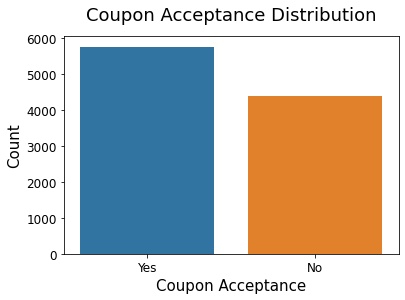

time: 108 ms (started: 2023-01-10 16:48:46 -08:00)


In [30]:
dpi=100
figure_filename = '../reports/figures/figure_target_variable_bar_plot_v3_dpi_' + str(dpi) + '_v' + filename_version + '.png'

figure_filename_exists = os.path.isfile(figure_filename)
if figure_filename_exists == True:
    img = mpimg.imread(figure_filename)
    plt.figure(figsize=(10, 8))
    plt.grid(False)
    plt.axis('off')
    plt.imshow(img)

else:
    #get Y_train data
    _, _, Y_train_plot, _ = train_test_split(df.drop(columns=['Y']), df.loc[:, 'Y'], test_size=.2, random_state=200)

    #get Y_train coupon accepted and not accepted count
    df_target_plot = Y_train_plot.replace({0:'No', 1:'Yes'}).value_counts().to_frame().reset_index().rename(columns={'index':'accepted_not_accepted','Y':'count'})

    axes_object = sns.barplot(data=df_target_plot, x='accepted_not_accepted', y='count')
    axes_object.set_title('Coupon Acceptance Distribution', fontdict={'fontsize':18}, pad=16)
    #axes_object.set(xlabel='Coupon Acceptance', ylabel='Count')
    plt.xlabel('Coupon Acceptance', fontsize=15)
    plt.ylabel('Count', fontsize=15)
    plt.tick_params(labelsize=12)



    #save it
    plt.savefig(figure_filename, bbox_inches='tight', dpi=dpi)
    
plt.show()

In [31]:
#sample size, population size, margin of error, confidence interval

#intialize parameters
z_score = 1.96; confidence_interval = .95

p_value = 0.5684326710816777
margin_of_error = .0381
N_population_size = 2.4 * 10**8

#known 652 surveys accepted, https://jmlr.org/papers/volume18/16-003/16-003.pdf

#calculate sample size
sample_size = (z_score**2*p_value*(1-p_value)/margin_of_error**2)/(1+(z_score**2*p_value*(1-p_value)/margin_of_error**2/N_population_size))
print('Sample size ' + str(round(sample_size)) + ' for a '+ str(round(confidence_interval*100, None)) +'% confidence interval, margin or error ' \
      + str(margin_of_error) + ', population size ' + str(round(N_population_size)) + ', p-value ' + str(round(p_value, 5))
      + ' is less than known 652 surveys.\n')

round_by_number = None
print('Therefore, '+ str(round(confidence_interval*100, None)) +'% of the time, we expect a coupon acceptance rate between ' \
      + str(round((p_value-margin_of_error/2)*100, round_by_number)) + '% and ' \
      + str(round((p_value+margin_of_error/2)*100, round_by_number)) + '%')

Sample size 649 for a 95% confidence interval, margin or error 0.0381, population size 240000000, p-value 0.56843 is less than known 652 surveys.

Therefore, 95% of the time, we expect a coupon acceptance rate between 55% and 59%
time: 1.63 ms (started: 2023-01-10 16:48:46 -08:00)


In [32]:
#sample size, population size, margin of error, confidence interval

#intialize parameters
z_score = 1.645; confidence_interval = .90

p_value = 0.5684326710816777
margin_of_error = .032
N_population_size = 2.4 * 10**8

#known 652 surveys accepted, https://jmlr.org/papers/volume18/16-003/16-003.pdf

#calculate sample size
sample_size = (z_score**2*p_value*(1-p_value)/margin_of_error**2)/(1+(z_score**2*p_value*(1-p_value)/margin_of_error**2/N_population_size))
print('Sample size ' + str(round(sample_size)) + ' for a '+ str(round(confidence_interval*100, None)) +'% confidence interval, margin or error ' \
      + str(margin_of_error) + ', population size ' + str(round(N_population_size)) + ', p-value ' + str(round(p_value, 5))
      + ' is less than known 652 surveys.\n')

round_by_number = None
print('Therefore, '+ str(round(confidence_interval*100, None)) + '% of the time, we expect a coupon acceptance rate between ' \
      + str(round((p_value-margin_of_error/2)*100, round_by_number)) + '% and ' \
      + str(round((p_value+margin_of_error/2)*100, round_by_number)) + '%')


Sample size 648 for a 90% confidence interval, margin or error 0.032, population size 240000000, p-value 0.56843 is less than known 652 surveys.

Therefore, 90% of the time, we expect a coupon acceptance rate between 55% and 58%
time: 1.39 ms (started: 2023-01-10 16:48:46 -08:00)


In [33]:
#survey coupon acceptance rate
df_Y_proportion = (df.groupby(['Y'])['Y'].agg('count') / df.shape[0])
df_Y_proportion[1]

0.5684326710816777

time: 2.4 ms (started: 2023-01-10 16:48:46 -08:00)


In [34]:
#age, income, coffee house visit frequency --> coupon acceptace rate
df.loc[df.loc[:, 'CoffeeHouse_venue_visit_frequency_yes_response_ordinal_integer_encoding'].isin([2, 5]) &
       df.loc[:, 'age'].isin(['21-25', '26-30', '50+']) &
       df.loc[:, 'income'].isin(['\\$50000 - \\$62499']), :]

destination  passenger weather  temperature  time  \
431    No Urgent Place  Friend(s)   Sunny           80  10AM   
5743   No Urgent Place  Friend(s)   Sunny           80   2PM   
5395   No Urgent Place  Friend(s)   Sunny           55   2PM   
1354   No Urgent Place    Partner   Sunny           80  10AM   
1362              Home      Alone   Sunny           80   6PM   
8582              Work      Alone   Sunny           80   7AM   
1352   No Urgent Place  Friend(s)   Sunny           80   6PM   
2810   No Urgent Place  Friend(s)   Sunny           55   2PM   
2812   No Urgent Place      Alone   Sunny           55  10AM   
11371  No Urgent Place  Friend(s)   Sunny           30  10AM   
10331             Home      Alone   Snowy           30  10PM   
6779   No Urgent Place     Kid(s)   Rainy           55   6PM   
3305   No Urgent Place  Friend(s)   Sunny           55   2PM   
870    No Urgent Place    Partner   Sunny           80   6PM   
8857              Home     Kid(s)   Sunny           30   6PM   
8425              Home      Alone   Sunny           80   6PM   
8017   No Urgent Place  Friend(s)   Sunny           80   2PM   
8415   No Urgent Place  Friend(s)   Snowy           30  10PM   
2802   No Urgent Place  Friend(s)   Sunny           80  10AM   
8424              Home    Partner   Sunny           80   6PM   
8859              Home      Alone   Sunny           80   6PM   
5393   No Urgent Place  Friend(s)   Sunny           80   2PM   
5394   No Urgent Place  Friend(s)   Sunny           80   6PM   
1363              Work      Alone   Sunny           55   7AM   
2800   No Urgent Place      Alone   Sunny           55   2PM   
444               Home      Alone   Sunny           55   6PM   
3294   No Urgent Place      Alone   Sunny           55   2PM   
866    No Urgent Place    Partner   Sunny           80  10AM   
3301   No Urgent Place  Friend(s)   Sunny           80   2PM   
6351   No Urgent Place    Partner   Sunny           80  10AM   
1348   No Urgent Place  Friend(s)   Sunny           80  10AM   
8419   No Urgent Place    Partner   Rainy           55   2PM   
869    No Urgent Place    Partner   Sunny           80   6PM   
2815              Home      Alone   Sunny           80   6PM   
5675   No Urgent Place      Alone   Sunny           80  10AM   
6783   No Urgent Place      Alone   Sunny           55  10PM   
11386             Work      Alone   Snowy           30   7AM   
879               Work      Alone   Sunny           55   7AM   
8865              Work      Alone   Sunny           80   7AM   
438    No Urgent Place  Friend(s)   Sunny           80   6PM   
8028              Home      Alone   Snowy           30   6PM   
447               Work      Alone   Sunny           55   7AM   
2808   No Urgent Place  Friend(s)   Sunny           80   6PM   
10327             Home     Kid(s)   Sunny           30   6PM   
5397   No Urgent Place    Partner   Sunny           80  10AM   
8018   No Urgent Place  Friend(s)   Sunny           80   6PM   
2813              Home      Alone   Sunny           55   6PM   
5692              Work      Alone   Sunny           80   7AM   
8578              Home    Partner   Sunny           30  10PM   
8855              Home     Kid(s)   Sunny           80   6PM   
11369  No Urgent Place  Friend(s)   Sunny           80  10PM   
8561   No Urgent Place     Kid(s)   Rainy           55   6PM   
5741   No Urgent Place      Alone   Sunny           80  10AM   
5680   No Urgent Place      Alone   Sunny           80   2PM   
2818              Work      Alone   Sunny           80   7AM   
8565   No Urgent Place      Alone   Sunny           55   6PM   
5742   No Urgent Place  Friend(s)   Sunny           80  10AM   
864    No Urgent Place  Friend(s)   Sunny           55   2PM   
6795              Work      Alone   Sunny           55   7AM   
3578              Work      Alone   Sunny           55   7AM   
8426              Work      Alone   Rainy           55   7AM   
5399   No Urgent Place    Partner   Sunny  

time: 180 ms (started: 2023-01-10 16:48:46 -08:00)


In [35]:
age_list = ['21-25', '26-30', '50+']
coffee_house_monthly_visit_frequency_encoding_list = [2]
income_list = ['\\$50000 - \\$62499']

df.loc[df.loc[:, 'CoffeeHouse_venue_visit_frequency_yes_response_ordinal_integer_encoding'].isin(coffee_house_monthly_visit_frequency_encoding_list) &
       df.loc[:, 'age'].isin(age_list) &
       df.loc[:, 'income'].isin(income_list), :].value_counts('Y')[1] / \
df.loc[df.loc[:, 'CoffeeHouse_venue_visit_frequency_yes_response_ordinal_integer_encoding'].isin(coffee_house_monthly_visit_frequency_encoding_list) &
       df.loc[:, 'age'].isin(age_list) &
       df.loc[:, 'income'].isin(income_list), :].shape[0]



0.6753246753246753

time: 6.26 ms (started: 2023-01-10 16:48:46 -08:00)


In [36]:
age_list = ['21-25', '26-30', '50+']
coffee_house_monthly_visit_frequency_encoding_list = [2,5]
income_list = ['\\$50000 - \\$62499']


df_filtered = \
df.loc[df.loc[:, 'CoffeeHouse_venue_visit_frequency_yes_response_ordinal_integer_encoding'].isin(coffee_house_monthly_visit_frequency_encoding_list) &
       df.loc[:, 'age'].isin(age_list) &
       df.loc[:, 'income'].isin(income_list), :]

number_of_coupons_accepted = df_filtered.value_counts('Y')[1]
print(number_of_coupons_accepted)
number_of_coupons_recommended = df_filtered.shape[0]
print(number_of_coupons_recommended)

coupon_acceptance_rate = number_of_coupons_accepted/number_of_coupons_recommended
print(coupon_acceptance_rate)

print(number_of_coupons_recommended)

255
374
0.6818181818181818
374
time: 4.06 ms (started: 2023-01-10 16:48:46 -08:00)


In [37]:
#^--- our model does something similar but it actually models better for coupon acceptance rate. likely because it's a better model, 
#     but also because it uses more features


#it's less about narrowing down by demogrpahics and more about coupon acceptance rate (i.e. conversion rate) then???

#run a final model with the least number of features??





time: 547 µs (started: 2023-01-10 16:48:46 -08:00)


In [38]:
income_list = ['\\$62500 - \\$74999', '\\$75000 - \\$87499', '\\$87500 - \\$99999']
age_list = ['<21', '31-35', '36-40', '41-45', '46-49'] #
coffee_house_monthly_visit_frequency_encoding_list = [3, 4, 1, 0] #0

df_filtered = \
df.loc[~df.loc[:, 'CoffeeHouse_venue_visit_frequency_yes_response_ordinal_integer_encoding'].isin(coffee_house_monthly_visit_frequency_encoding_list) &
       ~df.loc[:, 'age'].isin(age_list) &
       ~df.loc[:, 'income'].isin(income_list), :]

number_of_coupons_accepted = df_filtered.value_counts('Y')[1]
print(number_of_coupons_accepted)
number_of_coupons_recommended = df_filtered.shape[0]
print(number_of_coupons_recommended)

coupon_acceptance_rate = number_of_coupons_accepted/number_of_coupons_recommended
print(coupon_acceptance_rate)

print(number_of_coupons_recommended)

1400
2064
0.6782945736434108
2064
time: 4.37 ms (started: 2023-01-10 16:48:46 -08:00)


In [39]:
income_list = ['\\$62500 - \\$74999', '\\$75000 - \\$87499', '\\$87500 - \\$99999']
age_list = ['<21', '31-35', '36-40', '41-45', '46-49']
coffee_house_monthly_visit_frequency_encoding_list = [3, 4, 1, 0] #0

number_of_coupon_accepted = \
df.loc[~df.loc[:, 'CoffeeHouse_venue_visit_frequency_yes_response_ordinal_integer_encoding'].isin(coffee_house_monthly_visit_frequency_encoding_list) &
       ~df.loc[:, 'age'].isin(age_list) &
       ~df.loc[:, 'income'].isin(income_list), :].value_counts('Y')[1]
number_of_rows = \
df.loc[~df.loc[:, 'CoffeeHouse_venue_visit_frequency_yes_response_ordinal_integer_encoding'].isin(coffee_house_monthly_visit_frequency_encoding_list) &
       ~df.loc[:, 'age'].isin(age_list) &
       ~df.loc[:, 'income'].isin(income_list), :].shape[0]

print(str(number_of_coupon_accepted/number_of_rows))

print(df.loc[~df.loc[:, 'CoffeeHouse_venue_visit_frequency_yes_response_ordinal_integer_encoding'].isin(coffee_house_monthly_visit_frequency_encoding_list) &
       ~df.loc[:, 'age'].isin(age_list) &
       ~df.loc[:, 'income'].isin(income_list), :].shape[0])

0.6782945736434108
2064
time: 10.4 ms (started: 2023-01-10 16:48:46 -08:00)


#### Income Frequency Distribution (Vertical Bar Plot)

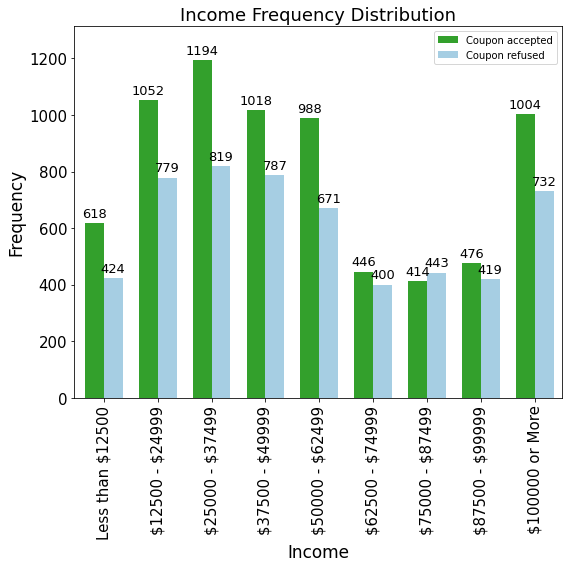

time: 313 ms (started: 2023-01-10 16:48:46 -08:00)


In [40]:
feature_column_name = 'income'
feature_column_name_label='Income'
bar_orientation = 'vertical'

dpi=100
figure_filename = '../reports/figures/figure_'+ str(feature_column_name) +'_frequency_distribution_'+ str(bar_orientation) + '_multiple_bar_coupon_accepted_coupon_refused_all_data_dpi_' + str(dpi) + '_v' + filename_version + '.png'

multibar_column_name_list=['coupon accepted', 'coupon refused']

feature_value_order_list = ['Less than \$12500', '\$12500 - \$24999', '\$25000 - \$37499', '\$37500 - \$49999', '\$50000 - \$62499', '\$62500 - \$74999',  '\$75000 - \$87499', '\$87500 - \$99999', '\$100000 or More',]

title= str(feature_column_name_label) + ' Frequency Distribution'

color_index_list=[3,0]

xtick_rotation=90

x_upper_limit=None

if bar_orientation == 'vertical':
    figsize=(8,8)
    xlabel=feature_column_name_label

    #get column name, coupon accepted (frequency), coupon refused (frequency)
    df_income_coupon_accepted_coupon_refused = icr.get_feature_target_frequency_data_frame(df, feature_column_name=feature_column_name)

    #sort by value order list
    df_income_coupon_accepted_coupon_refused = icr.sort_data_frame(df=df_income_coupon_accepted_coupon_refused, feature_column_name=feature_column_name, feature_value_order_list=feature_value_order_list, ascending_true_false=True).drop(columns=[str(feature_column_name)+'_rank'])
    
    icr.plot_vertical_bar_graph(df=df_income_coupon_accepted_coupon_refused, feature_column_name=feature_column_name, multibar_column_name_list=multibar_column_name_list, title=title, xlabel=xlabel,color_list=color_list, figsize=figsize, color_index_list=color_index_list, figure_filename=figure_filename, dpi=dpi, xtick_rotation=xtick_rotation)

elif bar_orientation == 'horizontal':
    figsize=(8,6)
    ylabel=feature_column_name_label

    #get column name, coupon accepted (frequency), coupon refused (frequency)
    df_income_coupon_accepted_coupon_refused = icr.get_feature_target_frequency_data_frame(df, feature_column_name=feature_column_name)

    #sort by value order list
    df_income_coupon_accepted_coupon_refused = icr.sort_data_frame(df=df_income_coupon_accepted_coupon_refused, feature_column_name=feature_column_name, feature_value_order_list=feature_value_order_list, ascending_true_false=False).drop(columns=[str(feature_column_name)+'_rank'])

    icr.plot_horizontal_bar_graph(df=df_income_coupon_accepted_coupon_refused, feature_column_name=feature_column_name, multibar_column_name_list=multibar_column_name_list, title=title, ylabel=ylabel, figsize=figsize, color_list=color_list, color_index_list=color_index_list, figure_filename=figure_filename, dpi=dpi, x_upper_limit=x_upper_limit)



#### Income Frequency Distribution (Horizontal Bar Plot)

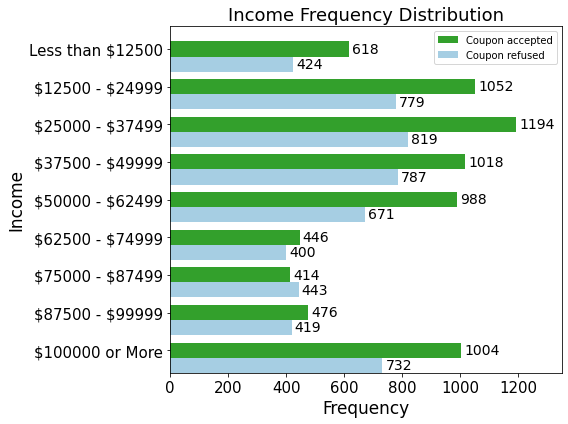

time: 291 ms (started: 2023-01-10 16:48:47 -08:00)


In [41]:
feature_column_name = 'income'
feature_column_name_label='Income'
bar_orientation = 'horizontal'

dpi=100
figure_filename = '../reports/figures/figure_'+ str(feature_column_name) +'_frequency_distribution_'+ str(bar_orientation) + '_multiple_bar_coupon_accepted_coupon_refused_all_data_dpi_' + str(dpi) + '_v' + filename_version + '.png'

multibar_column_name_list=['coupon accepted', 'coupon refused']

feature_value_order_list = ['Less than \$12500', '\$12500 - \$24999', '\$25000 - \$37499', '\$37500 - \$49999', '\$50000 - \$62499', '\$62500 - \$74999',  '\$75000 - \$87499', '\$87500 - \$99999', '\$100000 or More',]

title= str(feature_column_name_label) + ' Frequency Distribution'

color_index_list=[3,0]

x_upper_limit=1350

if bar_orientation == 'vertical':
    figsize=(8,8)
    xlabel=feature_column_name_label

    #get column name, coupon accepted (frequency), coupon refused (frequency)
    df_income_coupon_accepted_coupon_refused = icr.get_feature_target_frequency_data_frame(df, feature_column_name=feature_column_name)

    #sort by value order list
    df_income_coupon_accepted_coupon_refused = icr.sort_data_frame(df=df_income_coupon_accepted_coupon_refused, feature_column_name=feature_column_name, feature_value_order_list=feature_value_order_list, ascending_true_false=True).drop(columns=[str(feature_column_name)+'_rank'])
    
    icr.plot_vertical_bar_graph(df=df_income_coupon_accepted_coupon_refused, feature_column_name=feature_column_name, multibar_column_name_list=multibar_column_name_list, title=title, xlabel=xlabel,color_list=color_list, figsize=figsize, color_index_list=color_index_list, figure_filename=figure_filename, dpi=dpi, xtick_rotation=xtick_rotation)

elif bar_orientation == 'horizontal':
    figsize=(8,6)
    ylabel=feature_column_name_label

    #get column name, coupon accepted (frequency), coupon refused (frequency)
    df_income_coupon_accepted_coupon_refused = icr.get_feature_target_frequency_data_frame(df, feature_column_name=feature_column_name)

    #sort by value order list
    df_income_coupon_accepted_coupon_refused = icr.sort_data_frame(df=df_income_coupon_accepted_coupon_refused, feature_column_name=feature_column_name, feature_value_order_list=feature_value_order_list, ascending_true_false=False).drop(columns=[str(feature_column_name)+'_rank'])

    icr.plot_horizontal_bar_graph(df=df_income_coupon_accepted_coupon_refused, feature_column_name=feature_column_name, multibar_column_name_list=multibar_column_name_list, title=title, ylabel=ylabel, figsize=figsize, color_list=color_list, color_index_list=color_index_list, figure_filename=figure_filename, dpi=dpi, x_upper_limit=x_upper_limit)



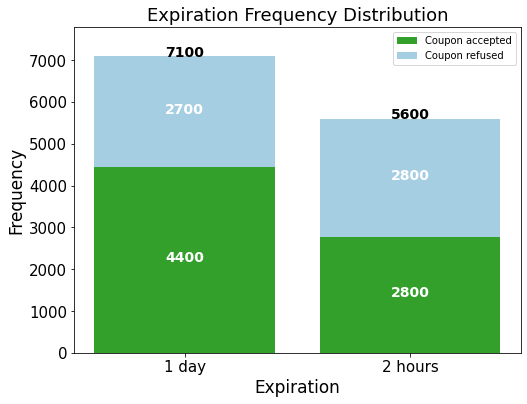

time: 161 ms (started: 2023-01-10 16:48:47 -08:00)


In [42]:
feature_column_name = 'expiration'
feature_column_name_label=feature_column_name.capitalize()
xlabel=feature_column_name_label
ylabel='Frequency'

xtick_rotation=0
bar_orientation = 'vertical'
annotation_type = 'frequency'
frequency_annotation_round_by_number=-2

dpi=100
figure_filename = '../reports/figures/figure_'+ str(feature_column_name) +'_frequency_distribution_'+ str(bar_orientation) + '_stacked_bar_coupon_accepted_coupon_refused_'+ str(annotation_type) + '_annotation_all_data_dpi_' + str(dpi) + '_v' + filename_version + '.png'

feature_value_order_list = ['1d', '2h']
xtick_dictionary = {'1d':'1 day', '2h':'2 hours'}

title= str(feature_column_name_label) + ' Frequency Distribution'

color_index_list=[3,0]
colors = [color_list[color_index_list[0]], color_list[color_index_list[1]]]


figsize=(8,8)


#get column name, coupon accepted (frequency), coupon refused (frequency)
df_income_coupon_accepted_coupon_refused = icr.get_feature_target_frequency_data_frame(df, feature_column_name=feature_column_name, append_percentage_true_false=True)

#sort by value order list
df_income_coupon_accepted_coupon_refused = icr.sort_data_frame(df=df_income_coupon_accepted_coupon_refused, feature_column_name=feature_column_name, feature_value_order_list=feature_value_order_list, ascending_true_false=True).drop(columns=[str(feature_column_name)+'_rank'])

#index feature column
df_index_income_coupon_refused_coupon_accepted = df_income_coupon_accepted_coupon_refused.set_index(feature_column_name)

icr.plot_vertical_stacked_bar_graph(df=df_index_income_coupon_refused_coupon_accepted, feature_column_name=feature_column_name, feature_column_name_label=feature_column_name_label, ylabel=ylabel, xlabel=xlabel, figure_filename=figure_filename, annotation_text_size=14, dpi=dpi, xtick_rotation=xtick_rotation, xtick_dictionary=xtick_dictionary, colors=colors, annotation_type=annotation_type, frequency_annotation_round_by_number=frequency_annotation_round_by_number)



In [43]:
df.loc[:, 'direction_same_or_opposite']

11199    0
1474     1
10836    1
4567     1
5658     1
        ..
11343    0
9036     1
11050    0
784      0
1818     1
Name: direction_same_or_opposite, Length: 12684, dtype: int64

time: 2.33 ms (started: 2023-01-10 16:48:47 -08:00)


#### Coupon Venue Drive Direction Frequency Distribution (Stacked Bar Plot Percentage Annotation)

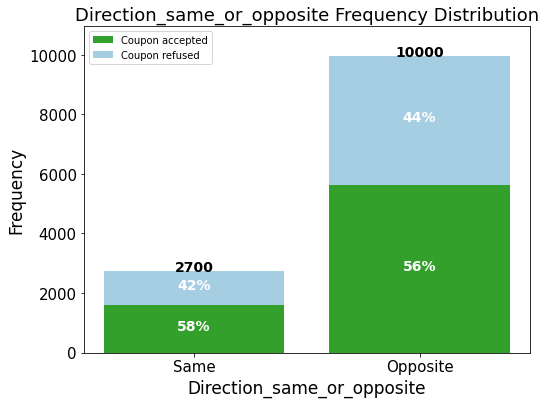

time: 153 ms (started: 2023-01-10 16:48:47 -08:00)


In [44]:
feature_column_name = 'direction_same_or_opposite'
feature_column_name_label=feature_column_name.capitalize()
xlabel=feature_column_name_label
ylabel='Frequency'

xtick_rotation=0
bar_orientation = 'vertical'
annotation_type = 'percentage'
frequency_annotation_round_by_number=-2

dpi=100
figure_filename = '../reports/figures/figure_'+ str(feature_column_name) +'_frequency_distribution_'+ str(bar_orientation) + '_stacked_bar_coupon_accepted_coupon_refused_'+ str(annotation_type) + '_annotation_all_data_dpi_' + str(dpi) + '_v' + filename_version + '.png'

feature_value_order_list = [0,1]
xtick_dictionary = {0:'Same', 1:'Opposite'}

title= str(feature_column_name_label) + ' Frequency Distribution'

color_index_list=[3,0]
colors = [color_list[color_index_list[0]], color_list[color_index_list[1]]]

y_upper_limit=None

figsize=(8,8)


#get column name, coupon accepted (frequency), coupon refused (frequency)
df_income_coupon_accepted_coupon_refused = icr.get_feature_target_frequency_data_frame(df, feature_column_name=feature_column_name, append_percentage_true_false=True)

#sort by value order list
df_income_coupon_accepted_coupon_refused = icr.sort_data_frame(df=df_income_coupon_accepted_coupon_refused, feature_column_name=feature_column_name, feature_value_order_list=feature_value_order_list, ascending_true_false=True).drop(columns=[str(feature_column_name)+'_rank'])

#index feature column
df_index_income_coupon_refused_coupon_accepted = df_income_coupon_accepted_coupon_refused.set_index(feature_column_name)

icr.plot_vertical_stacked_bar_graph(df=df_index_income_coupon_refused_coupon_accepted, feature_column_name=feature_column_name, feature_column_name_label=feature_column_name_label, ylabel=ylabel, xlabel=xlabel, figure_filename=figure_filename, annotation_text_size=14, dpi=dpi, xtick_rotation=xtick_rotation, xtick_dictionary=xtick_dictionary, colors=colors, annotation_type=annotation_type, frequency_annotation_round_by_number=frequency_annotation_round_by_number, y_upper_limit=y_upper_limit)



#### Expiration Frequency Distribution (Stacked Bar Plot Percentage Annotation)

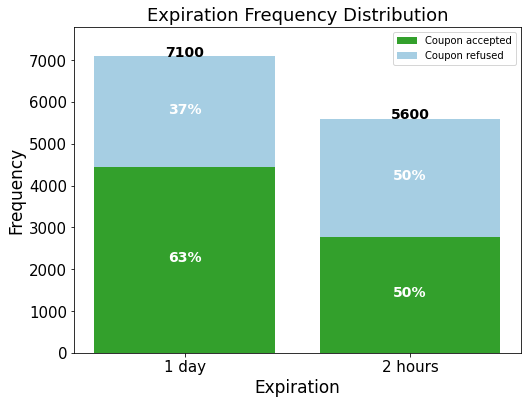

time: 161 ms (started: 2023-01-10 16:48:47 -08:00)


In [45]:
feature_column_name = 'expiration'
feature_column_name_label=feature_column_name.capitalize()
xlabel=feature_column_name_label
ylabel='Frequency'

xtick_rotation=0
bar_orientation = 'vertical'
annotation_type = 'percentage'
frequency_annotation_round_by_number=-2

dpi=100
figure_filename = '../reports/figures/figure_'+ str(feature_column_name) +'_frequency_distribution_'+ str(bar_orientation) + '_stacked_bar_coupon_accepted_coupon_refused_'+ str(annotation_type) + '_annotation_all_data_dpi_' + str(dpi) + '_v' + filename_version + '.png'

feature_value_order_list = ['1d', '2h']
xtick_dictionary = {'1d':'1 day', '2h':'2 hours'}

title= str(feature_column_name_label) + ' Frequency Distribution'

color_index_list=[3,0]
colors = [color_list[color_index_list[0]], color_list[color_index_list[1]]]

y_upper_limit=None

figsize=(8,8)


#get column name, coupon accepted (frequency), coupon refused (frequency)
df_income_coupon_accepted_coupon_refused = icr.get_feature_target_frequency_data_frame(df, feature_column_name=feature_column_name, append_percentage_true_false=True)

#sort by value order list
df_income_coupon_accepted_coupon_refused = icr.sort_data_frame(df=df_income_coupon_accepted_coupon_refused, feature_column_name=feature_column_name, feature_value_order_list=feature_value_order_list, ascending_true_false=True).drop(columns=[str(feature_column_name)+'_rank'])

#index feature column
df_index_income_coupon_refused_coupon_accepted = df_income_coupon_accepted_coupon_refused.set_index(feature_column_name)

icr.plot_vertical_stacked_bar_graph(df=df_index_income_coupon_refused_coupon_accepted, feature_column_name=feature_column_name, feature_column_name_label=feature_column_name_label, ylabel=ylabel, xlabel=xlabel, figure_filename=figure_filename, annotation_text_size=14, dpi=dpi, xtick_rotation=xtick_rotation, xtick_dictionary=xtick_dictionary, colors=colors, annotation_type=annotation_type, frequency_annotation_round_by_number=frequency_annotation_round_by_number, y_upper_limit=y_upper_limit)



#### Gender Frequency Distribution (Stacked Bar Plot Percentage Annotation)

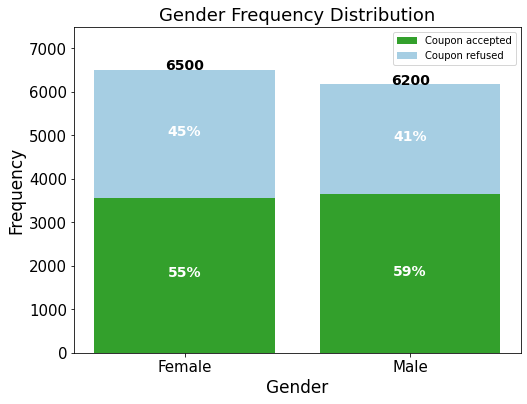

time: 152 ms (started: 2023-01-10 16:48:48 -08:00)


In [46]:
feature_column_name = 'gender'
feature_column_name_label=feature_column_name.capitalize()
xlabel=feature_column_name_label
ylabel='Frequency'

xtick_rotation=0
bar_orientation = 'vertical'
annotation_type = 'percentage'
frequency_annotation_round_by_number=-2

dpi=100
figure_filename = '../reports/figures/figure_'+ str(feature_column_name) +'_frequency_distribution_'+ str(bar_orientation) + '_stacked_bar_coupon_accepted_coupon_refused_'+ str(annotation_type) + '_annotation_all_data_dpi_' + str(dpi) + '_v' + filename_version + '.png'

feature_value_order_list = ['Female','Male', ]
xtick_dictionary = None

title= str(feature_column_name_label) + ' Frequency Distribution'

color_index_list=[3,0]
colors = [color_list[color_index_list[0]], color_list[color_index_list[1]]]

y_upper_limit=7500

figsize=(8,8)


#get column name, coupon accepted (frequency), coupon refused (frequency)
df_income_coupon_accepted_coupon_refused = icr.get_feature_target_frequency_data_frame(df, feature_column_name=feature_column_name, append_percentage_true_false=True)

#sort by value order list
df_income_coupon_accepted_coupon_refused = icr.sort_data_frame(df=df_income_coupon_accepted_coupon_refused, feature_column_name=feature_column_name, feature_value_order_list=feature_value_order_list, ascending_true_false=True).drop(columns=[str(feature_column_name)+'_rank'])

#index feature column
df_index_income_coupon_refused_coupon_accepted = df_income_coupon_accepted_coupon_refused.set_index(feature_column_name)

icr.plot_vertical_stacked_bar_graph(df=df_index_income_coupon_refused_coupon_accepted, feature_column_name=feature_column_name, feature_column_name_label=feature_column_name_label, ylabel=ylabel, xlabel=xlabel, figure_filename=figure_filename, annotation_text_size=14, dpi=dpi, xtick_rotation=xtick_rotation, xtick_dictionary=xtick_dictionary, colors=colors, annotation_type=annotation_type, frequency_annotation_round_by_number=frequency_annotation_round_by_number, y_upper_limit=y_upper_limit)



#### Has Children Frequency Distribution (Vertical Bar Plot)

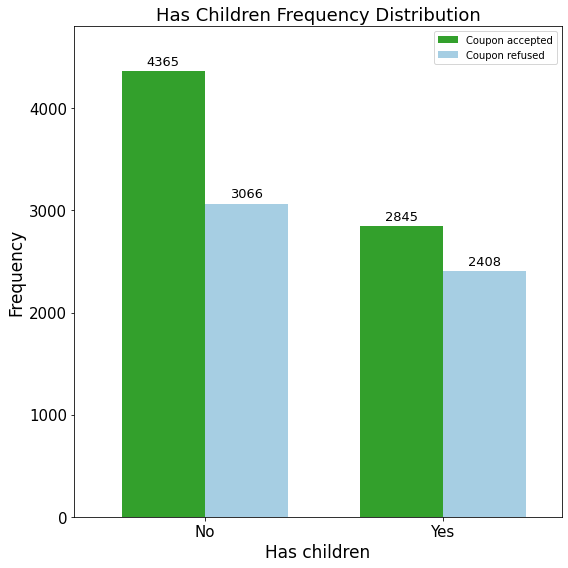

time: 160 ms (started: 2023-01-10 16:48:48 -08:00)


In [47]:
feature_column_name = 'has_children'
feature_column_name_label='Has children'
bar_orientation = 'vertical'

dpi=100
figure_filename = '../reports/figures/figure_'+ str(feature_column_name) +'_frequency_distribution_'+ str(bar_orientation) + '_multiple_bar_coupon_accepted_coupon_refused_all_data_dpi_' + str(dpi) + '_v' + filename_version + '.png'

multibar_column_name_list=['coupon accepted', 'coupon refused']

feature_value_order_list = [0, 1]
feature_value_dictionary = {0:'No', 1:'Yes'}

title= ' '.join([word.capitalize() for word in feature_column_name_label.split(' ')]) + ' Frequency Distribution'

color_index_list=[3,0]

xtick_rotation=0

if bar_orientation == 'vertical':
    figsize=(8,8)
    xlabel=feature_column_name_label

    #get column name, coupon accepted (frequency), coupon refused (frequency)
    df_income_coupon_accepted_coupon_refused = icr.get_feature_target_frequency_data_frame(df, feature_column_name=feature_column_name)

    #sort by value order list
    df_income_coupon_accepted_coupon_refused = icr.sort_data_frame(df=df_income_coupon_accepted_coupon_refused, feature_column_name=feature_column_name, feature_value_order_list=feature_value_order_list, ascending_true_false=True).drop(columns=[str(feature_column_name)+'_rank'])
    
    icr.plot_vertical_bar_graph(df=df_income_coupon_accepted_coupon_refused, feature_column_name=feature_column_name, multibar_column_name_list=multibar_column_name_list, title=title, xlabel=xlabel,color_list=color_list, figsize=figsize, color_index_list=color_index_list, figure_filename=figure_filename, dpi=dpi, xtick_rotation=xtick_rotation, feature_value_dictionary=feature_value_dictionary)

elif bar_orientation == 'horizontal':
    figsize=(8,6)
    ylabel=feature_column_name_label

    #get column name, coupon accepted (frequency), coupon refused (frequency)
    df_income_coupon_accepted_coupon_refused = icr.get_feature_target_frequency_data_frame(df, feature_column_name=feature_column_name)

    #sort by value order list
    df_income_coupon_accepted_coupon_refused = icr.sort_data_frame(df=df_income_coupon_accepted_coupon_refused, feature_column_name=feature_column_name, feature_value_order_list=feature_value_order_list, ascending_true_false=False).drop(columns=[str(feature_column_name)+'_rank'])

    icr.plot_horizontal_bar_graph(df=df_income_coupon_accepted_coupon_refused, feature_column_name=feature_column_name, multibar_column_name_list=multibar_column_name_list, title=title, ylabel=ylabel, figsize=figsize, color_list=color_list, color_index_list=color_index_list, figure_filename=figure_filename, dpi=dpi, feature_value_dictionary=feature_value_dictionary)



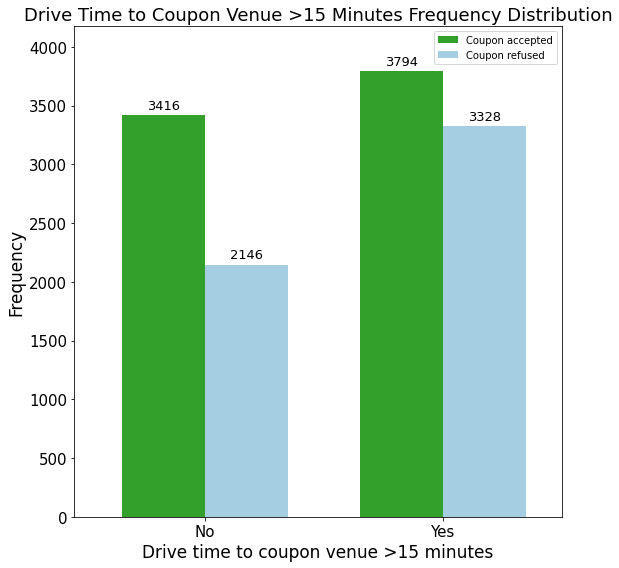

time: 189 ms (started: 2023-01-10 16:48:48 -08:00)


In [48]:
feature_column_name = 'toCoupon_GEQ15min'
feature_column_name_label='Drive time to coupon venue >15 minutes'
bar_orientation = 'vertical'

dpi=100
figure_filename = '../reports/figures/figure_'+ str(feature_column_name) +'_frequency_distribution_'+ str(bar_orientation) + '_multiple_bar_coupon_accepted_coupon_refused_all_data_dpi_' + str(dpi) + '_v' + filename_version + '.png'

multibar_column_name_list=['coupon accepted', 'coupon refused']

feature_value_order_list = [0, 1]
feature_value_dictionary = {0:'No', 1:'Yes'}

title= 'Drive Time to Coupon Venue >15 Minutes' + ' Frequency Distribution'

color_index_list=[3,0]

xtick_rotation=0

if bar_orientation == 'vertical':
    figsize=(8,8)
    xlabel=feature_column_name_label

    #get column name, coupon accepted (frequency), coupon refused (frequency)
    df_income_coupon_accepted_coupon_refused = icr.get_feature_target_frequency_data_frame(df, feature_column_name=feature_column_name)

    #sort by value order list
    df_income_coupon_accepted_coupon_refused = icr.sort_data_frame(df=df_income_coupon_accepted_coupon_refused, feature_column_name=feature_column_name, feature_value_order_list=feature_value_order_list, ascending_true_false=True).drop(columns=[str(feature_column_name)+'_rank'])
    
    icr.plot_vertical_bar_graph(df=df_income_coupon_accepted_coupon_refused, feature_column_name=feature_column_name, multibar_column_name_list=multibar_column_name_list, title=title, xlabel=xlabel,color_list=color_list, figsize=figsize, color_index_list=color_index_list, figure_filename=figure_filename, dpi=dpi, xtick_rotation=xtick_rotation, feature_value_dictionary=feature_value_dictionary)

elif bar_orientation == 'horizontal':
    figsize=(8,6)
    ylabel=feature_column_name_label

    #get column name, coupon accepted (frequency), coupon refused (frequency)
    df_income_coupon_accepted_coupon_refused = icr.get_feature_target_frequency_data_frame(df, feature_column_name=feature_column_name)

    #sort by value order list
    df_income_coupon_accepted_coupon_refused = icr.sort_data_frame(df=df_income_coupon_accepted_coupon_refused, feature_column_name=feature_column_name, feature_value_order_list=feature_value_order_list, ascending_true_false=False).drop(columns=[str(feature_column_name)+'_rank'])

    icr.plot_horizontal_bar_graph(df=df_income_coupon_accepted_coupon_refused, feature_column_name=feature_column_name, multibar_column_name_list=multibar_column_name_list, title=title, ylabel=ylabel, figsize=figsize, color_list=color_list, color_index_list=color_index_list, figure_filename=figure_filename, dpi=dpi, feature_value_dictionary=feature_value_dictionary)



#### Drive Time to Coupon Venue >25 Minutes Frequency Distribution (Vertical Bar Plot)

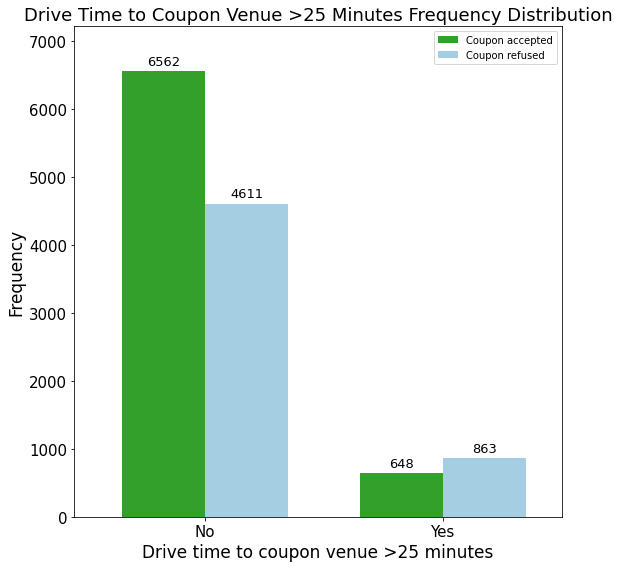

time: 181 ms (started: 2023-01-10 16:48:48 -08:00)


In [49]:
feature_column_name = 'toCoupon_GEQ25min'
feature_column_name_label='Drive time to coupon venue >25 minutes' 
bar_orientation = 'vertical'

dpi=100
figure_filename = '../reports/figures/figure_'+ str(feature_column_name) +'_frequency_distribution_'+ str(bar_orientation) + '_multiple_bar_coupon_accepted_coupon_refused_all_data_dpi_' + str(dpi) + '_v' + filename_version + '.png'

multibar_column_name_list=['coupon accepted', 'coupon refused']

feature_value_order_list = [0, 1]
feature_value_dictionary = {0:'No', 1:'Yes'}

title= 'Drive Time to Coupon Venue >25 Minutes' + ' Frequency Distribution'

color_index_list=[3,0]

xtick_rotation=0

if bar_orientation == 'vertical':
    figsize=(8,8)
    xlabel=feature_column_name_label

    #get column name, coupon accepted (frequency), coupon refused (frequency)
    df_income_coupon_accepted_coupon_refused = icr.get_feature_target_frequency_data_frame(df, feature_column_name=feature_column_name)

    #sort by value order list
    df_income_coupon_accepted_coupon_refused = icr.sort_data_frame(df=df_income_coupon_accepted_coupon_refused, feature_column_name=feature_column_name, feature_value_order_list=feature_value_order_list, ascending_true_false=True).drop(columns=[str(feature_column_name)+'_rank'])
    
    icr.plot_vertical_bar_graph(df=df_income_coupon_accepted_coupon_refused, feature_column_name=feature_column_name, multibar_column_name_list=multibar_column_name_list, title=title, xlabel=xlabel,color_list=color_list, figsize=figsize, color_index_list=color_index_list, figure_filename=figure_filename, dpi=dpi, xtick_rotation=xtick_rotation, feature_value_dictionary=feature_value_dictionary)

elif bar_orientation == 'horizontal':
    figsize=(8,6)
    ylabel=feature_column_name_label

    #get column name, coupon accepted (frequency), coupon refused (frequency)
    df_income_coupon_accepted_coupon_refused = icr.get_feature_target_frequency_data_frame(df, feature_column_name=feature_column_name)

    #sort by value order list
    df_income_coupon_accepted_coupon_refused = icr.sort_data_frame(df=df_income_coupon_accepted_coupon_refused, feature_column_name=feature_column_name, feature_value_order_list=feature_value_order_list, ascending_true_false=False).drop(columns=[str(feature_column_name)+'_rank'])

    icr.plot_horizontal_bar_graph(df=df_income_coupon_accepted_coupon_refused, feature_column_name=feature_column_name, multibar_column_name_list=multibar_column_name_list, title=title, ylabel=ylabel, figsize=figsize, color_list=color_list, color_index_list=color_index_list, figure_filename=figure_filename, dpi=dpi, feature_value_dictionary=feature_value_dictionary)



#### Gender Frequency Distribution (Vertical Bar Plot)

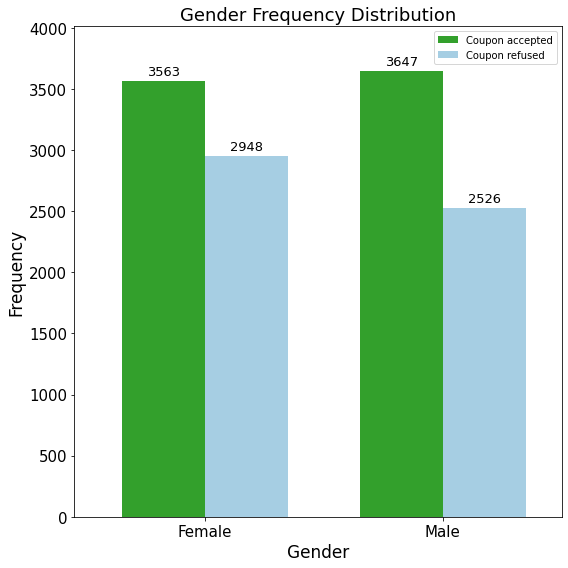

time: 177 ms (started: 2023-01-10 16:48:48 -08:00)


In [50]:
feature_column_name = 'gender'
feature_column_name_label='Gender'
bar_orientation = 'vertical'

dpi=100
figure_filename = '../reports/figures/figure_'+ str(feature_column_name) +'_frequency_distribution_'+ str(bar_orientation) + '_multiple_bar_coupon_accepted_coupon_refused_all_data_dpi_' + str(dpi) + '_v' + filename_version + '.png'

multibar_column_name_list=['coupon accepted', 'coupon refused']

feature_value_order_list = [0, 1]
feature_value_dictionary = {0:'No', 1:'Yes'}

title= 'Gender' + ' Frequency Distribution'

color_index_list=[3,0]

xtick_rotation=0

if bar_orientation == 'vertical':
    figsize=(8,8)
    xlabel=feature_column_name_label

    #get column name, coupon accepted (frequency), coupon refused (frequency)
    df_income_coupon_accepted_coupon_refused = icr.get_feature_target_frequency_data_frame(df, feature_column_name=feature_column_name)

    #sort by value order list
    df_income_coupon_accepted_coupon_refused = icr.sort_data_frame(df=df_income_coupon_accepted_coupon_refused, feature_column_name=feature_column_name, feature_value_order_list=feature_value_order_list, ascending_true_false=True).drop(columns=[str(feature_column_name)+'_rank'])
    
    icr.plot_vertical_bar_graph(df=df_income_coupon_accepted_coupon_refused, feature_column_name=feature_column_name, multibar_column_name_list=multibar_column_name_list, title=title, xlabel=xlabel,color_list=color_list, figsize=figsize, color_index_list=color_index_list, figure_filename=figure_filename, dpi=dpi, xtick_rotation=xtick_rotation, feature_value_dictionary=feature_value_dictionary)

elif bar_orientation == 'horizontal':
    figsize=(8,6)
    ylabel=feature_column_name_label

    #get column name, coupon accepted (frequency), coupon refused (frequency)
    df_income_coupon_accepted_coupon_refused = icr.get_feature_target_frequency_data_frame(df, feature_column_name=feature_column_name)

    #sort by value order list
    df_income_coupon_accepted_coupon_refused = icr.sort_data_frame(df=df_income_coupon_accepted_coupon_refused, feature_column_name=feature_column_name, feature_value_order_list=feature_value_order_list, ascending_true_false=False).drop(columns=[str(feature_column_name)+'_rank'])

    icr.plot_horizontal_bar_graph(df=df_income_coupon_accepted_coupon_refused, feature_column_name=feature_column_name, multibar_column_name_list=multibar_column_name_list, title=title, ylabel=ylabel, figsize=figsize, color_list=color_list, color_index_list=color_index_list, figure_filename=figure_filename, dpi=dpi, feature_value_dictionary=feature_value_dictionary)



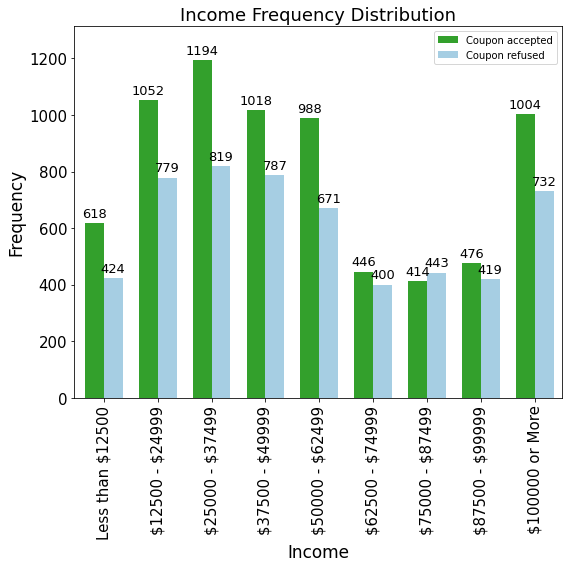

time: 291 ms (started: 2023-01-10 16:48:48 -08:00)


In [51]:
feature_column_name = 'income'
feature_column_name_label='Income'
bar_orientation = 'vertical'

dpi=100
figure_filename = '../reports/figures/figure_'+ str(feature_column_name) +'_frequency_distribution_'+ str(bar_orientation) + '_multiple_bar_coupon_accepted_coupon_refused_all_data_dpi_' + str(dpi) + '_v' + filename_version + '.png'

multibar_column_name_list=['coupon accepted', 'coupon refused']

feature_value_order_list = ['Less than \$12500', '\$12500 - \$24999', '\$25000 - \$37499', '\$37500 - \$49999', '\$50000 - \$62499', '\$62500 - \$74999',  '\$75000 - \$87499', '\$87500 - \$99999', '\$100000 or More',]

title= str(feature_column_name_label) + ' Frequency Distribution'

color_index_list=[3,0]

xtick_rotation=90

if bar_orientation == 'vertical':
    figsize=(8,8)
    xlabel=feature_column_name_label

    #get column name, coupon accepted (frequency), coupon refused (frequency)
    df_income_coupon_accepted_coupon_refused = icr.get_feature_target_frequency_data_frame(df, feature_column_name=feature_column_name)

    #sort by value order list
    df_income_coupon_accepted_coupon_refused = icr.sort_data_frame(df=df_income_coupon_accepted_coupon_refused, feature_column_name=feature_column_name, feature_value_order_list=feature_value_order_list, ascending_true_false=True).drop(columns=[str(feature_column_name)+'_rank'])
    
    icr.plot_vertical_bar_graph(df=df_income_coupon_accepted_coupon_refused, feature_column_name=feature_column_name, multibar_column_name_list=multibar_column_name_list, title=title, xlabel=xlabel,color_list=color_list, figsize=figsize, color_index_list=color_index_list, figure_filename=figure_filename, dpi=dpi, xtick_rotation=xtick_rotation)

elif bar_orientation == 'horizontal':
    figsize=(8,6)
    ylabel=feature_column_name_label

    #get column name, coupon accepted (frequency), coupon refused (frequency)
    df_income_coupon_accepted_coupon_refused = icr.get_feature_target_frequency_data_frame(df, feature_column_name=feature_column_name)

    #sort by value order list
    df_income_coupon_accepted_coupon_refused = icr.sort_data_frame(df=df_income_coupon_accepted_coupon_refused, feature_column_name=feature_column_name, feature_value_order_list=feature_value_order_list, ascending_true_false=False).drop(columns=[str(feature_column_name)+'_rank'])

    icr.plot_horizontal_bar_graph(df=df_income_coupon_accepted_coupon_refused, feature_column_name=feature_column_name, multibar_column_name_list=multibar_column_name_list, title=title, ylabel=ylabel, figsize=figsize, color_list=color_list, color_index_list=color_index_list, figure_filename=figure_filename, dpi=dpi)



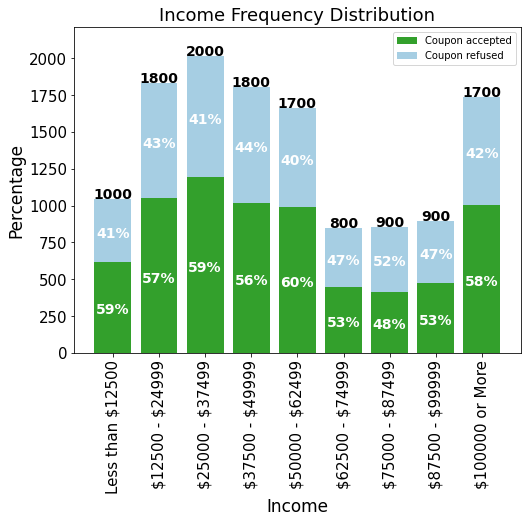

time: 322 ms (started: 2023-01-10 16:48:49 -08:00)


In [52]:
feature_column_name = 'income'
feature_column_name_label=feature_column_name.capitalize()
xlabel=feature_column_name_label
ylabel='Percentage'

xtick_rotation=90
bar_orientation = 'vertical'
annotation_type = 'percentage'
frequency_annotation_round_by_number=-2
rectangle_annotation_y_offset = -45

dpi=100
figure_filename = '../reports/figures/figure_'+ str(feature_column_name) +'_frequency_distribution_'+ str(bar_orientation) + '_stacked_bar_coupon_accepted_coupon_refused_'+ str(annotation_type) + '_annotation_all_data_dpi_' + str(dpi) + '_v' + filename_version + '.png'

feature_value_order_list = ['Less than \$12500', '\$12500 - \$24999', '\$25000 - \$37499', '\$37500 - \$49999', '\$50000 - \$62499', '\$62500 - \$74999',  '\$75000 - \$87499', '\$87500 - \$99999', '\$100000 or More',]
xtick_dictionary = None

title= str(feature_column_name_label) + ' Frequency Distribution'

color_index_list=[3,0]
colors = [color_list[color_index_list[0]], color_list[color_index_list[1]]]


figsize=(8,8)


#get column name, coupon accepted (frequency), coupon refused (frequency)
df_income_coupon_accepted_coupon_refused = icr.get_feature_target_frequency_data_frame(df, feature_column_name=feature_column_name, append_percentage_true_false=True)

#sort by value order list
df_income_coupon_accepted_coupon_refused = icr.sort_data_frame(df=df_income_coupon_accepted_coupon_refused, feature_column_name=feature_column_name, feature_value_order_list=feature_value_order_list, ascending_true_false=True).drop(columns=[str(feature_column_name)+'_rank'])

#index feature column
df_index_income_coupon_refused_coupon_accepted = df_income_coupon_accepted_coupon_refused.set_index(feature_column_name)

icr.plot_vertical_stacked_bar_graph(df=df_index_income_coupon_refused_coupon_accepted, feature_column_name=feature_column_name, feature_column_name_label=feature_column_name_label, ylabel=ylabel, xlabel=xlabel, figure_filename=figure_filename, annotation_text_size=14, dpi=dpi, xtick_rotation=xtick_rotation, xtick_dictionary=xtick_dictionary, colors=colors, annotation_type=annotation_type, frequency_annotation_round_by_number=frequency_annotation_round_by_number, rectangle_annotation_y_offset=rectangle_annotation_y_offset)



#### Income Distribution (Vertical Bar Plot and Coupon Accepted Percentage Line Plot)

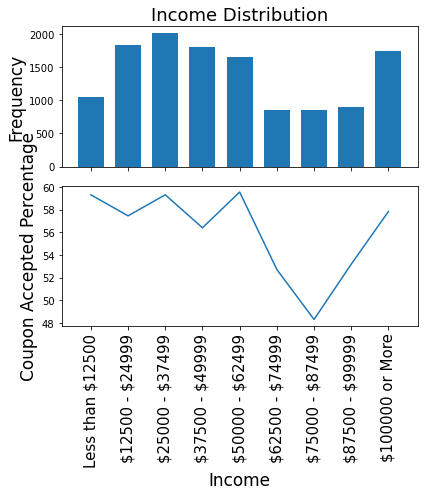

time: 359 ms (started: 2023-01-10 16:48:49 -08:00)


In [53]:
feature_column_name='income'
feature_value_order_list = ['Less than \$12500', '\$12500 - \$24999', '\$25000 - \$37499', '\$37500 - \$49999', '\$50000 - \$62499', '\$62500 - \$74999',  '\$75000 - \$87499', '\$87500 - \$99999', '\$100000 or More',]


#get column name, coupon accepted (frequency), coupon refused (frequency)
df_income_coupon_accepted_coupon_refused = icr.get_feature_target_frequency_data_frame(df, feature_column_name=feature_column_name, append_percentage_true_false=True)

#sort by value order list
df_income_coupon_accepted_coupon_refused = icr.sort_data_frame(df=df_income_coupon_accepted_coupon_refused, feature_column_name=feature_column_name, feature_value_order_list=feature_value_order_list, ascending_true_false=True).drop(columns=[str(feature_column_name)+'_rank'])


title = 'Income Distribution'
frequency_ylabel = 'Frequency'
percentage_ylabel = 'Coupon Accepted Percentage'
xlabel = feature_column_name.capitalize()
bar_orientation = 'vertical'

bar_width=.7
figsize=(6,7)
frequency_ylim=None
percentage_ylim=None

dpi=100
figure_filename = '../reports/figures/figure_income_frequency_distribution_'+ str(bar_orientation) + '_bar_plot_and_percentage_line_chart_all_data_dpi_' + str(dpi) + '_v' + filename_version + '.png'

figure, (axes1, axes2) = plt.subplots(nrows=2, ncols=1, sharex='col', sharey='row', figsize=figsize)
axes1.bar(feature_value_order_list, df_income_coupon_accepted_coupon_refused.loc[:, 'total'].to_list(), width=bar_width, color=color_list[1])
axes2.plot(feature_value_order_list, df_income_coupon_accepted_coupon_refused.loc[:, 'percentage accepted'].to_list())

index_array = np.arange(len(feature_value_order_list))

axes1.set_title(title, fontsize=18)
axes1.set_ylabel(frequency_ylabel, fontsize=17)
axes2.set_ylabel(percentage_ylabel, fontsize=17)
axes2.set_xlabel(xlabel, fontsize=17)
axes2.set_xticks(ticks=index_array, labels=feature_value_order_list, rotation=90, fontsize=15)

axes1.set_ylim(frequency_ylim) if frequency_ylim != None else None
axes2.set_ylim(percentage_ylim) if percentage_ylim != None else None

plt.tight_layout()

plt.savefig(figure_filename, bbox_inches='tight', dpi=dpi)

plt.show()


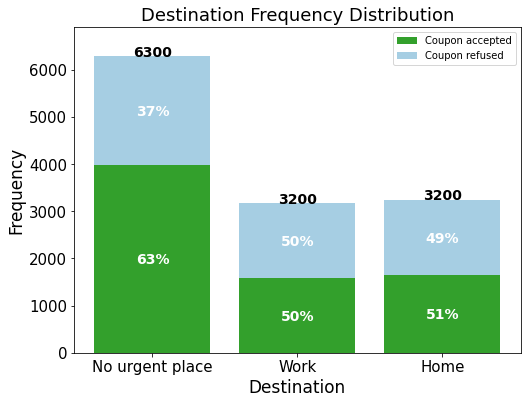

time: 173 ms (started: 2023-01-10 16:48:49 -08:00)


In [54]:
feature_column_name = 'destination'
feature_column_name_label=feature_column_name.capitalize()
xlabel=feature_column_name_label
ylabel='Frequency'

xtick_rotation=0
bar_orientation = 'vertical'
annotation_type = 'percentage'
frequency_annotation_round_by_number=-2

dpi=100
figure_filename = '../reports/figures/figure_'+ str(feature_column_name) +'_frequency_distribution_'+ str(bar_orientation) + '_stacked_bar_coupon_accepted_coupon_refused_'+ str(annotation_type) + '_annotation_all_data_dpi_' + str(dpi) + '_v' + filename_version + '.png'

feature_value_order_list = ['No Urgent Place', 'Work', 'Home']
xtick_dictionary = {'No Urgent Place':'No urgent place', 'Work':'Work', 'Home':'Home'}

title= str(feature_column_name_label) + ' Frequency Distribution'

color_index_list=[3,0]
colors = [color_list[color_index_list[0]], color_list[color_index_list[1]]]

y_upper_limit=None

figsize=(8,8)
rectangle_annotation_y_offset = -100


#get column name, coupon accepted (frequency), coupon refused (frequency)
df_income_coupon_accepted_coupon_refused = icr.get_feature_target_frequency_data_frame(df, feature_column_name=feature_column_name, append_percentage_true_false=True)

#sort by value order list
df_income_coupon_accepted_coupon_refused = icr.sort_data_frame(df=df_income_coupon_accepted_coupon_refused, feature_column_name=feature_column_name, feature_value_order_list=feature_value_order_list, ascending_true_false=True).drop(columns=[str(feature_column_name)+'_rank'])

#index feature column
df_index_income_coupon_refused_coupon_accepted = df_income_coupon_accepted_coupon_refused.set_index(feature_column_name)

icr.plot_vertical_stacked_bar_graph(df=df_index_income_coupon_refused_coupon_accepted, feature_column_name=feature_column_name, feature_column_name_label=feature_column_name_label, ylabel=ylabel, xlabel=xlabel, figure_filename=figure_filename, annotation_text_size=14, dpi=dpi, xtick_rotation=xtick_rotation, xtick_dictionary=xtick_dictionary, colors=colors, annotation_type=annotation_type, frequency_annotation_round_by_number=frequency_annotation_round_by_number, y_upper_limit=y_upper_limit, rectangle_annotation_y_offset=rectangle_annotation_y_offset)



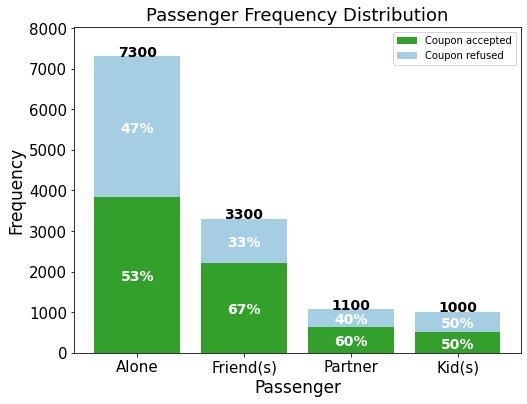

time: 190 ms (started: 2023-01-10 16:48:50 -08:00)


In [55]:
feature_column_name = 'passenger'
feature_column_name_label=feature_column_name.capitalize()
xlabel=feature_column_name_label
ylabel='Frequency'

xtick_rotation=0
bar_orientation = 'vertical'
annotation_type = 'percentage'
frequency_annotation_round_by_number=-2

dpi=100
figure_filename = '../reports/figures/figure_'+ str(feature_column_name) +'_frequency_distribution_'+ str(bar_orientation) + '_stacked_bar_coupon_accepted_coupon_refused_'+ str(annotation_type) + '_annotation_all_data_dpi_' + str(dpi) + '_v' + filename_version + '.png'

feature_value_order_list = ['Alone', 'Friend(s)', 'Partner', 'Kid(s)', ]
xtick_dictionary = None

title= str(feature_column_name_label) + ' Frequency Distribution'

color_index_list=[3,0]
colors = [color_list[color_index_list[0]], color_list[color_index_list[1]]]

y_upper_limit=None

figsize=(8,8)

rectangle_annotation_y_offset=-140

#get column name, coupon accepted (frequency), coupon refused (frequency)
df_income_coupon_accepted_coupon_refused = icr.get_feature_target_frequency_data_frame(df, feature_column_name=feature_column_name, append_percentage_true_false=True)

#sort by value order list
df_income_coupon_accepted_coupon_refused = icr.sort_data_frame(df=df_income_coupon_accepted_coupon_refused, feature_column_name=feature_column_name, feature_value_order_list=feature_value_order_list, ascending_true_false=True).drop(columns=[str(feature_column_name)+'_rank'])

#index feature column
df_index_income_coupon_refused_coupon_accepted = df_income_coupon_accepted_coupon_refused.set_index(feature_column_name)

icr.plot_vertical_stacked_bar_graph(df=df_index_income_coupon_refused_coupon_accepted, feature_column_name=feature_column_name, feature_column_name_label=feature_column_name_label, ylabel=ylabel, xlabel=xlabel, figure_filename=figure_filename, annotation_text_size=14, dpi=dpi, xtick_rotation=xtick_rotation, xtick_dictionary=xtick_dictionary, colors=colors, annotation_type=annotation_type, frequency_annotation_round_by_number=frequency_annotation_round_by_number, y_upper_limit=y_upper_limit, rectangle_annotation_y_offset=rectangle_annotation_y_offset)



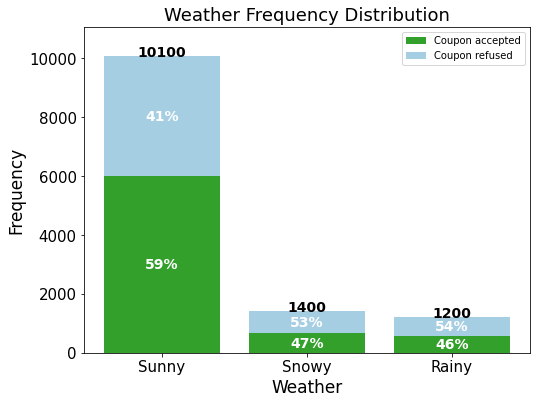

time: 164 ms (started: 2023-01-10 16:48:50 -08:00)


In [56]:
feature_column_name = 'weather'
feature_column_name_label=feature_column_name.capitalize()
xlabel=feature_column_name_label
ylabel='Frequency'

xtick_rotation=0
bar_orientation = 'vertical'
annotation_type = 'percentage'
frequency_annotation_round_by_number=-2

dpi=100
figure_filename = '../reports/figures/figure_'+ str(feature_column_name) +'_frequency_distribution_'+ str(bar_orientation) + '_stacked_bar_coupon_accepted_coupon_refused_'+ str(annotation_type) + '_annotation_all_data_dpi_' + str(dpi) + '_v' + filename_version + '.png'

feature_value_order_list = ['Sunny', 'Snowy', 'Rainy', ]
xtick_dictionary = None

title= str(feature_column_name_label) + ' Frequency Distribution'

color_index_list=[3,0]
colors = [color_list[color_index_list[0]], color_list[color_index_list[1]]]

y_upper_limit=None

figsize=(8,8)

rectangle_annotation_y_offset=-140

#get column name, coupon accepted (frequency), coupon refused (frequency)
df_income_coupon_accepted_coupon_refused = icr.get_feature_target_frequency_data_frame(df, feature_column_name=feature_column_name, append_percentage_true_false=True)

#sort by value order list
df_income_coupon_accepted_coupon_refused = icr.sort_data_frame(df=df_income_coupon_accepted_coupon_refused, feature_column_name=feature_column_name, feature_value_order_list=feature_value_order_list, ascending_true_false=True).drop(columns=[str(feature_column_name)+'_rank'])

#index feature column
df_index_income_coupon_refused_coupon_accepted = df_income_coupon_accepted_coupon_refused.set_index(feature_column_name)

icr.plot_vertical_stacked_bar_graph(df=df_index_income_coupon_refused_coupon_accepted, feature_column_name=feature_column_name, feature_column_name_label=feature_column_name_label, ylabel=ylabel, xlabel=xlabel, figure_filename=figure_filename, annotation_text_size=14, dpi=dpi, xtick_rotation=xtick_rotation, xtick_dictionary=xtick_dictionary, colors=colors, annotation_type=annotation_type, frequency_annotation_round_by_number=frequency_annotation_round_by_number, y_upper_limit=y_upper_limit, rectangle_annotation_y_offset=rectangle_annotation_y_offset)



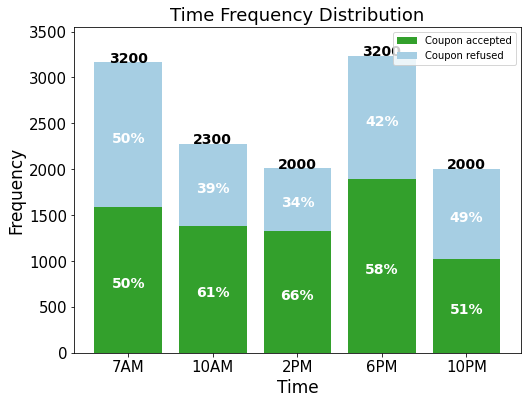

time: 202 ms (started: 2023-01-10 16:48:50 -08:00)


In [57]:
feature_column_name = 'time'
feature_column_name_label=feature_column_name.capitalize()
xlabel=feature_column_name_label
ylabel='Frequency'

xtick_rotation=0
bar_orientation = 'vertical'
annotation_type = 'percentage'
frequency_annotation_round_by_number=-2

dpi=100
figure_filename = '../reports/figures/figure_'+ str(feature_column_name) +'_frequency_distribution_'+ str(bar_orientation) + '_stacked_bar_coupon_accepted_coupon_refused_'+ str(annotation_type) + '_annotation_all_data_dpi_' + str(dpi) + '_v' + filename_version + '.png'

feature_value_order_list = ['7AM', '10AM', '2PM', '6PM', '10PM']
xtick_dictionary = None

title= str(feature_column_name_label) + ' Frequency Distribution'

color_index_list=[3,0]
colors = [color_list[color_index_list[0]], color_list[color_index_list[1]]]

y_upper_limit=None

figsize=(8,8)

rectangle_annotation_y_offset=-80

#get column name, coupon accepted (frequency), coupon refused (frequency)
df_income_coupon_accepted_coupon_refused = icr.get_feature_target_frequency_data_frame(df, feature_column_name=feature_column_name, append_percentage_true_false=True)

#sort by value order list
df_income_coupon_accepted_coupon_refused = icr.sort_data_frame(df=df_income_coupon_accepted_coupon_refused, feature_column_name=feature_column_name, feature_value_order_list=feature_value_order_list, ascending_true_false=True).drop(columns=[str(feature_column_name)+'_rank'])

#index feature column
df_index_income_coupon_refused_coupon_accepted = df_income_coupon_accepted_coupon_refused.set_index(feature_column_name)

icr.plot_vertical_stacked_bar_graph(df=df_index_income_coupon_refused_coupon_accepted, feature_column_name=feature_column_name, feature_column_name_label=feature_column_name_label, ylabel=ylabel, xlabel=xlabel, figure_filename=figure_filename, annotation_text_size=14, dpi=dpi, xtick_rotation=xtick_rotation, xtick_dictionary=xtick_dictionary, colors=colors, annotation_type=annotation_type, frequency_annotation_round_by_number=frequency_annotation_round_by_number, y_upper_limit=y_upper_limit, rectangle_annotation_y_offset=rectangle_annotation_y_offset)



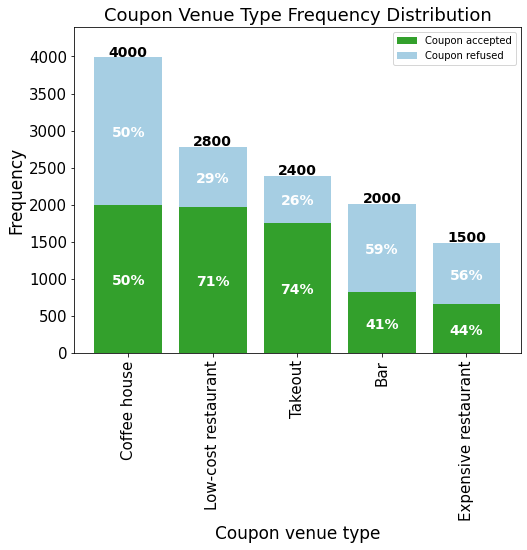

time: 229 ms (started: 2023-01-10 16:48:50 -08:00)


In [58]:
feature_column_name = 'coupon_venue_type'
feature_column_name_label='Coupon Venue Type'#feature_column_name.capitalize()
xlabel='Coupon venue type'#feature_column_name_label
ylabel='Frequency'

xtick_rotation=90
bar_orientation = 'vertical'
annotation_type = 'percentage'
frequency_annotation_round_by_number=-2

dpi=100
figure_filename = '../reports/figures/figure_'+ str(feature_column_name) +'_frequency_distribution_'+ str(bar_orientation) + '_stacked_bar_coupon_accepted_coupon_refused_'+ str(annotation_type) + '_annotation_all_data_dpi_' + str(dpi) + '_v' + filename_version + '.png'

feature_value_order_list = ['Coffee House', 'Restaurant(<20)', 'Carry out & Take away', 'Bar', 'Restaurant(20-50)']
xtick_dictionary = {'Coffee House':'Coffee house', 'Restaurant(<20)':'Low-cost restaurant', 'Carry out & Take away':'Takeout', 'Bar':'Bar', 'Restaurant(20-50)':'Expensive restaurant'}

title= str(feature_column_name_label) + ' Frequency Distribution'

color_index_list=[3,0]
colors = [color_list[color_index_list[0]], color_list[color_index_list[1]]]

y_upper_limit=None

figsize=(8,6)

rectangle_annotation_y_offset=-80

#get column name, coupon accepted (frequency), coupon refused (frequency)
df_income_coupon_accepted_coupon_refused = icr.get_feature_target_frequency_data_frame(df, feature_column_name=feature_column_name, append_percentage_true_false=True)

#sort by value order list
df_income_coupon_accepted_coupon_refused = icr.sort_data_frame(df=df_income_coupon_accepted_coupon_refused, feature_column_name=feature_column_name, feature_value_order_list=feature_value_order_list, ascending_true_false=True).drop(columns=[str(feature_column_name)+'_rank'])

#index feature column
df_index_income_coupon_refused_coupon_accepted = df_income_coupon_accepted_coupon_refused.set_index(feature_column_name)

icr.plot_vertical_stacked_bar_graph(df=df_index_income_coupon_refused_coupon_accepted, feature_column_name=feature_column_name, feature_column_name_label=feature_column_name_label, ylabel=ylabel, xlabel=xlabel, figure_filename=figure_filename, annotation_text_size=14, dpi=dpi, xtick_rotation=xtick_rotation, xtick_dictionary=xtick_dictionary, colors=colors, annotation_type=annotation_type, frequency_annotation_round_by_number=frequency_annotation_round_by_number, y_upper_limit=y_upper_limit, rectangle_annotation_y_offset=rectangle_annotation_y_offset, figsize=figsize)



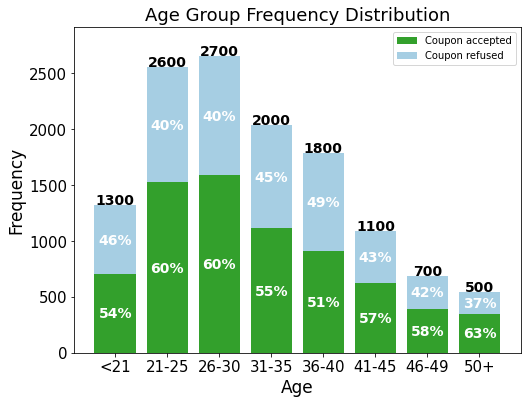

time: 235 ms (started: 2023-01-10 16:48:50 -08:00)


In [59]:
feature_column_name = 'age'
feature_column_name_label='Age Group'#feature_column_name.capitalize()
xlabel='Age'#feature_column_name_label
ylabel='Frequency'

xtick_rotation=0
bar_orientation = 'vertical'
annotation_type = 'percentage'
frequency_annotation_round_by_number=-2

dpi=100
figure_filename = '../reports/figures/figure_'+ str(feature_column_name) +'_frequency_distribution_'+ str(bar_orientation) + '_stacked_bar_coupon_accepted_coupon_refused_'+ str(annotation_type) + '_annotation_all_data_dpi_' + str(dpi) + '_v' + filename_version + '.png'

feature_value_order_list = ['<21', '21-25', '26-30', '31-35', '36-40', '41-45', '46-49', '50+']
xtick_dictionary = None #{}

title= str(feature_column_name_label) + ' Frequency Distribution'

color_index_list=[3,0]
colors = [color_list[color_index_list[0]], color_list[color_index_list[1]]]

y_upper_limit=None

figsize=(8,6)

rectangle_annotation_y_offset=-40

#get column name, coupon accepted (frequency), coupon refused (frequency)
df_income_coupon_accepted_coupon_refused = icr.get_feature_target_frequency_data_frame(df, feature_column_name=feature_column_name, append_percentage_true_false=True)

#sort by value order list
df_income_coupon_accepted_coupon_refused = icr.sort_data_frame(df=df_income_coupon_accepted_coupon_refused, feature_column_name=feature_column_name, feature_value_order_list=feature_value_order_list, ascending_true_false=True).drop(columns=[str(feature_column_name)+'_rank'])

#index feature column
df_index_income_coupon_refused_coupon_accepted = df_income_coupon_accepted_coupon_refused.set_index(feature_column_name)

icr.plot_vertical_stacked_bar_graph(df=df_index_income_coupon_refused_coupon_accepted, feature_column_name=feature_column_name, feature_column_name_label=feature_column_name_label, ylabel=ylabel, xlabel=xlabel, figure_filename=figure_filename, annotation_text_size=14, dpi=dpi, xtick_rotation=xtick_rotation, xtick_dictionary=xtick_dictionary, colors=colors, annotation_type=annotation_type, frequency_annotation_round_by_number=frequency_annotation_round_by_number, y_upper_limit=y_upper_limit, rectangle_annotation_y_offset=rectangle_annotation_y_offset, figsize=figsize)



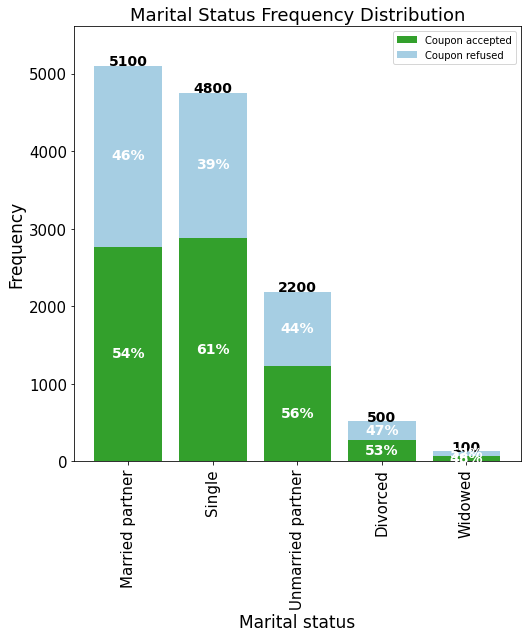

time: 214 ms (started: 2023-01-10 16:48:51 -08:00)


In [60]:
feature_column_name = 'maritalStatus'
feature_column_name_label='Marital Status'#feature_column_name.capitalize()
xlabel='Marital status'#feature_column_name_label
ylabel='Frequency'

xtick_rotation=90
bar_orientation = 'vertical'
annotation_type = 'percentage'
frequency_annotation_round_by_number=-2

dpi=100
figure_filename = '../reports/figures/figure_'+ str(feature_column_name) +'_frequency_distribution_'+ str(bar_orientation) + '_stacked_bar_coupon_accepted_coupon_refused_'+ str(annotation_type) + '_annotation_all_data_dpi_' + str(dpi) + '_v' + filename_version + '.png'

feature_value_order_list = ['Married partner', 'Single', 'Unmarried partner', 'Divorced', 'Widowed']
xtick_dictionary = None #{}

title= str(feature_column_name_label) + ' Frequency Distribution'

color_index_list=[3,0]
colors = [color_list[color_index_list[0]], color_list[color_index_list[1]]]

y_upper_limit=None

figsize=(8,8)

rectangle_annotation_y_offset=-40

#get column name, coupon accepted (frequency), coupon refused (frequency)
df_income_coupon_accepted_coupon_refused = icr.get_feature_target_frequency_data_frame(df, feature_column_name=feature_column_name, append_percentage_true_false=True)

#sort by value order list
df_income_coupon_accepted_coupon_refused = icr.sort_data_frame(df=df_income_coupon_accepted_coupon_refused, feature_column_name=feature_column_name, feature_value_order_list=feature_value_order_list, ascending_true_false=True).drop(columns=[str(feature_column_name)+'_rank'])

#index feature column
df_index_income_coupon_refused_coupon_accepted = df_income_coupon_accepted_coupon_refused.set_index(feature_column_name)

icr.plot_vertical_stacked_bar_graph(df=df_index_income_coupon_refused_coupon_accepted, feature_column_name=feature_column_name, feature_column_name_label=feature_column_name_label, ylabel=ylabel, xlabel=xlabel, figure_filename=figure_filename, annotation_text_size=14, dpi=dpi, xtick_rotation=xtick_rotation, xtick_dictionary=xtick_dictionary, colors=colors, annotation_type=annotation_type, frequency_annotation_round_by_number=frequency_annotation_round_by_number, y_upper_limit=y_upper_limit, rectangle_annotation_y_offset=rectangle_annotation_y_offset, figsize=figsize)



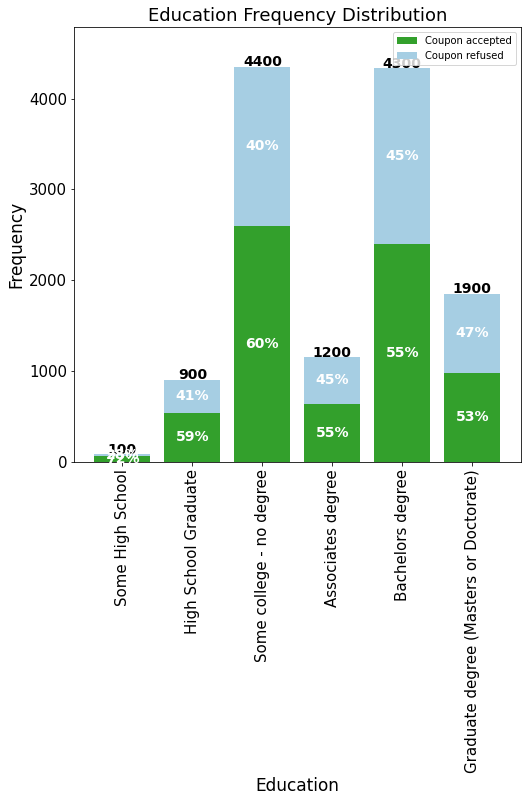

time: 240 ms (started: 2023-01-10 16:48:51 -08:00)


In [61]:
feature_column_name = 'education'
feature_column_name_label=feature_column_name.capitalize()
xlabel=feature_column_name_label
ylabel='Frequency'

xtick_rotation=90
bar_orientation = 'vertical'
annotation_type = 'percentage'
frequency_annotation_round_by_number=-2

dpi=100
figure_filename = '../reports/figures/figure_'+ str(feature_column_name) +'_frequency_distribution_'+ str(bar_orientation) + '_stacked_bar_coupon_accepted_coupon_refused_'+ str(annotation_type) + '_annotation_all_data_dpi_' + str(dpi) + '_v' + filename_version + '.png'

feature_value_order_list = ['Some High School', 'High School Graduate', 'Some college - no degree', 'Associates degree', 'Bachelors degree', 'Graduate degree (Masters or Doctorate)',]
xtick_dictionary = None #{}

title= str(feature_column_name_label) + ' Frequency Distribution'

color_index_list=[3,0]
colors = [color_list[color_index_list[0]], color_list[color_index_list[1]]]

y_upper_limit=None

figsize=(8,8)

rectangle_annotation_y_offset=-40

#get column name, coupon accepted (frequency), coupon refused (frequency)
df_income_coupon_accepted_coupon_refused = icr.get_feature_target_frequency_data_frame(df, feature_column_name=feature_column_name, append_percentage_true_false=True)

#sort by value order list
df_income_coupon_accepted_coupon_refused = icr.sort_data_frame(df=df_income_coupon_accepted_coupon_refused, feature_column_name=feature_column_name, feature_value_order_list=feature_value_order_list, ascending_true_false=True).drop(columns=[str(feature_column_name)+'_rank'])

#index feature column
df_index_income_coupon_refused_coupon_accepted = df_income_coupon_accepted_coupon_refused.set_index(feature_column_name)

icr.plot_vertical_stacked_bar_graph(df=df_index_income_coupon_refused_coupon_accepted, feature_column_name=feature_column_name, feature_column_name_label=feature_column_name_label, ylabel=ylabel, xlabel=xlabel, figure_filename=figure_filename, annotation_text_size=14, dpi=dpi, xtick_rotation=xtick_rotation, xtick_dictionary=xtick_dictionary, colors=colors, annotation_type=annotation_type, frequency_annotation_round_by_number=frequency_annotation_round_by_number, y_upper_limit=y_upper_limit, rectangle_annotation_y_offset=rectangle_annotation_y_offset, figsize=figsize)



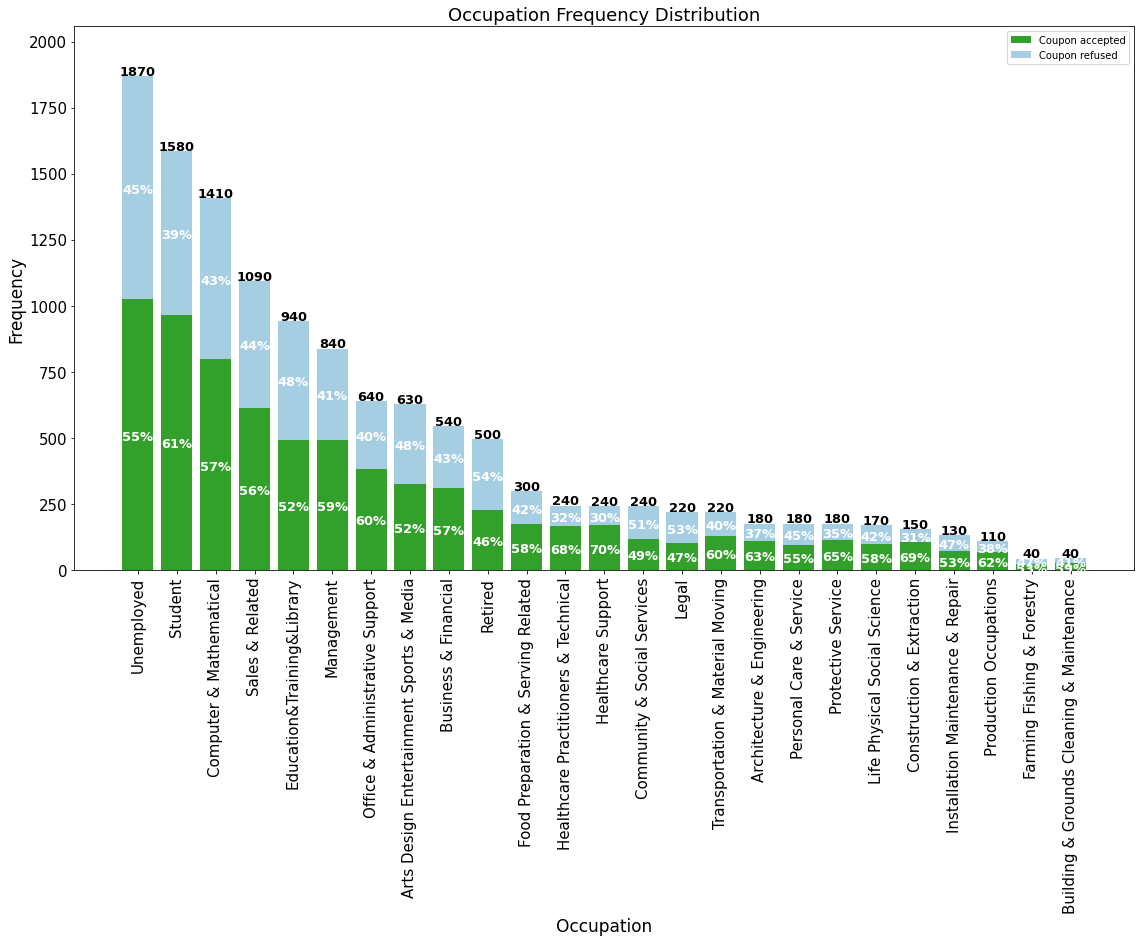

time: 906 ms (started: 2023-01-10 16:48:51 -08:00)


In [62]:
feature_column_name = 'occupation'
feature_column_name_label=feature_column_name.capitalize()
xlabel=feature_column_name_label
ylabel='Frequency'

xtick_rotation=90
bar_orientation = 'vertical'
annotation_type = 'percentage'
annotation_text_size = 13
frequency_annotation_round_by_number=-1

dpi=100
figure_filename = '../reports/figures/figure_'+ str(feature_column_name) +'_frequency_distribution_'+ str(bar_orientation) + '_stacked_bar_coupon_accepted_coupon_refused_'+ str(annotation_type) + '_annotation_all_data_dpi_' + str(dpi) + '_v' + filename_version + '.png'

feature_value_order_list = \
['Unemployed', 'Student', 'Computer & Mathematical', 'Sales & Related', 'Education&Training&Library', 'Management', 
 'Office & Administrative Support', 'Arts Design Entertainment Sports & Media',
 'Business & Financial', 'Retired', 'Food Preparation & Serving Related', 'Healthcare Practitioners & Technical',
 'Healthcare Support', 'Community & Social Services', 'Legal', 'Transportation & Material Moving',
 'Architecture & Engineering', 'Personal Care & Service', 'Protective Service', 'Life Physical Social Science',
 'Construction & Extraction', 'Installation Maintenance & Repair', 'Production Occupations', 'Farming Fishing & Forestry',
 'Building & Grounds Cleaning & Maintenance']

xtick_dictionary = None #{}

title= str(feature_column_name_label) + ' Frequency Distribution'

color_index_list=[3,0]
colors = [color_list[color_index_list[0]], color_list[color_index_list[1]]]

y_upper_limit=None

figsize=(19,10)

rectangle_annotation_y_offset=-20


#get column name, coupon accepted (frequency), coupon refused (frequency)
df_income_coupon_accepted_coupon_refused = icr.get_feature_target_frequency_data_frame(df, feature_column_name=feature_column_name, append_percentage_true_false=True)

#sort by value order list
df_income_coupon_accepted_coupon_refused = icr.sort_data_frame(df=df_income_coupon_accepted_coupon_refused, feature_column_name=feature_column_name, feature_value_order_list=feature_value_order_list, ascending_true_false=True).drop(columns=[str(feature_column_name)+'_rank'])

#index feature column
df_index_income_coupon_refused_coupon_accepted = df_income_coupon_accepted_coupon_refused.set_index(feature_column_name)

icr.plot_vertical_stacked_bar_graph(df=df_index_income_coupon_refused_coupon_accepted, feature_column_name=feature_column_name, feature_column_name_label=feature_column_name_label, ylabel=ylabel, xlabel=xlabel, figure_filename=figure_filename, annotation_text_size=annotation_text_size, dpi=dpi, xtick_dictionary=xtick_dictionary, colors=colors, annotation_type=annotation_type, frequency_annotation_round_by_number=frequency_annotation_round_by_number, y_upper_limit=y_upper_limit, rectangle_annotation_y_offset=rectangle_annotation_y_offset, figsize=figsize, xtick_rotation=xtick_rotation)



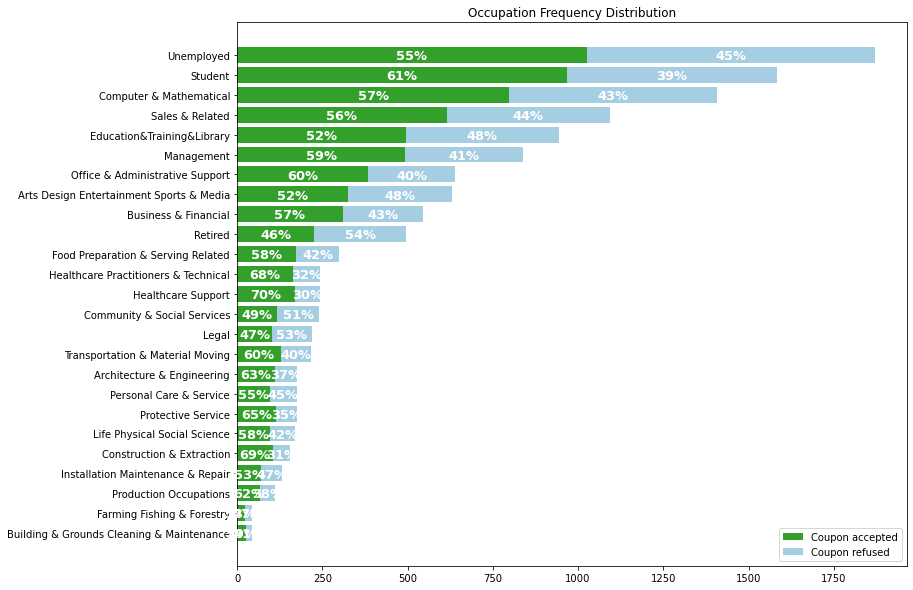

time: 298 ms (started: 2023-01-10 16:48:52 -08:00)


In [63]:
feature_column_name = 'occupation'
feature_column_name_label=feature_column_name.capitalize()
xlabel=feature_column_name_label
ylabel='Frequency'

xtick_rotation=90
bar_orientation = 'vertical'
annotation_type = 'percentage'
frequency_annotation_round_by_number=-2

dpi=100
figure_filename = '../reports/figures/figure_'+ str(feature_column_name) +'_frequency_distribution_'+ str(bar_orientation) + '_stacked_bar_coupon_accepted_coupon_refused_'+ str(annotation_type) + '_annotation_all_data_dpi_' + str(dpi) + '_v' + filename_version + '.png'

feature_value_order_list = ['Building & Grounds Cleaning & Maintenance', 'Farming Fishing & Forestry', 'Production Occupations', 'Installation Maintenance & Repair', 'Construction & Extraction', 'Life Physical Social Science', 'Protective Service', 'Personal Care & Service', 'Architecture & Engineering', 'Transportation & Material Moving', 'Legal', 'Community & Social Services', 'Healthcare Support', 'Healthcare Practitioners & Technical', 'Food Preparation & Serving Related', 'Retired', 'Business & Financial', 'Arts Design Entertainment Sports & Media', 'Office & Administrative Support', 'Management', 'Education&Training&Library', 'Sales & Related', 'Computer & Mathematical', 'Student', 'Unemployed']
xtick_dictionary = None #{}

title= str(feature_column_name_label) + ' Frequency Distribution'

color_index_list=[3,0]
colors = [color_list[color_index_list[0]], color_list[color_index_list[1]]]

x_upper_limit=None

figsize=(12,10)

rectangle_annotation_y_offset=-0.21
annotation_text_size=13


#get column name, coupon accepted (frequency), coupon refused (frequency)
df_income_coupon_accepted_coupon_refused = icr.get_feature_target_frequency_data_frame(df, feature_column_name=feature_column_name, append_percentage_true_false=True)

#sort by value order list
df_income_coupon_accepted_coupon_refused = icr.sort_data_frame(df=df_income_coupon_accepted_coupon_refused, feature_column_name=feature_column_name, feature_value_order_list=feature_value_order_list, ascending_true_false=True).drop(columns=[str(feature_column_name)+'_rank'])

#index feature column
df_index_income_coupon_refused_coupon_accepted = df_income_coupon_accepted_coupon_refused.set_index(feature_column_name)


icr.plot_horizontal_stacked_bar_graph(df=df_index_income_coupon_refused_coupon_accepted, figsize=figsize, rectangle_annotation_y_offset=rectangle_annotation_y_offset, annotation_text_size=annotation_text_size, x_upper_limit=x_upper_limit, color_list=color_list, title=title)




#### Bar Monthly Visit Frequency Frequency Distribution

In [64]:
icr.reverse_key_value_of_dictionary({'never':1, '<1':2, '1-3':3, '4-8':4, '>8':5, 'no response':0})


{1: 'never', 2: '<1', 3: '1-3', 4: '4-8', 5: '>8', 0: 'no response'}

time: 1.86 ms (started: 2023-01-10 16:48:52 -08:00)


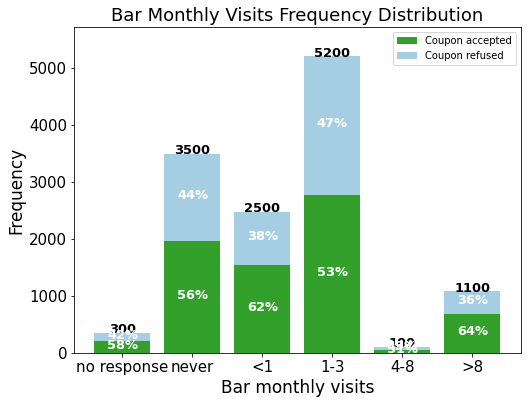

time: 216 ms (started: 2023-01-10 16:48:52 -08:00)


In [65]:
feature_column_name = 'Bar_venue_visit_frequency_yes_response_ordinal_integer_encoding'
feature_column_name_label='Bar Monthly Visits'
xlabel='Bar monthly visits'
ylabel='Frequency'

xtick_rotation=0
bar_orientation = 'vertical'
annotation_type = 'percentage'
annotation_text_size = 13
frequency_annotation_round_by_number=-2

dpi=100
figure_filename = '../reports/figures/figure_'+ str(feature_column_name) +'_frequency_distribution_'+ str(bar_orientation) + '_stacked_bar_coupon_accepted_coupon_refused_'+ str(annotation_type) + '_annotation_all_data_dpi_' + str(dpi) + '_v' + filename_version + '.png'

feature_value_order_list = [0, 1, 2, 3, 4, 5]
xtick_dictionary = {1: 'never', 2: '<1', 3: '1-3', 4: '4-8', 5: '>8', 0: 'no response'}

title= str(feature_column_name_label) + ' Frequency Distribution'

color_index_list=[3,0]
colors = [color_list[color_index_list[0]], color_list[color_index_list[1]]]

y_upper_limit=None

figsize=(8,6)

rectangle_annotation_y_offset=-20


#get column name, coupon accepted (frequency), coupon refused (frequency)
df_income_coupon_accepted_coupon_refused = icr.get_feature_target_frequency_data_frame(df, feature_column_name=feature_column_name, append_percentage_true_false=True)

#sort by value order list
df_income_coupon_accepted_coupon_refused = icr.sort_data_frame(df=df_income_coupon_accepted_coupon_refused, feature_column_name=feature_column_name, feature_value_order_list=feature_value_order_list, ascending_true_false=True).drop(columns=[str(feature_column_name)+'_rank'])

#index feature column
df_index_income_coupon_refused_coupon_accepted = df_income_coupon_accepted_coupon_refused.set_index(feature_column_name)

icr.plot_vertical_stacked_bar_graph(df=df_index_income_coupon_refused_coupon_accepted, feature_column_name=feature_column_name, feature_column_name_label=feature_column_name_label, ylabel=ylabel, xlabel=xlabel, figure_filename=figure_filename, annotation_text_size=annotation_text_size, dpi=dpi, xtick_dictionary=xtick_dictionary, colors=colors, annotation_type=annotation_type, frequency_annotation_round_by_number=frequency_annotation_round_by_number, y_upper_limit=y_upper_limit, rectangle_annotation_y_offset=rectangle_annotation_y_offset, figsize=figsize, xtick_rotation=xtick_rotation)



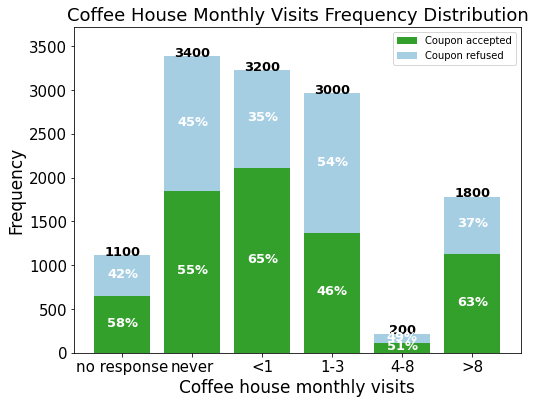

time: 236 ms (started: 2023-01-10 16:48:53 -08:00)


In [66]:
feature_column_name = 'CoffeeHouse_venue_visit_frequency_yes_response_ordinal_integer_encoding'
feature_column_name_label='Coffee House Monthly Visits'
xlabel='Coffee house monthly visits'
ylabel='Frequency'

xtick_rotation=0
bar_orientation = 'vertical'
annotation_type = 'percentage'
annotation_text_size = 13
frequency_annotation_round_by_number=-2

dpi=100
figure_filename = '../reports/figures/figure_'+ str(feature_column_name) +'_frequency_distribution_'+ str(bar_orientation) + '_stacked_bar_coupon_accepted_coupon_refused_'+ str(annotation_type) + '_annotation_all_data_dpi_' + str(dpi) + '_v' + filename_version + '.png'

feature_value_order_list = [0, 1, 2, 3, 4, 5]
xtick_dictionary = {1: 'never', 2: '<1', 3: '1-3', 4: '4-8', 5: '>8', 0: 'no response'}

title= str(feature_column_name_label) + ' Frequency Distribution'

color_index_list=[3,0]
colors = [color_list[color_index_list[0]], color_list[color_index_list[1]]]

y_upper_limit=None

figsize=(8,6)

rectangle_annotation_y_offset=-20


#get column name, coupon accepted (frequency), coupon refused (frequency)
df_income_coupon_accepted_coupon_refused = icr.get_feature_target_frequency_data_frame(df, feature_column_name=feature_column_name, append_percentage_true_false=True)

#sort by value order list
df_income_coupon_accepted_coupon_refused = icr.sort_data_frame(df=df_income_coupon_accepted_coupon_refused, feature_column_name=feature_column_name, feature_value_order_list=feature_value_order_list, ascending_true_false=True).drop(columns=[str(feature_column_name)+'_rank'])

#index feature column
df_index_income_coupon_refused_coupon_accepted = df_income_coupon_accepted_coupon_refused.set_index(feature_column_name)

icr.plot_vertical_stacked_bar_graph(df=df_index_income_coupon_refused_coupon_accepted, feature_column_name=feature_column_name, feature_column_name_label=feature_column_name_label, ylabel=ylabel, xlabel=xlabel, figure_filename=figure_filename, annotation_text_size=annotation_text_size, dpi=dpi, xtick_dictionary=xtick_dictionary, colors=colors, annotation_type=annotation_type, frequency_annotation_round_by_number=frequency_annotation_round_by_number, y_upper_limit=y_upper_limit, rectangle_annotation_y_offset=rectangle_annotation_y_offset, figsize=figsize, xtick_rotation=xtick_rotation)



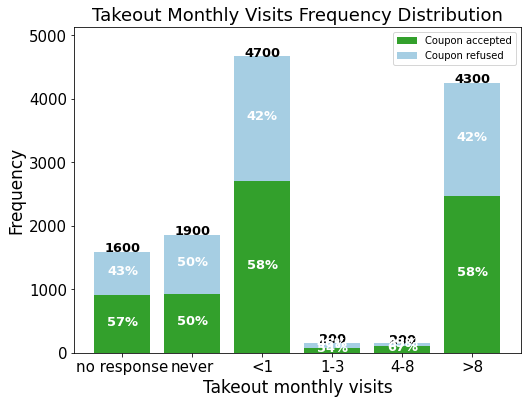

time: 249 ms (started: 2023-01-10 16:48:53 -08:00)


In [67]:
feature_column_name = 'CarryAway_venue_visit_frequency_yes_response_ordinal_integer_encoding'
feature_column_name_label='Takeout Monthly Visits'
xlabel='Takeout monthly visits'
ylabel='Frequency'

xtick_rotation=0
bar_orientation = 'vertical'
annotation_type = 'percentage'
annotation_text_size = 13
frequency_annotation_round_by_number=-2

dpi=100
figure_filename = '../reports/figures/figure_'+ str(feature_column_name) +'_frequency_distribution_'+ str(bar_orientation) + '_stacked_bar_coupon_accepted_coupon_refused_'+ str(annotation_type) + '_annotation_all_data_dpi_' + str(dpi) + '_v' + filename_version + '.png'

feature_value_order_list = [0, 1, 2, 3, 4, 5]
xtick_dictionary = {1: 'never', 2: '<1', 3: '1-3', 4: '4-8', 5: '>8', 0: 'no response'}

title= str(feature_column_name_label) + ' Frequency Distribution'

color_index_list=[3,0]
colors = [color_list[color_index_list[0]], color_list[color_index_list[1]]]

y_upper_limit=None

figsize=(8,6)

rectangle_annotation_y_offset=-20


#get column name, coupon accepted (frequency), coupon refused (frequency)
df_income_coupon_accepted_coupon_refused = icr.get_feature_target_frequency_data_frame(df, feature_column_name=feature_column_name, append_percentage_true_false=True)

#sort by value order list
df_income_coupon_accepted_coupon_refused = icr.sort_data_frame(df=df_income_coupon_accepted_coupon_refused, feature_column_name=feature_column_name, feature_value_order_list=feature_value_order_list, ascending_true_false=True).drop(columns=[str(feature_column_name)+'_rank'])

#index feature column
df_index_income_coupon_refused_coupon_accepted = df_income_coupon_accepted_coupon_refused.set_index(feature_column_name)

icr.plot_vertical_stacked_bar_graph(df=df_index_income_coupon_refused_coupon_accepted, feature_column_name=feature_column_name, feature_column_name_label=feature_column_name_label, ylabel=ylabel, xlabel=xlabel, figure_filename=figure_filename, annotation_text_size=annotation_text_size, dpi=dpi, xtick_dictionary=xtick_dictionary, colors=colors, annotation_type=annotation_type, frequency_annotation_round_by_number=frequency_annotation_round_by_number, y_upper_limit=y_upper_limit, rectangle_annotation_y_offset=rectangle_annotation_y_offset, figsize=figsize, xtick_rotation=xtick_rotation)



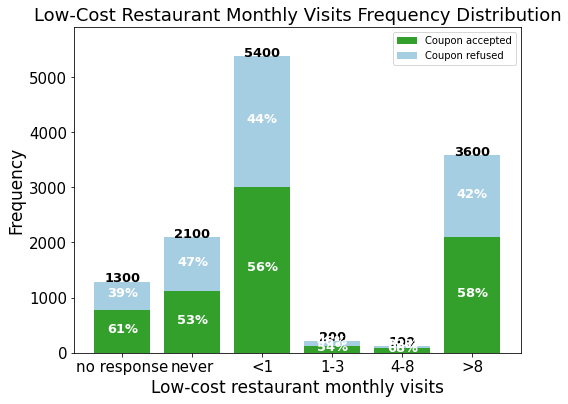

time: 225 ms (started: 2023-01-10 16:48:53 -08:00)


In [68]:
feature_column_name = 'RestaurantLessThan20_venue_visit_frequency_yes_response_ordinal_integer_encoding'
feature_column_name_label='Low-Cost Restaurant Monthly Visits'
xlabel='Low-cost restaurant monthly visits'
ylabel='Frequency'

xtick_rotation=0
bar_orientation = 'vertical'
annotation_type = 'percentage'
annotation_text_size = 13
frequency_annotation_round_by_number=-2

dpi=100
figure_filename = '../reports/figures/figure_'+ str(feature_column_name) +'_frequency_distribution_'+ str(bar_orientation) + '_stacked_bar_coupon_accepted_coupon_refused_'+ str(annotation_type) + '_annotation_all_data_dpi_' + str(dpi) + '_v' + filename_version + '.png'

feature_value_order_list = [0, 1, 2, 3, 4, 5]
xtick_dictionary = {1: 'never', 2: '<1', 3: '1-3', 4: '4-8', 5: '>8', 0: 'no response'}

title= str(feature_column_name_label) + ' Frequency Distribution'

color_index_list=[3,0]
colors = [color_list[color_index_list[0]], color_list[color_index_list[1]]]

y_upper_limit=None

figsize=(8,6)

rectangle_annotation_y_offset=-20


#get column name, coupon accepted (frequency), coupon refused (frequency)
df_income_coupon_accepted_coupon_refused = icr.get_feature_target_frequency_data_frame(df, feature_column_name=feature_column_name, append_percentage_true_false=True)

#sort by value order list
df_income_coupon_accepted_coupon_refused = icr.sort_data_frame(df=df_income_coupon_accepted_coupon_refused, feature_column_name=feature_column_name, feature_value_order_list=feature_value_order_list, ascending_true_false=True).drop(columns=[str(feature_column_name)+'_rank'])

#index feature column
df_index_income_coupon_refused_coupon_accepted = df_income_coupon_accepted_coupon_refused.set_index(feature_column_name)

icr.plot_vertical_stacked_bar_graph(df=df_index_income_coupon_refused_coupon_accepted, feature_column_name=feature_column_name, feature_column_name_label=feature_column_name_label, ylabel=ylabel, xlabel=xlabel, figure_filename=figure_filename, annotation_text_size=annotation_text_size, dpi=dpi, xtick_dictionary=xtick_dictionary, colors=colors, annotation_type=annotation_type, frequency_annotation_round_by_number=frequency_annotation_round_by_number, y_upper_limit=y_upper_limit, rectangle_annotation_y_offset=rectangle_annotation_y_offset, figsize=figsize, xtick_rotation=xtick_rotation)



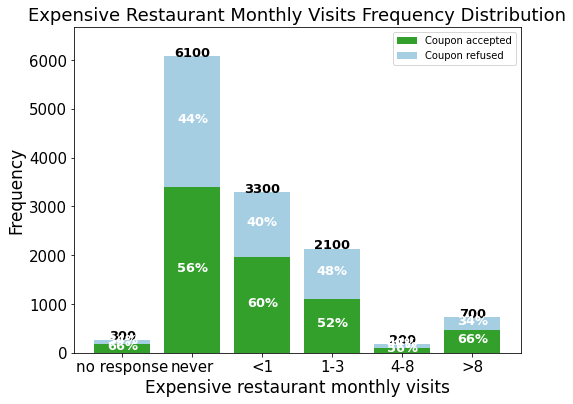

time: 236 ms (started: 2023-01-10 16:48:53 -08:00)


In [69]:
feature_column_name = 'Restaurant20To50_venue_visit_frequency_yes_response_ordinal_integer_encoding'
feature_column_name_label='Expensive Restaurant Monthly Visits'
xlabel='Expensive restaurant monthly visits'
ylabel='Frequency'

xtick_rotation=0
bar_orientation = 'vertical'
annotation_type = 'percentage'
annotation_text_size = 13
frequency_annotation_round_by_number=-2

dpi=100
figure_filename = '../reports/figures/figure_'+ str(feature_column_name) +'_frequency_distribution_'+ str(bar_orientation) + '_stacked_bar_coupon_accepted_coupon_refused_'+ str(annotation_type) + '_annotation_all_data_dpi_' + str(dpi) + '_v' + filename_version + '.png'

feature_value_order_list = [0, 1, 2, 3, 4, 5]
xtick_dictionary = {1: 'never', 2: '<1', 3: '1-3', 4: '4-8', 5: '>8', 0: 'no response'}

title= str(feature_column_name_label) + ' Frequency Distribution'

color_index_list=[3,0]
colors = [color_list[color_index_list[0]], color_list[color_index_list[1]]]

y_upper_limit=None

figsize=(8,6)

rectangle_annotation_y_offset=-20


#get column name, coupon accepted (frequency), coupon refused (frequency)
df_income_coupon_accepted_coupon_refused = icr.get_feature_target_frequency_data_frame(df, feature_column_name=feature_column_name, append_percentage_true_false=True)

#sort by value order list
df_income_coupon_accepted_coupon_refused = icr.sort_data_frame(df=df_income_coupon_accepted_coupon_refused, feature_column_name=feature_column_name, feature_value_order_list=feature_value_order_list, ascending_true_false=True).drop(columns=[str(feature_column_name)+'_rank'])

#index feature column
df_index_income_coupon_refused_coupon_accepted = df_income_coupon_accepted_coupon_refused.set_index(feature_column_name)

icr.plot_vertical_stacked_bar_graph(df=df_index_income_coupon_refused_coupon_accepted, feature_column_name=feature_column_name, feature_column_name_label=feature_column_name_label, ylabel=ylabel, xlabel=xlabel, figure_filename=figure_filename, annotation_text_size=annotation_text_size, dpi=dpi, xtick_dictionary=xtick_dictionary, colors=colors, annotation_type=annotation_type, frequency_annotation_round_by_number=frequency_annotation_round_by_number, y_upper_limit=y_upper_limit, rectangle_annotation_y_offset=rectangle_annotation_y_offset, figsize=figsize, xtick_rotation=xtick_rotation)



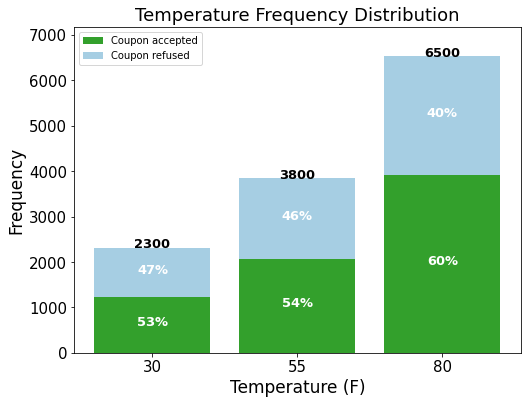

time: 229 ms (started: 2023-01-10 16:48:54 -08:00)


In [70]:
feature_column_name = 'temperature_ordinal_integer_encoding'
feature_column_name_label='Temperature'
xlabel='Temperature (F)'
ylabel='Frequency'

xtick_rotation=0
bar_orientation = 'vertical'
annotation_type = 'percentage'
annotation_text_size = 13
frequency_annotation_round_by_number=-2

dpi=100
figure_filename = '../reports/figures/figure_'+ str(feature_column_name) +'_frequency_distribution_'+ str(bar_orientation) + '_stacked_bar_coupon_accepted_coupon_refused_'+ str(annotation_type) + '_annotation_all_data_dpi_' + str(dpi) + '_v' + filename_version + '.png'

feature_value_order_list = [1, 2, 3,]
xtick_dictionary = {1: 30, 2: 55, 3: 80,}


title= str(feature_column_name_label) + ' Frequency Distribution'

color_index_list=[3,0]
colors = [color_list[color_index_list[0]], color_list[color_index_list[1]]]

y_upper_limit=None

figsize=(8,6)

rectangle_annotation_y_offset=-20


#get column name, coupon accepted (frequency), coupon refused (frequency)
df_income_coupon_accepted_coupon_refused = icr.get_feature_target_frequency_data_frame(df, feature_column_name=feature_column_name, append_percentage_true_false=True)

#sort by value order list
df_income_coupon_accepted_coupon_refused = icr.sort_data_frame(df=df_income_coupon_accepted_coupon_refused, feature_column_name=feature_column_name, feature_value_order_list=feature_value_order_list, ascending_true_false=True).drop(columns=[str(feature_column_name)+'_rank'])

#index feature column
df_index_income_coupon_refused_coupon_accepted = df_income_coupon_accepted_coupon_refused.set_index(feature_column_name)

icr.plot_vertical_stacked_bar_graph(df=df_index_income_coupon_refused_coupon_accepted, feature_column_name=feature_column_name, feature_column_name_label=feature_column_name_label, ylabel=ylabel, xlabel=xlabel, figure_filename=figure_filename, annotation_text_size=annotation_text_size, dpi=dpi, xtick_dictionary=xtick_dictionary, colors=colors, annotation_type=annotation_type, frequency_annotation_round_by_number=frequency_annotation_round_by_number, y_upper_limit=y_upper_limit, rectangle_annotation_y_offset=rectangle_annotation_y_offset, figsize=figsize, xtick_rotation=xtick_rotation)



#### Venue Monthly Visits Frequency Distribution

In [71]:
column_name_list = ['Bar_venue_visit_frequency_yes_response_ordinal_integer_encoding', 'CoffeeHouse_venue_visit_frequency_yes_response_ordinal_integer_encoding', 'CarryAway_venue_visit_frequency_yes_response_ordinal_integer_encoding', 'RestaurantLessThan20_venue_visit_frequency_yes_response_ordinal_integer_encoding', 'Restaurant20To50_venue_visit_frequency_yes_response_ordinal_integer_encoding',]

df_bar_coffee_house_takeout_low_cost_restaurant_expensive_restaurant_monthly_visits_frequency = df.loc[:, column_name_list].apply(pd.Series.value_counts).reset_index().rename(columns={'index':'feature_value'})
df_bar_coffee_house_takeout_low_cost_restaurant_expensive_restaurant_monthly_visits_frequency


feature_value  \
0              0   
1              1   
2              2   
3              3   
4              4   
5              5   

   Bar_venue_visit_frequency_yes_response_ordinal_integer_encoding  \
0                                                              349   
1                                                             3482   
2                                                             2473   
3                                                             5197   
4                                                              107   
5                                                             1076   

   CoffeeHouse_venue_visit_frequency_yes_response_ordinal_integer_encoding  \
0                                                                     1111   
1                                                                     3385   
2                                                                     3225   
3                                                                     2962   
4                                                                      217   
5                                                                     1784   

   CarryAway_venue_visit_frequency_yes_response_ordinal_integer_encoding  \
0                                                                   1594   
1                                                                   1856   
2                                                                   4672   
3                                                                    153   
4                                                                    151   
5                                                                   4258   

   RestaurantLessThan20_venue_visit_frequency_yes_response_ordinal_integer_encoding  \
0                                                                              1285   
1                                                                              2093   
2                                                                              5376   
3                                                                               220   
4                                                                               130   
5                                                                              3580   

   Restaurant20To50_venue_visit_frequency_yes_response_ordinal_integer_encoding  
0                                                                           264  
1                                                                          6077  
2                                                                          3290  
3                                                                          2136  
4                                                                           189  
5                                                                           728

time: 12 ms (started: 2023-01-10 16:48:54 -08:00)


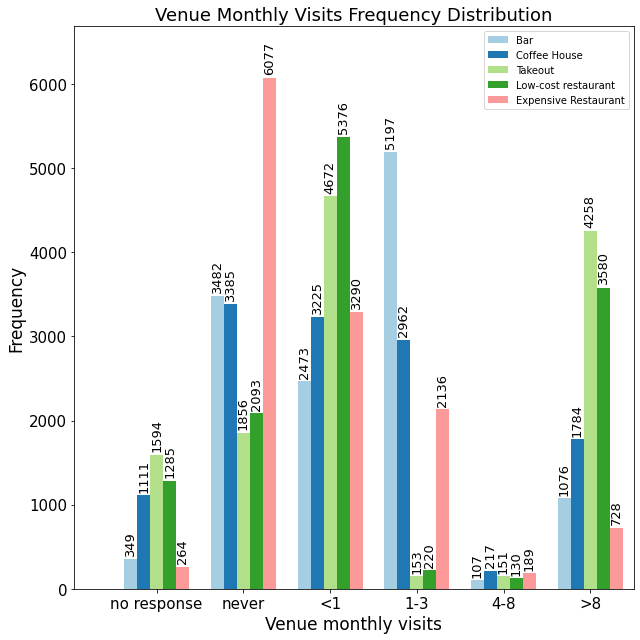

time: 457 ms (started: 2023-01-10 16:48:54 -08:00)


In [72]:
name1='venue_monthly_visits'
bar_orientation = 'vertical'

dpi=100
figure_filename = '../reports/figures/figure_'+ str(name1) +'_frequency_distribution_'+ str(bar_orientation) + 'multibar_plot_all_data_dpi_' + str(dpi) + '_v' + filename_version + '.png'

multibar_column_name_list=['Bar_venue_visit_frequency_yes_response_ordinal_integer_encoding', 'CoffeeHouse_venue_visit_frequency_yes_response_ordinal_integer_encoding', 'CarryAway_venue_visit_frequency_yes_response_ordinal_integer_encoding', 'RestaurantLessThan20_venue_visit_frequency_yes_response_ordinal_integer_encoding', 'Restaurant20To50_venue_visit_frequency_yes_response_ordinal_integer_encoding']

bar_label_list = ['Bar', 'Coffee House', 'Takeout', 'Low-cost restaurant', 'Expensive Restaurant']


xlabel_column_name='feature_value'
feature_value_order_list = [0, 1, 2, 3, 4, 5]

xlabel='Venue monthly visits'


title= ''.join([word.capitalize() + ' ' for word in xlabel.split(' ')]) + 'Frequency Distribution'

xtick_dictionary = {1: 'never', 2: '<1', 3: '1-3', 4: '4-8', 5: '>8', 0: 'no response'}

color_index_list=[0, 1, 2, 3, 4, 5]

xtick_rotation=0

x_upper_limit=None

figsize=(9,9)


if bar_orientation == 'vertical':
    
    icr.plot_vertical_multibar_bar_graph(df=df_bar_coffee_house_takeout_low_cost_restaurant_expensive_restaurant_monthly_visits_frequency, xlabel_column_name=xlabel_column_name, multibar_column_name_list=multibar_column_name_list, title=title, xlabel=xlabel,color_list=color_list, figsize=figsize, color_index_list=color_index_list, figure_filename=figure_filename, dpi=dpi, xtick_rotation=xtick_rotation, xtick_dictionary=xtick_dictionary, bar_label_list=bar_label_list)



In [73]:
color_list[0:6]

['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c']

time: 2.02 ms (started: 2023-01-10 16:48:54 -08:00)


### Initialize Plot Variables

In [74]:
title_fontsize=16
dpi=100
color_list = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6']
#color_list = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33','#a65628','#f781bf','#999999']
#color_list =  ['red', 'green', 'blue', 'skyblue', 'yellow', 'purple', 'orange', 'pink', 'yellowgreen']
circle_color='white'


time: 563 µs (started: 2023-01-10 16:48:54 -08:00)


### Income Donut Plot

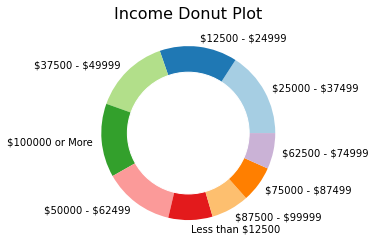

time: 130 ms (started: 2023-01-10 16:48:54 -08:00)


In [75]:
column_name='income'
title = 'Income Donut Plot'
figure_filename = '../reports/figures/figure_donut_plot_' + column_name + '_value_count_all_data_dpi_' + str(dpi) + '_v' + filename_version + '.png'

name_list = ['\$25000 - \$37499', '\$12500 - \$24999', '\$37500 - \$49999', '\$100000 or More', '\$50000 - \$62499', 'Less than \$12500', '\$87500 - \$99999', '\$75000 - \$87499', '\$62500 - \$74999']
size_list = [2013, 1831, 1805, 1736, 1659, 1042,  895,  857,  846]

icr.donut_plot(name_list, size_list, title=title, title_fontsize=title_fontsize, figure_filename=figure_filename, dpi=dpi, color_list=color_list, circle_color=circle_color)



### Age Donut Plot

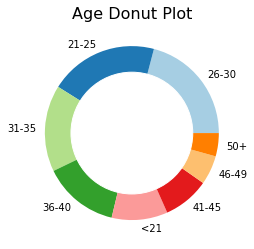

time: 98.3 ms (started: 2023-01-10 16:48:54 -08:00)


In [76]:
column_name = 'age'
title = 'Age Donut Plot'

figure_filename = '../reports/figures/figure_' + column_name +'_plot_income_value_count_all_data_dpi_' + str(dpi) + '_v' + filename_version + '.png'

name_list = ['26-30', '21-25', '31-35', '36-40', '<21', '41-45', '46-49', '50+']
size_list = [2653, 2559, 2039, 1788, 1319, 1093,  686,  547]

icr.donut_plot(name_list, size_list, title=title, title_fontsize=title_fontsize, figure_filename=figure_filename, dpi=dpi, color_list=color_list, circle_color=circle_color)



### Monthly Coffee House Visit Frequency

In [77]:
df.loc[:, 'CoffeeHouse_venue_visit_frequency_yes_response_ordinal_integer_encoding'].value_counts().values

array([3385, 3225, 2962, 1784, 1111,  217])

time: 2.4 ms (started: 2023-01-10 16:48:54 -08:00)


In [78]:
coffeehouse_venue_visit_frequency_yes_response_ordinal_integer_dencoding = {value : key for key, value in coffeehouse_venue_visit_frequency_yes_response_ordinal_integer_encoding['CoffeeHouse'].items()}
pdc(coffeehouse_venue_visit_frequency_yes_response_ordinal_integer_dencoding)

6


{1: 'never', 2: '<1', 3: '1-3', 4: '4-8', 5: '>8', 0: 'no response'}

time: 2.19 ms (started: 2023-01-10 16:48:55 -08:00)


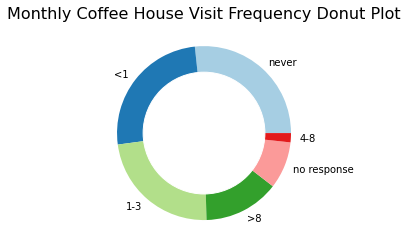

time: 94.7 ms (started: 2023-01-10 16:48:55 -08:00)


In [79]:
column_name='monthly_coffee_house_visit_frequency'
title = 'Monthly Coffee House Visit Frequency Donut Plot'
#title = 'Yes Response: Monthly Coffee House Visit Frequency Donut Plot'

figure_filename = '../reports/figures/figure_donut_plot_' + column_name + '_value_count_all_data_dpi_' + str(dpi) + '_v' + filename_version + '.png'

name_list = ['never', '<1', '1-3', '>8', 'no response', '4-8']
size_list = [3385, 3225, 2962, 1784, 1111,  217]

icr.donut_plot(name_list, size_list, title=title, title_fontsize=title_fontsize, figure_filename=figure_filename, dpi=dpi, color_list=color_list, circle_color=circle_color)



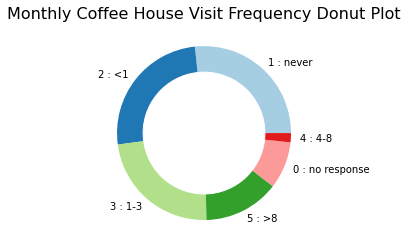

time: 99.9 ms (started: 2023-01-10 16:48:55 -08:00)


In [80]:
column_name='monthly_coffee_house_visit_frequency_encoding'
title = 'Monthly Coffee House Visit Frequency Donut Plot'
#title = 'Yes Response: Monthly Coffee House Visit Frequency Donut Plot'

figure_filename = '../reports/figures/figure_donut_plot_' + column_name + '_value_count_all_data_dpi_' + str(dpi) + '_v' + filename_version + '.png'

name_list = ['1 : never', '2 : <1', '3 : 1-3', '5 : >8', '0 : no response', '4 : 4-8']
size_list = [3385, 3225, 2962, 1784, 1111,  217]

icr.donut_plot(name_list, size_list, title=title, title_fontsize=title_fontsize, figure_filename=figure_filename, dpi=dpi, color_list=color_list, circle_color=circle_color)



/var/folders/77/y4hv4_s9751293nzv4yrfrtm0000gn/T/ipykernel_2521/1706874810.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


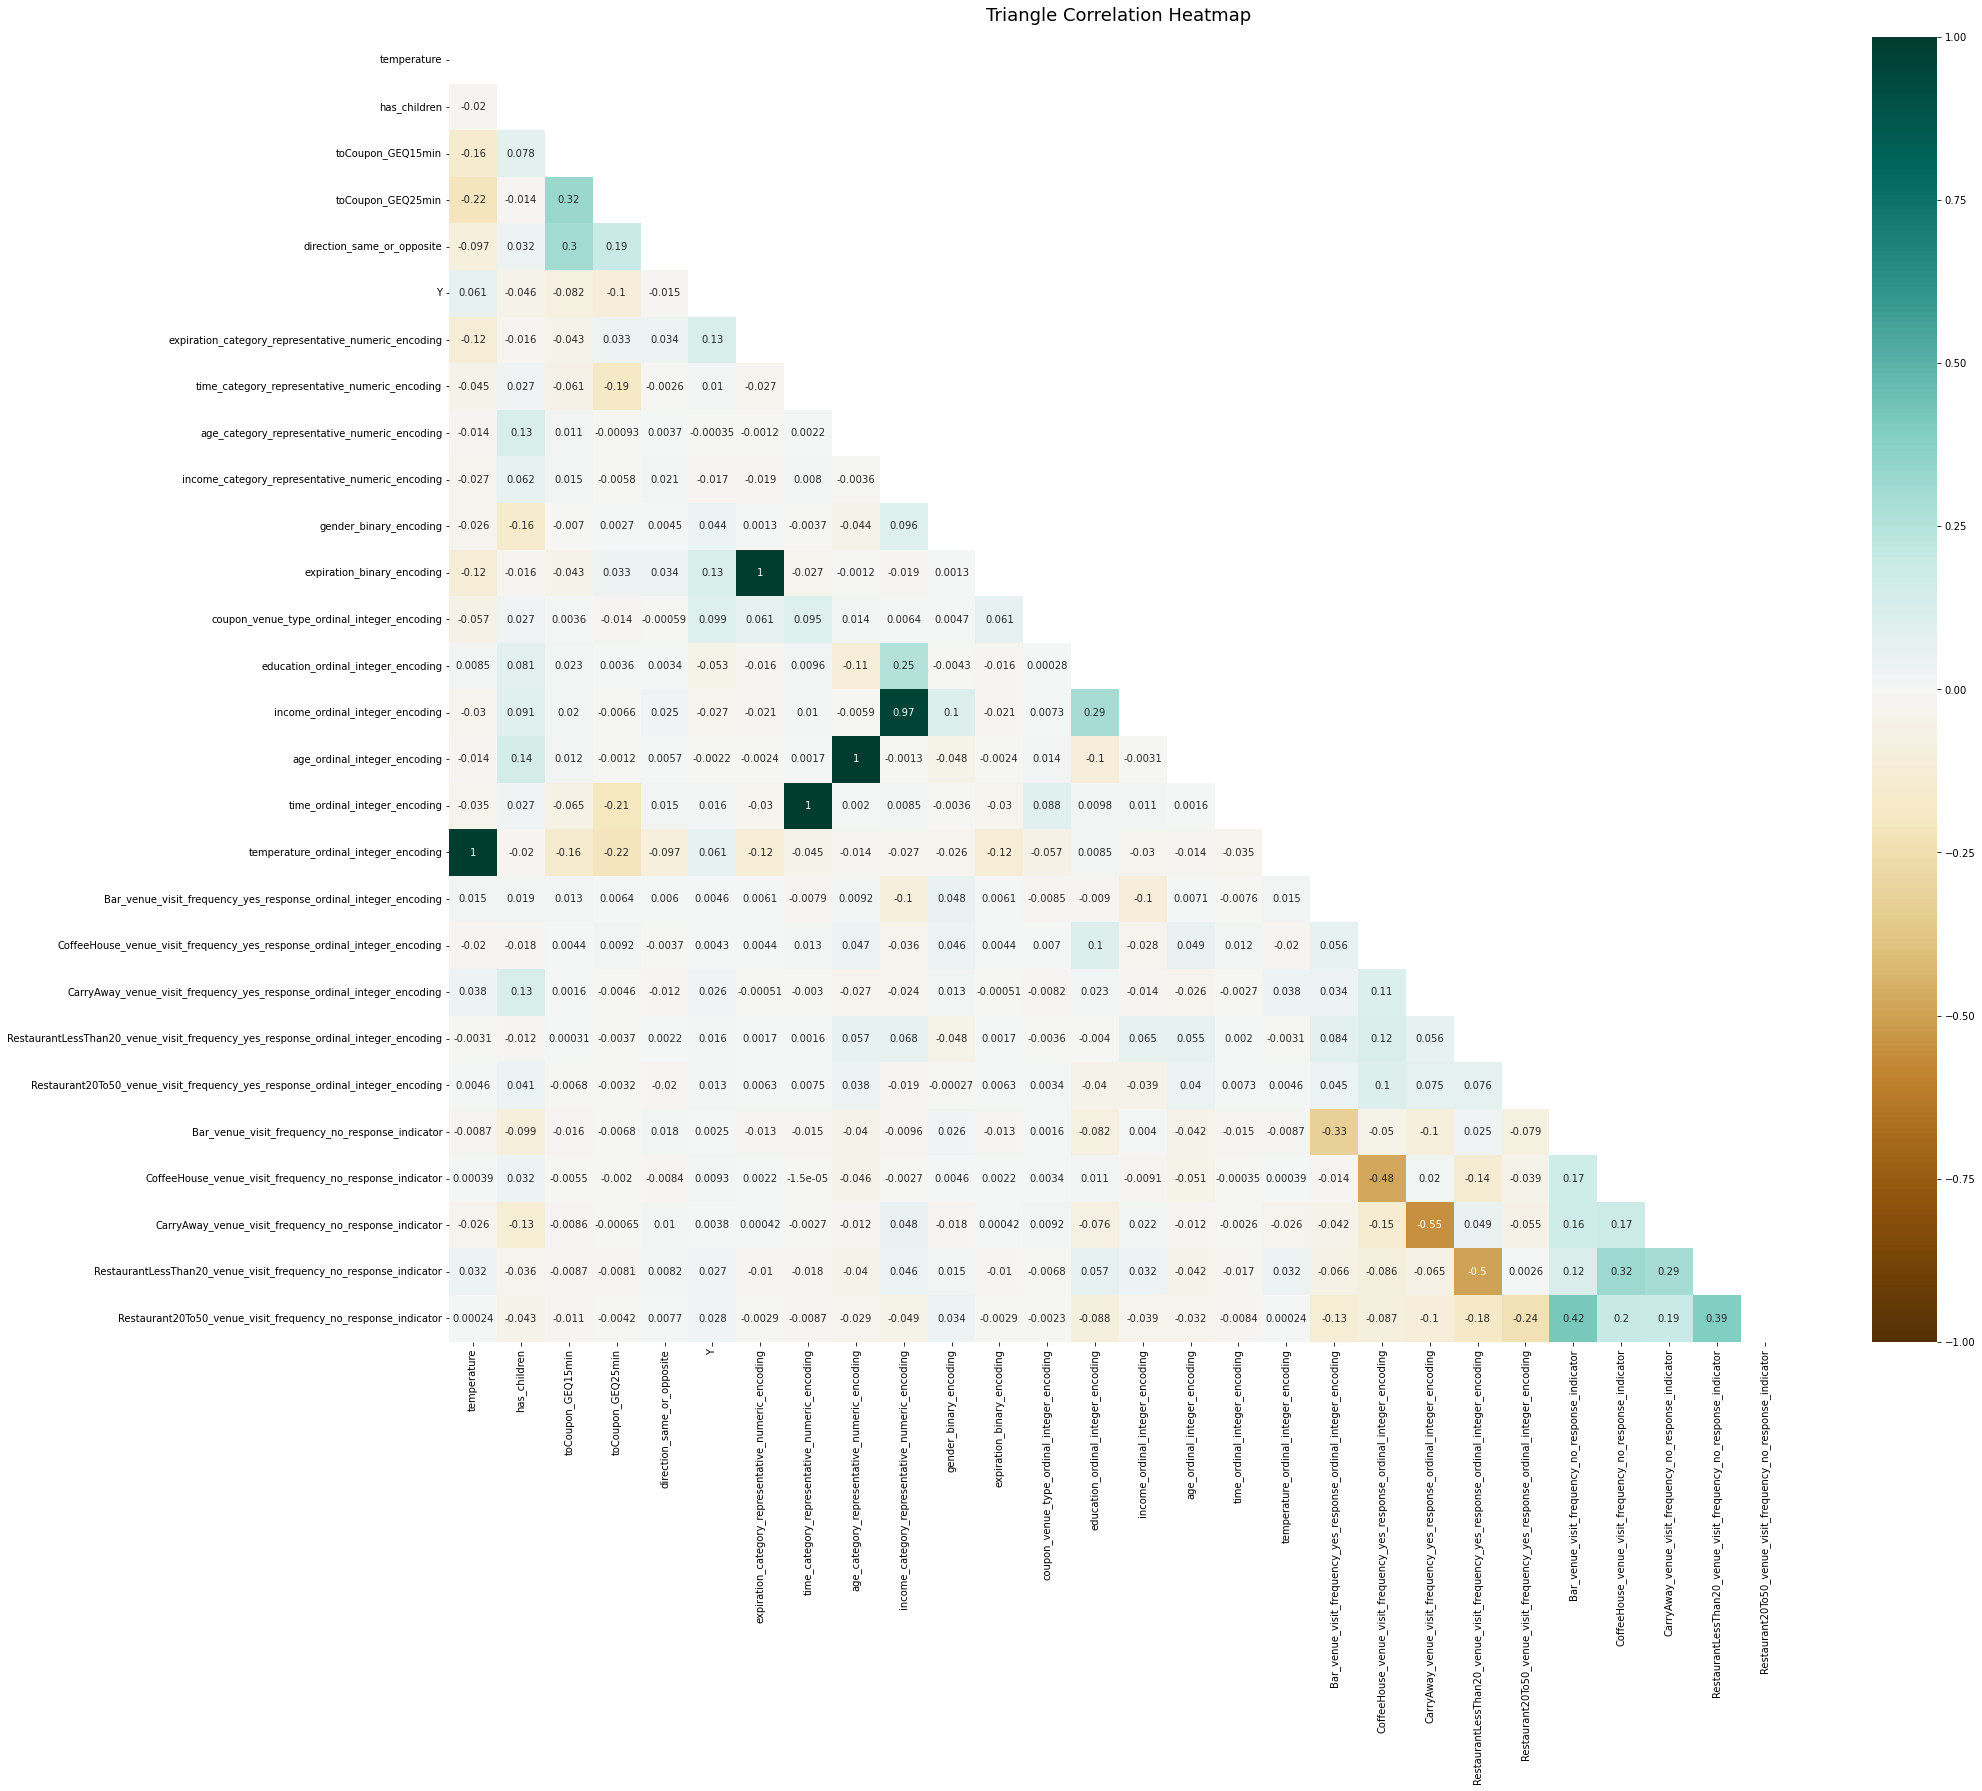

time: 2.5 s (started: 2023-01-10 16:48:55 -08:00)


In [81]:
#correlation heatmap
dpi=100
figure_filename = '../reports/figures/figure_triangle_correlation_heatmap_random_forest_classifier_numerics_dpi_' + str(dpi) + '_v' + filename_version + '.png'

figure_filename_exists = os.path.isfile(figure_filename)

if figure_filename_exists == True:
    img = mpimg.imread(figure_filename)
    plt.figure(figsize=(30, 24))
    plt.grid(False)
    plt.axis('off')
    plt.imshow(img)

else:
    plt.figure(figsize=(30, 24))
    mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
    heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
    heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

    plt.savefig(figure_filename, bbox_inches='tight', dpi=dpi)

plt.show()

In [82]:
#save preprocessed data frame
df_collection_filename='df_collection_train_test_v' + filename_version + '.pkl'


df_readback = icr.return_processed_collection_if_it_exists(filename=df_collection_filename)
if df_readback != None:
    df_collection = df_readback
else:
    df_collection = {}
    
    #split the data into train and test
    df_collection['X_train'], df_collection['X_test'], df_collection['Y_train'], df_collection['Y_test'] = \
    train_test_split(df.drop(columns=['Y']), df.loc[:, 'Y'], test_size=.2, random_state=200)
    
    #save preprocessed data frame collection
    df_collection = icr.save_and_return_collection(data_frame_collection=df_collection, filename=df_collection_filename)

p(df_collection['X_train'])

This file already exists
(10147, 45)


destination  passenger weather  temperature  time  \
8630   No Urgent Place  Friend(s)   Sunny           80   6PM   
2418   No Urgent Place  Friend(s)   Sunny           55   2PM   
10804  No Urgent Place      Alone   Rainy           55   2PM   
747    No Urgent Place  Friend(s)   Sunny           80   2PM   
7333   No Urgent Place  Friend(s)   Sunny           80   6PM   
10949  No Urgent Place     Kid(s)   Snowy           30   6PM   
11937  No Urgent Place      Alone   Rainy           55  10AM   
735               Home      Alone   Sunny           55   6PM   
67     No Urgent Place  Friend(s)   Sunny           80  10AM   
3251   No Urgent Place  Friend(s)   Sunny           80  10AM   

           coupon_venue_type expiration  gender    age      maritalStatus  \
8630            Coffee House         1d  Female  21-25    Married partner   
2418            Coffee House         2h  Female  26-30             Single   
10804  Carry out & Take away         2h  Female  31-35             Single   
747             Coffee House         1d  Female  36-40    Married partner   
7333            Coffee House         1d    Male    <21  Unmarried partner   
10949                    Bar         1d  Female  31-35    Married partner   
11937                    Bar         1d  Female  31-35    Married partner   
735        Restaurant(20-50)         1d    Male  41-45             Single   
67              Coffee House         2h    Male  46-49    Married partner   
3251            Coffee House         2h  Female  26-30    Married partner   

       has_children                               education  \
8630              0                        Bachelors degree   
2418              0                        Bachelors degree   
10804             0  Graduate degree (Masters or Doctorate)   
747               0                Some college - no degree   
7333              1                Some college - no degree   
10949             1                        Bachelors degree   
11937             0                Some college - no degree   
735               0                Some college - no degree   
67                1                        Bachelors degree   
3251              1                Some college - no degree   

                                      occupation             income  \
8630                                  Unemployed  \$87500 - \$99999   
2418    Arts Design Entertainment Sports & Media  \$12500 - \$24999   
10804                                      Legal  \$75000 - \$87499   
747                           Healthcare Support  \$25000 - \$37499   
7333   Building & Grounds Cleaning & Maintenance  \$25000 - \$37499   
10949                                    Student  \$37500 - \$49999   
11937                    Computer & Mathematical   \$100000 or More   
735                              Sales & Related  \$37500 - \$49999   
67                    Education&Training&Library  \$75000 - \$87499   
3251                                  Unemployed  \$25000 - \$37499   

               car          Bar CoffeeHouse    CarryAway RestaurantLessThan20  \
8630   no response           <1       never          4-8                never   
2418   no response           >8          >8           >8                   >8   
10804  no response  no response          >8           >8                   >8   
747    no response           <1          <1           >8                   >8   
7333   no response           <1       never           <1                   <1   
10949  no response          1-3       never  no response                   >8   
11937  no response        never       never  no response                   >8   
735    no response          1-3         1-3           >8                   <1   
67     no response        never          <1           <1                   <1   
3251   no response          1-3       never           <1                never   

      Restaurant20To50  toCoupon_GEQ15min  toCoupon_GEQ25min  \
8630             never    

time: 23.2 ms (started: 2023-01-10 16:48:57 -08:00)


## Get Stratified Train Data Frame Collection Before Data Preprocesssing

In [83]:
StratifiedKFold_5_splits = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

stratified_fold_number_X_train_X_test_Y_train_Y_test_df_collection = {}


for index, (train_index, test_index) in enumerate(StratifiedKFold_5_splits.split(X=df_collection['X_train'], y=df_collection['Y_train'].to_frame())):
    print('fold ' + str(index) + " TRAIN:", train_index, "TEST:", test_index)
    stratified_fold_number_X_train_X_test_Y_train_Y_test_df_collection['fold ' + str(index)] = \
    {'X_train' : df_collection['X_train'].iloc[train_index, :], \
     'X_test' : df_collection['X_train'].iloc[test_index, :], \
     'Y_train' : df_collection['Y_train'].iloc[train_index], \
     'Y_test' : df_collection['Y_train'].iloc[test_index]}

#use .loc for selection by index label, .iloc for selection by index location

print()
p(stratified_fold_number_X_train_X_test_Y_train_Y_test_df_collection['fold 0']['X_test'])



fold 0 TRAIN: [ 2028  2030  2031 ... 10144 10145 10146] TEST: [   0    1    2 ... 2027 2029 2032]
fold 1 TRAIN: [    0     1     2 ... 10144 10145 10146] TEST: [2028 2030 2031 ... 4095 4101 4102]
fold 2 TRAIN: [    0     1     2 ... 10144 10145 10146] TEST: [4009 4010 4012 ... 6131 6133 6135]
fold 3 TRAIN: [    0     1     2 ... 10144 10145 10146] TEST: [6036 6037 6043 ... 8126 8127 8128]
fold 4 TRAIN: [   0    1    2 ... 8126 8127 8128] TEST: [ 8099  8105  8109 ... 10144 10145 10146]

(2030, 45)


destination  passenger weather  temperature  time  \
8630   No Urgent Place  Friend(s)   Sunny           80   6PM   
2418   No Urgent Place  Friend(s)   Sunny           55   2PM   
10804  No Urgent Place      Alone   Rainy           55   2PM   
747    No Urgent Place  Friend(s)   Sunny           80   2PM   
7333   No Urgent Place  Friend(s)   Sunny           80   6PM   
1460   No Urgent Place  Friend(s)   Sunny           80   2PM   
8449              Work      Alone   Snowy           30   7AM   
11224             Home      Alone   Rainy           55  10PM   
5085   No Urgent Place  Friend(s)   Sunny           80   2PM   
7156   No Urgent Place  Friend(s)   Sunny           80   2PM   

           coupon_venue_type expiration  gender    age      maritalStatus  \
8630            Coffee House         1d  Female  21-25    Married partner   
2418            Coffee House         2h  Female  26-30             Single   
10804  Carry out & Take away         2h  Female  31-35             Single   
747             Coffee House         1d  Female  36-40    Married partner   
7333            Coffee House         1d    Male    <21  Unmarried partner   
1460            Coffee House         2h    Male  46-49    Married partner   
8449       Restaurant(20-50)         1d    Male  41-45    Married partner   
11224           Coffee House         2h    Male    50+  Unmarried partner   
5085         Restaurant(<20)         2h    Male  26-30             Single   
7156       Restaurant(20-50)         2h    Male  31-35    Married partner   

       has_children                               education  \
8630              0                        Bachelors degree   
2418              0                        Bachelors degree   
10804             0  Graduate degree (Masters or Doctorate)   
747               0                Some college - no degree   
7333              1                Some college - no degree   
1460              1  Graduate degree (Masters or Doctorate)   
8449              1                       Associates degree   
11224             0                Some college - no degree   
5085              0                    High School Graduate   
7156              1                Some college - no degree   

                                      occupation             income  \
8630                                  Unemployed  \$87500 - \$99999   
2418    Arts Design Entertainment Sports & Media  \$12500 - \$24999   
10804                                      Legal  \$75000 - \$87499   
747                           Healthcare Support  \$25000 - \$37499   
7333   Building & Grounds Cleaning & Maintenance  \$25000 - \$37499   
1460                                  Management  \$87500 - \$99999   
8449                  Farming Fishing & Forestry  \$25000 - \$37499   
11224                                    Student  \$25000 - \$37499   
5085                                  Unemployed  \$25000 - \$37499   
7156                   Construction & Extraction  \$37500 - \$49999   

               car          Bar CoffeeHouse CarryAway RestaurantLessThan20  \
8630   no response           <1       never       4-8                never   
2418   no response           >8          >8        >8                   >8   
10804  no response  no response          >8        >8                   >8   
747    no response           <1          <1        >8                   >8   
7333   no response           <1       never        <1                   <1   
1460   no response        never          <1        <1                never   
8449   no response          1-3         1-3       1-3                   <1   
11224  no response          1-3         1-3        <1                never   
5085   no response        never          <1        >8                   <1   
7156   no response          1-3         1-3        >8                   >8   

      Restaurant20To50  toCoupon_GEQ15min  toCoupon_GEQ25min  \
8630             never                  0                  

time: 31 ms (started: 2023-01-10 16:48:57 -08:00)


In [84]:
data_frame_list = [stratified_fold_number_X_train_X_test_Y_train_Y_test_df_collection['fold ' + str(index)]['X_test'] for index in range(5)]

df_stratified_fold_number_X_test = pd.concat(data_frame_list)

p(df_stratified_fold_number_X_test)

(10147, 45)


destination  passenger weather  temperature  time  \
8630   No Urgent Place  Friend(s)   Sunny           80   6PM   
2418   No Urgent Place  Friend(s)   Sunny           55   2PM   
10804  No Urgent Place      Alone   Rainy           55   2PM   
747    No Urgent Place  Friend(s)   Sunny           80   2PM   
7333   No Urgent Place  Friend(s)   Sunny           80   6PM   
10949  No Urgent Place     Kid(s)   Snowy           30   6PM   
11937  No Urgent Place      Alone   Rainy           55  10AM   
735               Home      Alone   Sunny           55   6PM   
67     No Urgent Place  Friend(s)   Sunny           80  10AM   
3251   No Urgent Place  Friend(s)   Sunny           80  10AM   

           coupon_venue_type expiration  gender    age      maritalStatus  \
8630            Coffee House         1d  Female  21-25    Married partner   
2418            Coffee House         2h  Female  26-30             Single   
10804  Carry out & Take away         2h  Female  31-35             Single   
747             Coffee House         1d  Female  36-40    Married partner   
7333            Coffee House         1d    Male    <21  Unmarried partner   
10949                    Bar         1d  Female  31-35    Married partner   
11937                    Bar         1d  Female  31-35    Married partner   
735        Restaurant(20-50)         1d    Male  41-45             Single   
67              Coffee House         2h    Male  46-49    Married partner   
3251            Coffee House         2h  Female  26-30    Married partner   

       has_children                               education  \
8630              0                        Bachelors degree   
2418              0                        Bachelors degree   
10804             0  Graduate degree (Masters or Doctorate)   
747               0                Some college - no degree   
7333              1                Some college - no degree   
10949             1                        Bachelors degree   
11937             0                Some college - no degree   
735               0                Some college - no degree   
67                1                        Bachelors degree   
3251              1                Some college - no degree   

                                      occupation             income  \
8630                                  Unemployed  \$87500 - \$99999   
2418    Arts Design Entertainment Sports & Media  \$12500 - \$24999   
10804                                      Legal  \$75000 - \$87499   
747                           Healthcare Support  \$25000 - \$37499   
7333   Building & Grounds Cleaning & Maintenance  \$25000 - \$37499   
10949                                    Student  \$37500 - \$49999   
11937                    Computer & Mathematical   \$100000 or More   
735                              Sales & Related  \$37500 - \$49999   
67                    Education&Training&Library  \$75000 - \$87499   
3251                                  Unemployed  \$25000 - \$37499   

               car          Bar CoffeeHouse    CarryAway RestaurantLessThan20  \
8630   no response           <1       never          4-8                never   
2418   no response           >8          >8           >8                   >8   
10804  no response  no response          >8           >8                   >8   
747    no response           <1          <1           >8                   >8   
7333   no response           <1       never           <1                   <1   
10949  no response          1-3       never  no response                   >8   
11937  no response        never       never  no response                   >8   
735    no response          1-3         1-3           >8                   <1   
67     no response        never          <1           <1                   <1   
3251   no response          1-3       never           <1                never   

      Restaurant20To50  toCoupon_GEQ15min  toCoupon_GEQ25min  \
8630             never    

time: 19.6 ms (started: 2023-01-10 16:48:57 -08:00)


<font size="5"><a id='[Data_Preprocessing]'></a> </font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font> <font size="2">[Modeling_1](#[Modeling_1])</font> <font size="2">[Modeling_2](#[Modeling_2])</font> <font size="2">[Modeling_Train_Results](#[Modeling_Train_Results])</font> <font size="2">[Modeling_Test_Results](#[Modeling_Test_Results])</font>

<font size="6"><a id='[Data_Preprocessing]'>**Data Preprocessing**</a> </font>

## Convert Indicator Variables from Categorical Variables and Add Back to Numeric Variables

In [85]:
#get column name lists
column_name_list_numeric = list(df.select_dtypes('number').columns)
column_name_list_not_numeric = [column_name for column_name in df.columns if not column_name in column_name_list_numeric]

#get categorical features, numeric features, and target data frame
df_categorical_features = df.loc[:, column_name_list_not_numeric]
df_numeric_features = df.loc[:, column_name_list_numeric].drop(columns='Y')
df_target = df.loc[:, ['Y']]

#get category indicators data frame from df_categorical_features
df_category_indicator_features = pd.get_dummies(df_categorical_features)

del df_categorical_features

#combine category indicator features and numeric features
df_indicator_numeric_features = pd.concat([df_category_indicator_features, df_numeric_features], axis=1)

del df_numeric_features, 

p(df_indicator_numeric_features)


(12684, 140)


destination_Home  destination_No Urgent Place  destination_Work  \
11199                 1                            0                 0   
1474                  0                            0                 1   
10836                 1                            0                 0   
4567                  0                            1                 0   
5658                  0                            1                 0   
11343                 0                            0                 1   
9036                  1                            0                 0   
11050                 1                            0                 0   
784                   0                            0                 1   
1818                  0                            1                 0   

       passenger_Alone  passenger_Friend(s)  passenger_Kid(s)  \
11199                1                    0                 0   
1474                 1                    0                 0   
10836                1                    0                 0   
4567                 1                    0                 0   
5658                 1                    0                 0   
11343                1                    0                 0   
9036                 1                    0                 0   
11050                1                    0                 0   
784                  1                    0                 0   
1818                 0                    0                 1   

       passenger_Partner  weather_Rainy  weather_Snowy  weather_Sunny  \
11199                  0              0              0              1   
1474                   0              0              0              1   
10836                  0              0              0              1   
4567                   0              0              0              1   
5658                   0              0              0              1   
11343                  0              0              0              1   
9036                   0              0              1              0   
11050                  0              0              0              1   
784                    0              0              0              1   
1818                   0              0              0              1   

       time_10AM  time_10PM  time_2PM  time_6PM  time_7AM  \
11199          0          0         0         1         0   
1474           0          0         0         0         1   
10836          0          0         0         1         0   
4567           1          0         0         0         0   
5658           0          0         1         0         0   
11343          0          0         0         0         1   
9036           0          1         0         0         0   
11050          0          0         0         1         0   
784            0          0         0         0         1   
1818           1          0         0         0         0   

       coupon_venue_type_Bar  coupon_venue_type_Carry out & Take away  \
11199                      0                                        1   
1474                       1                                        0   
10836                      0                                        1   
4567                       1                                        0   
5658                       0                                        0   
11343                      0                                        0   
9036                       0                                        0   
11050                      0                                        0   
784                        0                                        1   
1818                       1                                        0   

       coupon_venue_type_Coffee House  coupon_venue_type_Restaurant(20-50)  \
11199                               0                                    0   
1474                                0   

time: 64.7 ms (started: 2023-01-10 16:48:57 -08:00)


## Get Data Frame Collection With Train and Test Features

In [86]:
data_frame_collection_filename='data_frame_collection_train_test_v' + filename_version + '.pkl'

df_readback = icr.return_processed_collection_if_it_exists(filename=data_frame_collection_filename, parse_dates=False)
if df_readback != None:
    data_frame_collection = df_readback
else:
    data_frame_collection = {}

    #split the data into train and test
    data_frame_collection['X_train'], data_frame_collection['X_test'], data_frame_collection['Y_train'], data_frame_collection['Y_test'] = \
    train_test_split(df_indicator_numeric_features, df_target, test_size=.2, random_state=200)

    del df_indicator_numeric_features

    #save preprocessed data frame collection
    data_frame_collection = icr.save_and_return_collection(data_frame_collection=data_frame_collection, filename=data_frame_collection_filename)

p(data_frame_collection['X_train'])


This file already exists
(10147, 140)


destination_Home  destination_No Urgent Place  destination_Work  \
8630                  0                            1                 0   
2418                  0                            1                 0   
10804                 0                            1                 0   
747                   0                            1                 0   
7333                  0                            1                 0   
10949                 0                            1                 0   
11937                 0                            1                 0   
735                   1                            0                 0   
67                    0                            1                 0   
3251                  0                            1                 0   

       passenger_Alone  passenger_Friend(s)  passenger_Kid(s)  \
8630                 0                    1                 0   
2418                 0                    1                 0   
10804                1                    0                 0   
747                  0                    1                 0   
7333                 0                    1                 0   
10949                0                    0                 1   
11937                1                    0                 0   
735                  1                    0                 0   
67                   0                    1                 0   
3251                 0                    1                 0   

       passenger_Partner  weather_Rainy  weather_Snowy  weather_Sunny  \
8630                   0              0              0              1   
2418                   0              0              0              1   
10804                  0              1              0              0   
747                    0              0              0              1   
7333                   0              0              0              1   
10949                  0              0              1              0   
11937                  0              1              0              0   
735                    0              0              0              1   
67                     0              0              0              1   
3251                   0              0              0              1   

       time_10AM  time_10PM  time_2PM  time_6PM  time_7AM  \
8630           0          0         0         1         0   
2418           0          0         1         0         0   
10804          0          0         1         0         0   
747            0          0         1         0         0   
7333           0          0         0         1         0   
10949          0          0         0         1         0   
11937          1          0         0         0         0   
735            0          0         0         1         0   
67             1          0         0         0         0   
3251           1          0         0         0         0   

       coupon_venue_type_Bar  coupon_venue_type_Carry out & Take away  \
8630                       0                                        0   
2418                       0                                        0   
10804                      0                                        1   
747                        0                                        0   
7333                       0                                        0   
10949                      1                                        0   
11937                      1                                        0   
735                        0                                        0   
67                         0                                        0   
3251                       0                                        0   

       coupon_venue_type_Coffee House  coupon_venue_type_Restaurant(20-50)  \
8630                                1                                    0   
2418                                1   

time: 37.7 ms (started: 2023-01-10 16:48:57 -08:00)


## Get Stratified 5-Fold Cross Validation X_train, X_test, Y_train, Y_test Collection

In [87]:
#stratified 5-fold cross validation train-test data row selection

#Stratified 5-Fold object
StratifiedKFold_5_splits = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

#get stratified 5-fold data frame splits
stratified_fold_number_X_train_X_test_Y_train_Y_test_collection = {}


for index, (train_index, test_index) in enumerate(StratifiedKFold_5_splits.split(data_frame_collection['X_train'], data_frame_collection['Y_train'].loc[:, 'Y'])):
    print('fold ' + str(index) + " TRAIN:", train_index, "TEST:", test_index)
    stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(index)] = \
    {'X_train' : data_frame_collection['X_train'].iloc[train_index, :], \
     'X_test' : data_frame_collection['X_train'].iloc[test_index, :], \
     'Y_train' : data_frame_collection['Y_train'].loc[:, 'Y'].iloc[train_index], \
     'Y_test' : data_frame_collection['Y_train'].loc[:, 'Y'].iloc[test_index]}

#use .loc for selection by index label, .iloc for selection by index location

print()
p(stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold 0']['X_train'])

fold 0 TRAIN: [ 2028  2030  2031 ... 10144 10145 10146] TEST: [   0    1    2 ... 2027 2029 2032]
fold 1 TRAIN: [    0     1     2 ... 10144 10145 10146] TEST: [2028 2030 2031 ... 4095 4101 4102]
fold 2 TRAIN: [    0     1     2 ... 10144 10145 10146] TEST: [4009 4010 4012 ... 6131 6133 6135]
fold 3 TRAIN: [    0     1     2 ... 10144 10145 10146] TEST: [6036 6037 6043 ... 8126 8127 8128]
fold 4 TRAIN: [   0    1    2 ... 8126 8127 8128] TEST: [ 8099  8105  8109 ... 10144 10145 10146]

(8117, 140)


destination_Home  destination_No Urgent Place  destination_Work  \
11981                 0                            1                 0   
3996                  0                            0                 1   
1301                  0                            0                 1   
9720                  1                            0                 0   
752                   0                            1                 0   
10949                 0                            1                 0   
11937                 0                            1                 0   
735                   1                            0                 0   
67                    0                            1                 0   
3251                  0                            1                 0   

       passenger_Alone  passenger_Friend(s)  passenger_Kid(s)  \
11981                0                    1                 0   
3996                 1                    0                 0   
1301                 1                    0                 0   
9720                 1                    0                 0   
752                  0                    0                 0   
10949                0                    0                 1   
11937                1                    0                 0   
735                  1                    0                 0   
67                   0                    1                 0   
3251                 0                    1                 0   

       passenger_Partner  weather_Rainy  weather_Snowy  weather_Sunny  \
11981                  0              0              0              1   
3996                   0              0              0              1   
1301                   0              0              0              1   
9720                   0              1              0              0   
752                    1              0              0              1   
10949                  0              0              1              0   
11937                  0              1              0              0   
735                    0              0              0              1   
67                     0              0              0              1   
3251                   0              0              0              1   

       time_10AM  time_10PM  time_2PM  time_6PM  time_7AM  \
11981          1          0         0         0         0   
3996           0          0         0         0         1   
1301           0          0         0         0         1   
9720           0          0         0         1         0   
752            1          0         0         0         0   
10949          0          0         0         1         0   
11937          1          0         0         0         0   
735            0          0         0         1         0   
67             1          0         0         0         0   
3251           1          0         0         0         0   

       coupon_venue_type_Bar  coupon_venue_type_Carry out & Take away  \
11981                      0                                        1   
3996                       0                                        0   
1301                       0                                        0   
9720                       1                                        0   
752                        1                                        0   
10949                      1                                        0   
11937                      1                                        0   
735                        0                                        0   
67                         0                                        0   
3251                       0                                        0   

       coupon_venue_type_Coffee House  coupon_venue_type_Restaurant(20-50)  \
11981                               0                                    0   
3996                                0   

time: 88 ms (started: 2023-01-10 16:48:57 -08:00)


In [88]:
#standardize and scale fold 0 thru 4 train and test sets

number_of_folds=5

for fold_number in range(number_of_folds):
    
    standard_scaler = StandardScaler()
    standardized_scaled_stratified_fold_number_X_train_ndarray=standard_scaler.fit_transform(stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(index)]['X_train'])
    

    stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(index)]['X_train'] = \
    pd.DataFrame(standardized_scaled_stratified_fold_number_X_train_ndarray, 
                 columns=stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(index)]['X_train'].columns, 
                 index=stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(index)]['X_train'].index)
    
    
    standardized_scaled_stratified_fold_number_X_test_ndarray=standard_scaler.transform(stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(index)]['X_test'])
    
    stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(index)]['X_test'] = \
    pd.DataFrame(standardized_scaled_stratified_fold_number_X_test_ndarray, 
                 columns=stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(index)]['X_test'].columns, 
                 index=stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(index)]['X_test'].index)

print()
p(stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold 0']['X_test'])




(2030, 140)


destination_Home  destination_No Urgent Place  destination_Work  \
8630                  0                            1                 0   
2418                  0                            1                 0   
10804                 0                            1                 0   
747                   0                            1                 0   
7333                  0                            1                 0   
1460                  0                            1                 0   
8449                  0                            0                 1   
11224                 1                            0                 0   
5085                  0                            1                 0   
7156                  0                            1                 0   

       passenger_Alone  passenger_Friend(s)  passenger_Kid(s)  \
8630                 0                    1                 0   
2418                 0                    1                 0   
10804                1                    0                 0   
747                  0                    1                 0   
7333                 0                    1                 0   
1460                 0                    1                 0   
8449                 1                    0                 0   
11224                1                    0                 0   
5085                 0                    1                 0   
7156                 0                    1                 0   

       passenger_Partner  weather_Rainy  weather_Snowy  weather_Sunny  \
8630                   0              0              0              1   
2418                   0              0              0              1   
10804                  0              1              0              0   
747                    0              0              0              1   
7333                   0              0              0              1   
1460                   0              0              0              1   
8449                   0              0              1              0   
11224                  0              1              0              0   
5085                   0              0              0              1   
7156                   0              0              0              1   

       time_10AM  time_10PM  time_2PM  time_6PM  time_7AM  \
8630           0          0         0         1         0   
2418           0          0         1         0         0   
10804          0          0         1         0         0   
747            0          0         1         0         0   
7333           0          0         0         1         0   
1460           0          0         1         0         0   
8449           0          0         0         0         1   
11224          0          1         0         0         0   
5085           0          0         1         0         0   
7156           0          0         1         0         0   

       coupon_venue_type_Bar  coupon_venue_type_Carry out & Take away  \
8630                       0                                        0   
2418                       0                                        0   
10804                      0                                        1   
747                        0                                        0   
7333                       0                                        0   
1460                       0                                        0   
8449                       0                                        0   
11224                      0                                        0   
5085                       0                                        0   
7156                       0                                        0   

       coupon_venue_type_Coffee House  coupon_venue_type_Restaurant(20-50)  \
8630                                1                                    0   
2418                                1   

time: 84.8 ms (started: 2023-01-10 16:48:57 -08:00)


## Standardize And Scale Features of Data Frame Collection

In [89]:
data_frame_collection_filename='data_frame_collection_train_test_standardize_scale_v' + filename_version + '.pkl'


df_readback = icr.return_processed_collection_if_it_exists(filename=data_frame_collection_filename, parse_dates=False)
if df_readback != None:
    data_frame_collection = df_readback
else:
    #standardize and scale feature data frame
    standard_scaler = StandardScaler()
    standardized_scaled_data_frame_collection_X_train_ndarray = standard_scaler.fit_transform(data_frame_collection['X_train'])
    data_frame_collection['X_train'] = pd.DataFrame(standardized_scaled_data_frame_collection_X_train_ndarray, columns=data_frame_collection['X_train'].columns, index=data_frame_collection['X_train'].index)


    standardized_scaled_df_collection_X_test_ndarray = standard_scaler.transform(data_frame_collection['X_test'])
    data_frame_collection['X_test'] = pd.DataFrame(standardized_scaled_df_collection_X_test_ndarray, columns=data_frame_collection['X_test'].columns, index=data_frame_collection['X_test'].index)

    data_frame_collection = icr.save_and_return_collection(data_frame_collection=data_frame_collection, filename=data_frame_collection_filename)

    del standardized_scaled_data_frame_collection_X_train_ndarray, standardized_scaled_df_collection_X_test_ndarray, standard_scaler

print(data_frame_collection['X_train'].shape, data_frame_collection['X_test'].shape, data_frame_collection['Y_train'].shape, data_frame_collection['Y_test'].shape)
p(data_frame_collection['X_train'])

This file already exists
(10147, 140) (2537, 140) (10147, 1) (2537, 1)
(10147, 140)


destination_Home  destination_No Urgent Place  destination_Work  \
8630          -0.587858                     1.003257         -0.569346   
2418          -0.587858                     1.003257         -0.569346   
10804         -0.587858                     1.003257         -0.569346   
747           -0.587858                     1.003257         -0.569346   
7333          -0.587858                     1.003257         -0.569346   
10949         -0.587858                     1.003257         -0.569346   
11937         -0.587858                     1.003257         -0.569346   
735            1.701090                    -0.996753         -0.569346   
67            -0.587858                     1.003257         -0.569346   
3251          -0.587858                     1.003257         -0.569346   

       passenger_Alone  passenger_Friend(s)  passenger_Kid(s)  \
8630         -1.154170             1.678978         -0.298862   
2418         -1.154170             1.678978         -0.298862   
10804         0.866424            -0.595600         -0.298862   
747          -1.154170             1.678978         -0.298862   
7333         -1.154170             1.678978         -0.298862   
10949        -1.154170            -0.595600          3.346030   
11937         0.866424            -0.595600         -0.298862   
735           0.866424            -0.595600         -0.298862   
67           -1.154170             1.678978         -0.298862   
3251         -1.154170             1.678978         -0.298862   

       passenger_Partner  weather_Rainy  weather_Snowy  weather_Sunny  \
8630           -0.304693      -0.327333      -0.350292       0.509468   
2418           -0.304693      -0.327333      -0.350292       0.509468   
10804          -0.304693       3.054995      -0.350292      -1.962830   
747            -0.304693      -0.327333      -0.350292       0.509468   
7333           -0.304693      -0.327333      -0.350292       0.509468   
10949          -0.304693      -0.327333       2.854765      -1.962830   
11937          -0.304693       3.054995      -0.350292      -1.962830   
735            -0.304693      -0.327333      -0.350292       0.509468   
67             -0.304693      -0.327333      -0.350292       0.509468   
3251           -0.304693      -0.327333      -0.350292       0.509468   

       time_10AM  time_10PM  time_2PM  time_6PM  time_7AM  \
8630   -0.468919  -0.436673 -0.434912  1.705934 -0.569346   
2418   -0.468919  -0.436673  2.299318 -0.586189 -0.569346   
10804  -0.468919  -0.436673  2.299318 -0.586189 -0.569346   
747    -0.468919  -0.436673  2.299318 -0.586189 -0.569346   
7333   -0.468919  -0.436673 -0.434912  1.705934 -0.569346   
10949  -0.468919  -0.436673 -0.434912  1.705934 -0.569346   
11937   2.132567  -0.436673 -0.434912 -0.586189 -0.569346   
735    -0.468919  -0.436673 -0.434912  1.705934 -0.569346   
67      2.132567  -0.436673 -0.434912 -0.586189 -0.569346   
3251    2.132567  -0.436673 -0.434912 -0.586189 -0.569346   

       coupon_venue_type_Bar  coupon_venue_type_Carry out & Take away  \
8630               -0.435552                                -0.480608   
2418               -0.435552                                -0.480608   
10804              -0.435552                                 2.080699   
747                -0.435552                                -0.480608   
7333               -0.435552                                -0.480608   
10949               2.295936                                -0.480608   
11937               2.295936                                -0.480608   
735                -0.435552                                -0.480608   
67                 -0.435552                                -0.480608   
3251               -0.435552                                -0.480608   

       coupon_venue_type_Coffee House  coupon_venue_type_Restaurant(20-50)  \
8630                         1.478469                            -0.364148   
2418                         1.478469   

time: 80.1 ms (started: 2023-01-10 16:48:58 -08:00)


## Covert to Y Train Data Frame from Y Test Data Frame Collection

In [90]:
#convert to y_actual data frame from y_actual data frame collection
data_frame_list_stratified_fold_number_Y_test = [stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(fold_number)]['Y_test'] for fold_number in range(5)]

df_stratified_fold_number_y_test = pd.concat(data_frame_list_stratified_fold_number_Y_test, axis=0, join='outer', ignore_index=False, copy=True).to_frame()
p(df_stratified_fold_number_y_test)

(10147, 1)


Y
8630   1
2418   1
10804  0
747    1
7333   1
10949  0
11937  0
735    1
67     1
3251   1

time: 5.35 ms (started: 2023-01-10 16:48:58 -08:00)


<font size="5"><a id='[Modeling]'></a> </font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font> <font size="2">[Modeling_1](#[Modeling_1])</font> <font size="2">[Modeling_2](#[Modeling_2])</font> <font size="2">[Modeling_3](#[Modeling_3])</font> <font size="2">[Results](#[Results])</font>

<font size="6"><a id='[Modeling]'>**Modeling**</a> </font>

## Initialize Filename & Results Collection Variables

In [91]:
classifier_name_list = ['random_forest_classifier', 'gradient_boosting_classifier']

#filename
grid_search_models_filename_collection={}
grid_search_models_local_optimum_filename_collection={}

model_filename_collection = {}
model_cross_validation_results_filename_collection = {}

cross_validation_model_collection_filename_collection = {}
model_cross_validation_prediction_probability_collection_filename_collection = {}
model_cross_validation_prediction_collection_filename_collection = {}

learning_curve_results_filename_collection = {}

for classifier_name in classifier_name_list:
    grid_search_models_filename_collection[classifier_name]='stratified_5_fold_grid_search_cross_validation_' + classifier_name + '_v' + filename_version + '.pkl'
    grid_search_models_local_optimum_filename_collection[classifier_name]='stratified_5_fold_grid_search_cross_validation_' + classifier_name + '_local_optimum_v' + filename_version + '.pkl'
    
    model_filename_collection[classifier_name]='best_stratified_5_fold_grid_search_cross_validation_'+ classifier_name + '_v' + filename_version + '.pkl'
    model_cross_validation_results_filename_collection[classifier_name]='best_' + classifier_name + '_stratified_5_fold_cross_validation_results_v' + filename_version + '.pkl'

    cross_validation_model_collection_filename_collection[classifier_name] = 'stratified_5_fold_cross_validation_' + str(classifier_name) + '_collection_v' + filename_version + '.pkl'
    model_cross_validation_prediction_probability_collection_filename_collection[classifier_name] = 'stratified_5_fold_cross_validation_' + str(classifier_name) + '_prediction_probability_collection_v' + filename_version + '.pkl'
    model_cross_validation_prediction_collection_filename_collection[classifier_name] = 'stratified_5_fold_cross_validation_' + str(classifier_name) + '_prediction_collection_v' + filename_version + '.pkl'
    
    learning_curve_results_filename_collection[classifier_name]='learning_curve_results_best_' + classifier_name + '_v' + filename_version + '.pkl'

random_forest_classifier_all_data_fit_filename = 'random_forest_classifier_all_data_fit_v' + filename_version + '.pkl'
    
model_version=filename_version

time: 1.75 ms (started: 2023-01-10 16:48:58 -08:00)


## Initialize Other Variables

In [92]:
StratifiedKFold_5_splits = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection = {}

stratified_5_fold_cross_validation_model_classifier_prediction_probability_data_frame_collection = {}

#stratified_5_fold_cross_validation_model_classifier_decision_threshold_prediction_data_frame_collection = {}

stratified_5_fold_cross_validation_model_classifier_prediction_data_frame_collection = {}

model_stratified_5_fold_cross_validation_results_collection = {}



time: 845 µs (started: 2023-01-10 16:48:58 -08:00)


<font size="5"><a id='[Modeling_1]'></a> </font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font>  <font size="2">[Modeling_1](#[Modeling_1])</font> <font size="2">[Modeling_2](#[Modeling_2])</font> <font size="2">[Modeling_Train_Results](#[Modeling_Train_Results])</font> <font size="2">[Modeling_Test_Results](#[Modeling_Test_Results])</font>

<font size="6"><a id='[Modeling_1]'>**Modeling 1**</a> </font>

## Get Random Forest Classifier Stratified 5-Fold Cross Validation Grid Search by Accuracy

In [93]:
#get grid search stratified 5-fold cross validation results
models_readback = icr.return_saved_model_if_it_exists(filename=grid_search_models_filename_collection['random_forest_classifier'])
if models_readback != None:
    stratified_5_fold_grid_search_cross_validation_random_forest_classifier = models_readback
else:
    #random forest hyperparameter tuning using 5-fold cross validation

    # Create the parameter grid based on the results of random search
    param_grid = {
        'n_estimators': [200], #more is better, otherwise these are just random variation
        'criterion':['gini'],
        'max_depth': [3, 5, 10, 20, 25, None], #ba 3, past 25 is a lot (and can be left to whatever large max depth then); previously [5, 10, 20, 25, 30, 35, 40]
        'min_samples_split': [1, 10, 50, 100], #ba 1, 10, 50, 100; previously [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]
        'min_samples_leaf':[1],
        'min_weight_fraction_leaf':[0.0],
        'max_features':['auto'],
        'max_leaf_nodes':[None],
        'min_impurity_decrease':[0.0],
        'bootstrap': [False ,True],
        'oob_score': [False],
        'n_jobs': [None],
        'warm_start':[False],
        'class_weight':[None],
        'ccp_alpha':[0.0],
        'max_samples':[None],
    }
    
    #RandomForestClassifier(bootstrap=False, max_depth=25, min_samples_split=4,
                       #n_estimators=200, random_state=200)

    # Create a base model
    random_forest_classifier = RandomForestClassifier(random_state=200)

    # Instantiate the Stratified 5-Fold Grid Search Cross Validation
    stratified_5_fold_grid_search_cross_validation_random_forest_classifier = GridSearchCV(estimator=random_forest_classifier, 
                                                                                           param_grid=param_grid, 
                                                                                           cv=StratifiedKFold_5_splits,
                                                                                           n_jobs=-1, 
                                                                                           verbose=0,
                                                                                           scoring=None)
    # Fit the grid search to the data
    stratified_5_fold_grid_search_cross_validation_random_forest_classifier.fit(data_frame_collection['X_train'], data_frame_collection['Y_train'].loc[:, 'Y'])

    #save it
    stratified_5_fold_grid_search_cross_validation_random_forest_classifier = icr.save_and_return_model(stratified_5_fold_grid_search_cross_validation_random_forest_classifier, 
                                                                                                        filename=grid_search_models_filename_collection['random_forest_classifier'])

stratified_5_fold_grid_search_cross_validation_random_forest_classifier

This file already exists


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=200), n_jobs=-1,
             param_grid={'bootstrap': [False, True], 'ccp_alpha': [0.0],
                         'class_weight': [None], 'criterion': ['gini'],
                         'max_depth': [3, 5, 10, 20, 25, None],
                         'max_features': ['auto'], 'max_leaf_nodes': [None],
                         'max_samples': [None], 'min_impurity_decrease': [0.0],
                         'min_samples_leaf': [1],
                         'min_samples_split': [1, 10, 50, 100],
                         'min_weight_fraction_leaf': [0.0],
                         'n_estimators': [200], 'n_jobs': [None],
                         'oob_score': [False], 'warm_start': [False]})

time: 51.9 ms (started: 2023-01-10 16:48:58 -08:00)


In [94]:
stratified_5_fold_grid_search_cross_validation_random_forest_classifier.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=25, min_samples_split=10,
                       n_estimators=200, random_state=200)

time: 2.08 ms (started: 2023-01-10 16:48:58 -08:00)


## Get Random Forest Classifier Stratified 5-Fold Cross Validation Grid Search by Accuracy For Local Optimum

In [95]:
models_readback = icr.return_saved_model_if_it_exists(filename=grid_search_models_local_optimum_filename_collection['random_forest_classifier'])
if models_readback != None:
    stratified_5_fold_grid_search_cross_validation_random_forest_classifier_local_optimum = models_readback
else:
    #random forest hyperparameter tuning using 5-fold cross validation
    param_grid = {
        'bootstrap': [False ,True],
        'criterion':['gini'],
        'max_features':['auto'],
        'max_depth': [3, 5, 10, 20, 25, None], # lower numbers reduce growth
        'min_samples_split': [1, 5, 10, 15, 20], # higher numbers reduce growth
        'min_samples_leaf':[1],
        'n_estimators': [200], #more is better, otherwise these are just random variation
        'warm_start':[False]
    }
    #min_samples_leaf can be used as an alternative to 'min_samples_split'

    
    # Create a base model
    random_forest_classifier = RandomForestClassifier(random_state=200)

    # Instantiate the Stratified 5-Fold Grid Search Cross Validation
    stratified_5_fold_grid_search_cross_validation_random_forest_classifier_local_optimum = GridSearchCV(estimator=random_forest_classifier, 
                                                                                                         param_grid=param_grid, 
                                                                                                         cv=StratifiedKFold_5_splits,
                                                                                                         n_jobs=-1, 
                                                                                                         verbose=0,
                                                                                                         scoring=None)
    # Fit the grid search to the data
    stratified_5_fold_grid_search_cross_validation_random_forest_classifier_local_optimum.fit(data_frame_collection['X_train'], data_frame_collection['Y_train'].loc[:, 'Y'])

    #save it
    stratified_5_fold_grid_search_cross_validation_random_forest_classifier_local_optimum = icr.save_and_return_model(stratified_5_fold_grid_search_cross_validation_random_forest_classifier_local_optimum, 
                                                                                                                      filename=grid_search_models_local_optimum_filename_collection['random_forest_classifier'])

#del stratified_5_fold_grid_search_cross_validation_random_forest_classifier
stratified_5_fold_grid_search_cross_validation_random_forest_classifier_local_optimum


This file already exists


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=200), n_jobs=-1,
             param_grid={'bootstrap': [False, True], 'criterion': ['gini'],
                         'max_depth': [3, 5, 10, 20, 25, None],
                         'max_features': ['auto'], 'min_samples_leaf': [1],
                         'min_samples_split': [1, 5, 10, 15, 20],
                         'n_estimators': [200], 'warm_start': [False]})

time: 53.2 ms (started: 2023-01-10 16:48:58 -08:00)


In [96]:
stratified_5_fold_grid_search_cross_validation_random_forest_classifier_local_optimum.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=25, min_samples_split=5,
                       n_estimators=200, random_state=200)

time: 2.04 ms (started: 2023-01-10 16:48:58 -08:00)


## Get Best Random Forest Classifier by Accuracy

In [97]:
#get best random forest classifier
model_readback = icr.return_saved_model_if_it_exists(filename=model_filename_collection['random_forest_classifier'])
if model_readback != None:
    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier = model_readback
else:   
    #add model environment data to model

    #get best random forest classifier from grid search cross validation
    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier = stratified_5_fold_grid_search_cross_validation_random_forest_classifier_local_optimum.best_estimator_

    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.version = model_version
    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.pandas_version = pd.__version__
    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.numpy_version = np.__version__
    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.sklearn_version = sklearn_version
    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.X_columns = [column_name for column_name in data_frame_collection['X_train'].columns]
    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.build_datetime = datetime.datetime.now()    

    
    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier = icr.save_and_return_model(best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier, 
                                                                                                              filename=model_filename_collection['random_forest_classifier'])
    
best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier


This file already exists


RandomForestClassifier(bootstrap=False, max_depth=25, min_samples_split=5,
                       n_estimators=200, random_state=200)

time: 44.6 ms (started: 2023-01-10 16:48:58 -08:00)


## Get Stratified 5-Fold Cross Validation Random Forest Classifier Collection

In [98]:
models_readback = icr.return_saved_model_if_it_exists(filename=cross_validation_model_collection_filename_collection['random_forest_classifier'])
if models_readback != None:
    stratified_5_fold_cross_validation_random_forest_classifier_collection = models_readback
else:
    stratified_5_fold_cross_validation_random_forest_classifier_collection = {}
    for index in range(5):

        #create random forest classifier
        random_forest_classifier=RandomForestClassifier(bootstrap=False, 
                                                        max_depth=None, 
                                                        min_samples_split=10, 
                                                        n_estimators=200,
                                                        min_samples_leaf=1,
                                                        max_features='auto',
                                                        criterion='gini',
                                                        warm_start='False',
                                                        random_state=200)

        #train random forest classifier and save random forest classifer per fold
        random_forest_classifier.fit(X=stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(index)]['X_train'],
                                     y=stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(index)]['Y_train'])

        stratified_5_fold_cross_validation_random_forest_classifier_collection['fold ' + str(index)] = random_forest_classifier


    #save stratified 5-fold cross validation random forest classifier collection
    stratified_5_fold_cross_validation_random_forest_classifier_collection = icr.save_and_return_model(stratified_5_fold_cross_validation_random_forest_classifier_collection, 
                                                                                                       filename=cross_validation_model_collection_filename_collection['random_forest_classifier'])
stratified_5_fold_cross_validation_random_forest_classifier_collection



This file already exists


{'fold 0': RandomForestClassifier(bootstrap=False, min_samples_split=10, n_estimators=200,
                        random_state=200, warm_start='False'),
 'fold 1': RandomForestClassifier(bootstrap=False, min_samples_split=10, n_estimators=200,
                        random_state=200, warm_start='False'),
 'fold 2': RandomForestClassifier(bootstrap=False, min_samples_split=10, n_estimators=200,
                        random_state=200, warm_start='False'),
 'fold 3': RandomForestClassifier(bootstrap=False, min_samples_split=10, n_estimators=200,
                        random_state=200, warm_start='False'),
 'fold 4': RandomForestClassifier(bootstrap=False, min_samples_split=10, n_estimators=200,
                        random_state=200, warm_start='False')}

time: 159 ms (started: 2023-01-10 16:48:58 -08:00)


## Get Stratified 5-Fold Cross Validation Random Forest Classifier Prediction Probability Collection

In [99]:
prediction_probability_ndarray_collection = icr.return_processed_collection_if_it_exists(filename=model_cross_validation_prediction_probability_collection_filename_collection['random_forest_classifier'])
if prediction_probability_ndarray_collection != None:
    stratified_5_fold_cross_validation_random_forest_classifier_prediction_probability_collection = prediction_probability_ndarray_collection
else:
    stratified_5_fold_cross_validation_random_forest_classifier_prediction_probability_collection = {}
    for index in range(5):
        #get predictions for test per fold
        stratified_5_fold_cross_validation_random_forest_classifier_prediction_probability_collection['fold ' + str(index)] = \
        stratified_5_fold_cross_validation_random_forest_classifier_collection['fold ' + str(index)]\
        .predict_proba(stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(index)]['X_test'])
    

    #save stratified 5-fold cross validation random forest classifier prediction collection
    stratified_5_fold_cross_validation_random_forest_classifier_prediction_probability_collection = icr.save_and_return_collection(data_frame_collection=stratified_5_fold_cross_validation_random_forest_classifier_prediction_probability_collection, 
                                                                                                                                   filename=model_cross_validation_prediction_probability_collection_filename_collection['random_forest_classifier'])
stratified_5_fold_cross_validation_random_forest_classifier_prediction_probability_collection['fold 0']


This file already exists


array([[0.29218849, 0.70781151],
       [0.33343452, 0.66656548],
       [0.55693651, 0.44306349],
       ...,
       [0.74508532, 0.25491468],
       [0.12587103, 0.87412897],
       [0.50328175, 0.49671825]])

time: 4.05 ms (started: 2023-01-10 16:48:58 -08:00)


## Get Stratified 5-Fold Cross Validation Random Forest Classifier Prediction Probability Series

In [100]:
#get data frame list
data_frame_list_stratified_5_fold_cross_validation_random_forest_classifier_prediction_probability = \
[pd.DataFrame(stratified_5_fold_cross_validation_random_forest_classifier_prediction_probability_collection['fold ' + str(number)]).loc[:, 1] for number in range(5)]

stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['random_forest_classifier'] = \
pd.concat(data_frame_list_stratified_5_fold_cross_validation_random_forest_classifier_prediction_probability)

p(stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['random_forest_classifier'])



(10147,)


0       0.707812
1       0.666565
2       0.443063
3       0.796185
4       0.702946
2024    0.317111
2025    0.595296
2026    0.652097
2027    0.897728
2028    0.682115
Name: 1, dtype: float64

time: 3.71 ms (started: 2023-01-10 16:48:58 -08:00)


In [101]:
import warnings
warnings.filterwarnings('ignore')

time: 616 µs (started: 2023-01-10 16:48:58 -08:00)


<font size="5"><a id='[Modeling_2]'></a> </font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font>  <font size="2">[Modeling_1](#[Modeling_1])</font> <font size="2">[Modeling_2](#[Modeling_2])</font> <font size="2">[Modeling_Train_Results](#[Modeling_Train_Results])</font> <font size="2">[Modeling_Test_Results](#[Modeling_Test_Results])</font>

<font size="6"><a id='[Modeling_2]'>**Modeling 2**</a> </font>

## Get Gradient Boosting Classifier Stratified 5-Fold Grid Seach Cross Validation by Accuracy Score

In [102]:
#get grid search stratified 5-fold cross validation results
models_readback = icr.return_saved_model_if_it_exists(filename=grid_search_models_filename_collection['gradient_boosting_classifier'])
if models_readback != None:
    stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier = models_readback
else:
    gradient_boosting_classifier = GradientBoostingClassifier(random_state=200)
    param_grid = {'loss' : ['log_loss', 'exponential'],
                  'learning_rate' : [0.01, 0.1, 1, 10, 100],
                  'n_estimators' : [5, 50, 250, 500],
                  'subsample' : [1.0],
                  'criterion' : ['friedman_mse', 'squared_error'],
                  'min_samples_split' : [2],
                  'min_samples_leaf' : [1],
                  'min_weight_fraction_leaf' : [0.0],
                  'max_depth' : [1, 3, 5, 7, 9, None],
                  'min_impurity_decrease' : [0.0],
                  'init' : [None],
                  'max_features' : [None],
                  'max_leaf_nodes' : [None],
                  'warm_start' : [False],
                  'n_iter_no_change' : [None],
                 }

    #https://www.datasciencelearner.com/gradient-boosting-hyperparameters-tuning/

    # Instantiate the Stratified 5-Fold Grid Search Cross Validation
    stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier = GridSearchCV(estimator=gradient_boosting_classifier, 
                                                                                               param_grid=param_grid, 
                                                                                               cv=StratifiedKFold_5_splits,
                                                                                               n_jobs=-1, 
                                                                                               verbose=0,
                                                                                               scoring=None,
                                                                                               pre_dispatch="2*n_jobs")

    stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier.fit(X=data_frame_collection['X_train'], 
                                                                                    y=data_frame_collection['Y_train'].loc[:, 'Y'],
                                                                                    groups=None)


    #save it
    stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier = icr.save_and_return_model(stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier, 
                                                                                                             filename=grid_search_models_filename_collection['gradient_boosting_classifier'],
                                                                                                             add_compressed_file=False)
    
stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier


This file already exists


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=GradientBoostingClassifier(random_state=200), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'init': [None],
                         'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'loss': ['log_loss', 'exponential'],
                         'max_depth': [1, 3, 5, 7, 9, None],
                         'max_features': [None], 'max_leaf_nodes': [None],
                         'min_impurity_decrease': [0.0],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'min_weight_fraction_leaf': [0.0],
                         'n_estimators': [5, 50, 250, 500],
                         'n_iter_no_change': [None], 'subsample': [1.0],
                         'warm_start': [False]})

time: 17.8 ms (started: 2023-01-10 16:48:58 -08:00)


## Get Best Gradient Boosting Classifier by Accuracy Score

In [103]:
model_readback = icr.return_saved_model_if_it_exists(filename=model_filename_collection['gradient_boosting_classifier'])
if model_readback != None:
    best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier = model_readback
else:   
    #add model environment data to model

    #get best random forest classifier from grid search cross validation
    best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier = stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier.best_estimator_

    best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier.version = model_version
    best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier.pandas_version = pd.__version__
    best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier.numpy_version = np.__version__
    best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier.sklearn_version = sklearn_version
    best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier.X_columns = [column_name for column_name in data_frame_collection['X_train'].columns]
    best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier.build_datetime = datetime.datetime.now()    

    best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier = icr.save_and_return_model(best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier, 
                                                                                                                  filename=model_filename_collection['gradient_boosting_classifier'],
                                                                                                                  add_compressed_file=False)
    
best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier


This file already exists


GradientBoostingClassifier(loss='exponential', max_depth=9, n_estimators=250,
                           random_state=200)

time: 16.6 ms (started: 2023-01-10 16:48:58 -08:00)


## Get Stratified 5-Fold Cross Validation Gradient Boosting Classifier Collection

In [104]:
models_readback = icr.return_saved_model_if_it_exists(filename=cross_validation_model_collection_filename_collection['gradient_boosting_classifier'])
if models_readback != None:
    stratified_5_fold_cross_validation_gradient_boosting_classifier_collection = models_readback
else:
    stratified_5_fold_cross_validation_gradient_boosting_classifier_collection = {}
    for index in range(5):

        #create gradient boosting classifier
        gradient_boosting_classifier = GradientBoostingClassifier(criterion='squared_error',
                                                                  loss='exponential',
                                                                  learning_rate = 0.1, 
                                                                  max_depth = 9, 
                                                                  n_estimators = 250,
                                                                  random_state=200,
                                                                  subsample=1.0,
                                                                  min_samples_split=2,
                                                                  min_samples_leaf=1,
                                                                  min_weight_fraction_leaf=0.0,
                                                                  min_impurity_decrease=0.0,
                                                                  init=None,
                                                                  max_features=None,
                                                                  verbose=0,
                                                                  max_leaf_nodes=None,
                                                                  warm_start=False,
                                                                  n_iter_no_change=None)

        
        #train gradient boosting classifier and save gradient boosting classifer per fold
        gradient_boosting_classifier.fit(X=stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(index)]['X_train'],
                                         y=stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(index)]['Y_train'])

        stratified_5_fold_cross_validation_gradient_boosting_classifier_collection['fold ' + str(index)] = gradient_boosting_classifier


    #save stratified 5-fold cross validation gradient boosting classifier collection
    stratified_5_fold_cross_validation_gradient_boosting_classifier_collection = icr.save_and_return_model(stratified_5_fold_cross_validation_gradient_boosting_classifier_collection, 
                                                                                                           filename=cross_validation_model_collection_filename_collection['gradient_boosting_classifier'])
stratified_5_fold_cross_validation_gradient_boosting_classifier_collection


This file already exists


{'fold 0': GradientBoostingClassifier(criterion='squared_error', loss='exponential',
                            max_depth=9, n_estimators=250, random_state=200),
 'fold 1': GradientBoostingClassifier(criterion='squared_error', loss='exponential',
                            max_depth=9, n_estimators=250, random_state=200),
 'fold 2': GradientBoostingClassifier(criterion='squared_error', loss='exponential',
                            max_depth=9, n_estimators=250, random_state=200),
 'fold 3': GradientBoostingClassifier(criterion='squared_error', loss='exponential',
                            max_depth=9, n_estimators=250, random_state=200),
 'fold 4': GradientBoostingClassifier(criterion='squared_error', loss='exponential',
                            max_depth=9, n_estimators=250, random_state=200)}

time: 60.9 ms (started: 2023-01-10 16:48:58 -08:00)


## Get Stratified 5-Fold Cross Validation Gradient Boosting Classifier Prediction Probability Collection

In [105]:
prediction_probability_ndarray_collection = icr.return_processed_collection_if_it_exists(filename=model_cross_validation_prediction_probability_collection_filename_collection['gradient_boosting_classifier'])
if prediction_probability_ndarray_collection != None:
    stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_probability_collection = prediction_probability_ndarray_collection
else:
    stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_probability_collection = {}
    for index in range(5):
        #get predictions for test per fold
        stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_probability_collection['fold ' + str(index)] = \
        stratified_5_fold_cross_validation_gradient_boosting_classifier_collection['fold ' + str(index)]\
        .predict_proba(stratified_fold_number_X_train_X_test_Y_train_Y_test_collection['fold ' + str(index)]['X_test'])
    

    #save stratified 5-fold cross validation random forest classifier prediction probability collection
    stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_probability_collection = icr.save_and_return_collection(data_frame_collection=stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_probability_collection, 
                                                                                                                                   filename=model_cross_validation_prediction_probability_collection_filename_collection['gradient_boosting_classifier'])
stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_probability_collection['fold 0']


This file already exists


array([[2.48407057e-01, 7.51592943e-01],
       [2.05103256e-02, 9.79489674e-01],
       [9.98658831e-01, 1.34116928e-03],
       ...,
       [9.99946587e-01, 5.34128608e-05],
       [3.63162218e-05, 9.99963684e-01],
       [4.67138033e-02, 9.53286197e-01]])

time: 4.48 ms (started: 2023-01-10 16:48:58 -08:00)


## Get Stratified 5-Fold Cross Validation Gradient Boosting Classifier Prediction Probability Data Frame

In [106]:
#get data frame list
data_frame_list_stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_probability = \
[pd.DataFrame(stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_probability_collection['fold ' + str(number)]).loc[:, 1] for number in range(5)]

stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['gradient_boosting_classifier'] = \
pd.concat(data_frame_list_stratified_5_fold_cross_validation_gradient_boosting_classifier_prediction_probability)

p(stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['gradient_boosting_classifier'])



(10147,)


0       0.751593
1       0.979490
2       0.001341
3       0.993639
4       0.826168
2024    0.577856
2025    0.947631
2026    0.991084
2027    0.999991
2028    0.938312
Name: 1, dtype: float64

time: 4.01 ms (started: 2023-01-10 16:48:58 -08:00)


<font size="5"><a id='[Modeling_Train_Results]'></a> </font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font> <font size="2">[Modeling_1](#[Modeling_1])</font> <font size="2">[Modeling_2](#[Modeling_2])</font> <font size="2">[Modeling_Train_Results](#[Modeling_Train_Results])</font> <font size="2">[Modeling_Test_Results](#[Modeling_Test_Results])</font>

<font size="6"><a id='[Modeling_Train_Results]'>**Modeling Train Results**</a> </font>

# Learning Curve for Random Forest and Gradient Boosting Classifier

filename_exists: True
This file already exists
filename_exists: True
This file already exists


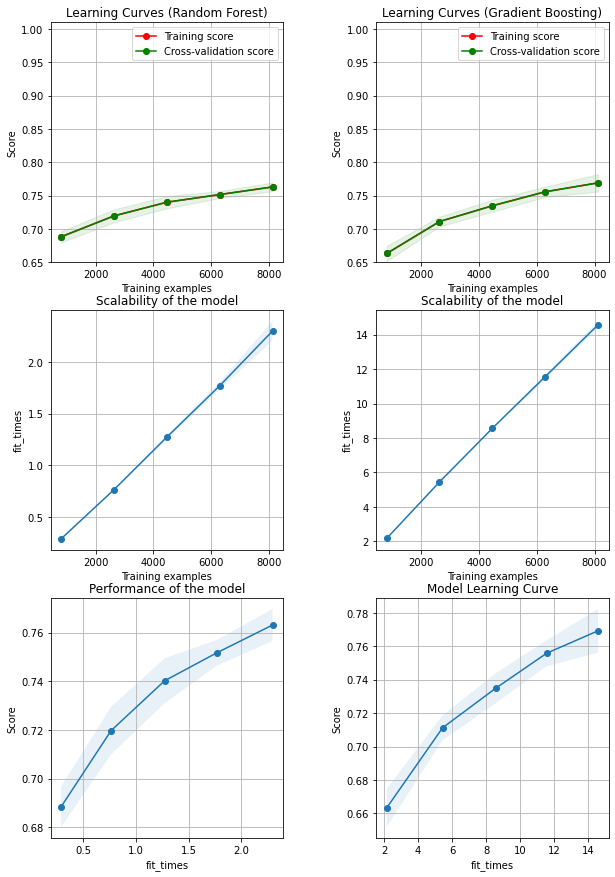

time: 723 ms (started: 2023-01-10 16:48:58 -08:00)


In [107]:
dpi=100
figure_filename = '../reports/figures/figure_train_size_score_random_forest_classifier_gradient_boosting_classifier_dpi_' + str(dpi) + '_v' + filename_version + '.png'

figure_filename_exists = os.path.isfile(figure_filename)
if figure_filename_exists == True:
    img = mpimg.imread(figure_filename)
    plt.figure(figsize=(60, 15))
    plt.grid(False)
    plt.axis('off')
    plt.imshow(img)

else:
    StratifiedKFold_5_splits = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
    
    fig, axes = plt.subplots(3, 2, figsize=(10, 15))

    title = r"Learning Curves (Random Forest)"
    estimator = RandomForestClassifier(bootstrap=False, max_depth=25, min_samples_split=4, n_estimators=200, random_state=200, min_samples_leaf=1, max_features='auto', criterion='gini', warm_start='False',)

    plt, learning_curve_random_forest_classifier = icr.plot_learning_curve(estimator, 
                                                                           title, 
                                                                           X=data_frame_collection['X_train'], 
                                                                           y=data_frame_collection['Y_train'].loc[:, 'Y'],
                                                                           filename=learning_curve_results_filename_collection['random_forest_classifier'],
                                                                           axes=axes[:, 0], 
                                                                           ylim=(0.65, 1.01), 
                                                                           cv=StratifiedKFold_5_splits, 
                                                                           n_jobs=4, 
                                                                           scoring="accuracy")


    title = r"Learning Curves (Gradient Boosting)"

    estimator = GradientBoostingClassifier(learning_rate = 0.1, 
                                           max_depth = 9, 
                                           n_estimators = 250,
                                           random_state=200,
                                           max_features=None,
                                           verbose=0,
                                           max_leaf_nodes=None,
                                           warm_start=False,
                                           n_iter_no_change=None)

    plt, learning_curve_gradient_boosting_classifier = icr.plot_learning_curve(estimator, 
                                                                               title, 
                                                                               X=data_frame_collection['X_train'], 
                                                                               y=data_frame_collection['Y_train'].loc[:, 'Y'],
                                                                               filename=learning_curve_results_filename_collection['gradient_boosting_classifier'],
                                                                               axes=axes[:, 1], 
                                                                               ylim=(0.65, 1.01), 
                                                                               cv=StratifiedKFold_5_splits, 
                                                                               n_jobs=4)
    
    plt.title('Model Learning Curve')

    fig.subplots_adjust(wspace=.4)

    plt.savefig(figure_filename, bbox_inches='tight', dpi=dpi)

plt.show()

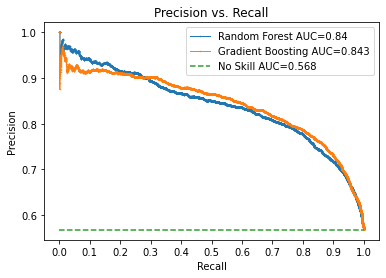

time: 190 ms (started: 2023-01-10 16:48:59 -08:00)


In [108]:
filename = '../reports/figures/figure_precision_recall_curve_random_forest_gradient_boosting_metric_auc_v' + filename_version + '.png'
markersize=1
linewidth=1

#calculate precision-recall points
random_forest_classifier_precision_array, random_forest_classifier_recall_array, random_forest_classifier_decision_threshold_array = precision_recall_curve(y_true=data_frame_collection['Y_train'].loc[:, 'Y'], probas_pred=stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['random_forest_classifier'])
#calculate precision-recall curve auc
random_forest_classifier_auc = auc(random_forest_classifier_recall_array, random_forest_classifier_precision_array)

# plot the precision-recall curve
plt.plot(random_forest_classifier_recall_array, random_forest_classifier_precision_array, marker='.', markersize=markersize, linewidth=linewidth, label='Random Forest AUC=' + str(round(random_forest_classifier_auc, 3)))




#calculate precision-recall points
gradient_boosting_classifier_precision_array, gradient_boosting_classifier_recall_array, gradient_boosting_classifier_threshold_array = precision_recall_curve(y_true=data_frame_collection['Y_train'].loc[:, 'Y'], probas_pred=stratified_5_fold_cross_validation_model_classifier_prediction_probability_series_collection['gradient_boosting_classifier'])
#calculate precision-recall curve auc
gradient_boosting_classifier_auc = auc(gradient_boosting_classifier_recall_array, gradient_boosting_classifier_precision_array)

# plot the precision-recall curve
plt.plot(gradient_boosting_classifier_recall_array, gradient_boosting_classifier_precision_array, marker='.', markersize=markersize, linewidth=linewidth, label='Gradient Boosting AUC=' + str(round(gradient_boosting_classifier_auc, 3)))




#calculate no skill classifier curve
no_skill_classifier_auc = data_frame_collection['Y_train'].loc[data_frame_collection['Y_train'].loc[:, 'Y']==1, 'Y'].shape[0] / data_frame_collection['Y_train'].loc[:, 'Y'].shape[0]
plt.plot([0, 1], [no_skill_classifier_auc, no_skill_classifier_auc], linestyle='--', label='No Skill AUC='+str(round(no_skill_classifier_auc, 3)))

plt.xticks([.0, .1 ,.2, .3 ,.4, .5, .6 ,.7, .8, .9, 1 ])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs. Recall')
plt.legend()


#save it
plt.savefig(filename, bbox_inches='tight', dpi=100)

plt.show()


#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/


In [109]:
#get data frame random forest decision threshold, precision, and recall
random_forest_classifier_decision_threshold_array = np.append(0, random_forest_classifier_decision_threshold_array)

df_random_forest_decision_threshold_precision_recall = pd.DataFrame({'random_forest_decision_threshold':random_forest_classifier_decision_threshold_array, 'random_forest_precision':random_forest_classifier_precision_array, 'random_forest_recall':random_forest_classifier_recall_array})
del random_forest_classifier_decision_threshold_array

p(df_random_forest_decision_threshold_precision_recall)


(10080, 3)


random_forest_decision_threshold  random_forest_precision  \
0                              0.000000                 0.569381   
1                              0.067847                 0.569339   
2                              0.068071                 0.569395   
3                              0.068746                 0.569451   
4                              0.069046                 0.569409   
10075                          0.978087                 1.000000   
10076                          0.978583                 1.000000   
10077                          0.979913                 1.000000   
10078                          0.980562                 1.000000   
10079                          0.986740                 1.000000   

       random_forest_recall  
0                  1.000000  
1                  0.999826  
2                  0.999826  
3                  0.999826  
4                  0.999653  
10075              0.000694  
10076              0.000521  
10077              0.000347  
10078              0.000174  
10079              0.000000

time: 5.7 ms (started: 2023-01-10 16:48:59 -08:00)


In [110]:
#get data frame gradient boosting decision threshold, precision, and recall
gradient_boosting_classifier_threshold_array = np.append(0, gradient_boosting_classifier_threshold_array)

df_gradient_boosting_decision_threshold_precision_recall = pd.DataFrame({'gradient_boosting_decision_threshold':gradient_boosting_classifier_threshold_array, 'gradient_boosting_precision':gradient_boosting_classifier_precision_array, 'gradient_boosting_recall':gradient_boosting_classifier_recall_array})
del gradient_boosting_classifier_threshold_array
p(df_gradient_boosting_decision_threshold_precision_recall)


(10108, 3)


gradient_boosting_decision_threshold  gradient_boosting_precision  \
0                                  0.000000                     0.569494   
1                                  0.000004                     0.569451   
2                                  0.000004                     0.569508   
3                                  0.000004                     0.569564   
4                                  0.000005                     0.569620   
10103                              0.999999                     1.000000   
10104                              1.000000                     1.000000   
10105                              1.000000                     1.000000   
10106                              1.000000                     1.000000   
10107                              1.000000                     1.000000   

       gradient_boosting_recall  
0                      1.000000  
1                      0.999826  
2                      0.999826  
3                      0.999826  
4                      0.999826  
10103                  0.000694  
10104                  0.000521  
10105                  0.000347  
10106                  0.000174  
10107                  0.000000

time: 5.34 ms (started: 2023-01-10 16:48:59 -08:00)


## Get Survey  Train .8 Recall Estimated Confusion Matrix

SURVEY TRAIN
baseline_precision: 0.5699507389162561
baseline_recall: 0.8033327547300816
baseline_accuracy: 0.5442002562333694
tn: 894
fp: 3492
fn: 1133
tp: 4628
In the survey train, there were 10147 coupon recommendations.
and4628 accepted the coupon saying they would use it. This is a 57.0% survey conversion rate and 3259 customer acquisitions.


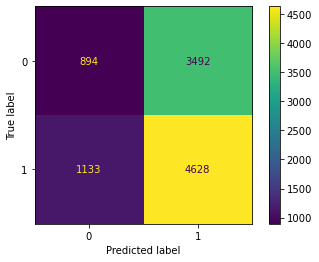

time: 88.5 ms (started: 2023-01-10 16:48:59 -08:00)


In [111]:
number_of_predictions = data_frame_collection['Y_train'].shape[0]

y_true=data_frame_collection['Y_train']

np.random.seed(200)
class_0_probability = .2
class_1_probability = .8

y_pred=np.random.choice([0, 1], size=number_of_predictions, p=[class_0_probability, class_1_probability])


print('SURVEY TRAIN')
baseline_precision = precision_score(y_true, y_pred)
baseline_recall = recall_score(y_true, y_pred)
baseline_accuracy = accuracy_score(y_true, y_pred)

print('baseline_precision: '+ str(baseline_precision))
print('baseline_recall: ' + str(baseline_recall))
print('baseline_accuracy: ' + str(baseline_accuracy))

confusion_matrix_ndarray = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = confusion_matrix_ndarray.ravel()
print('tn: ' + str(tn))
print('fp: ' + str(fp))
print('fn: ' + str(fn))
print('tp: ' + str(tp))

print('In the survey train, there were ' + str(tp + fp + tn + fn) + ' coupon recommendations.')
print('and' + str(tp) + ' accepted the coupon saying they would use it. \
This is a ' + str(round(baseline_precision*100, 2)) + '% survey conversion rate and ' + str(3259) + ' customer acquisitions.') 

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_ndarray, display_labels=[0,1])
disp.plot()
plt.grid(False)

plt.show()

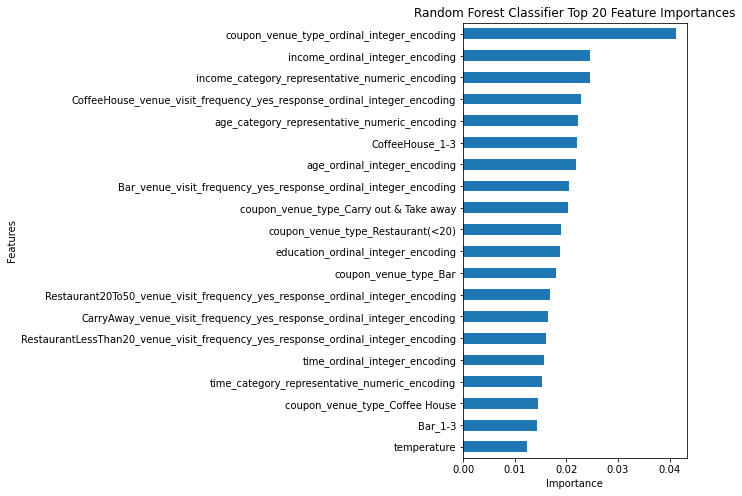

time: 288 ms (started: 2023-01-10 16:48:59 -08:00)


In [112]:
#get feature importants plot
top_number_features = 20
figsize=(4, 8)
dpi=100
figure_filename = '../reports/figures/figure_random_forest_classifier_train_top_'+ str(top_number_features) +'_feature_importances_v' + filename_version + '.png'


plt.subplots(figsize=figsize)

feature_importances = best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.feature_importances_
series_random_forest_classifier_feature_importances = pd.Series(feature_importances, 
                                                                 index=best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.X_columns).sort_values(ascending=False)
series_random_forest_classifier_feature_importances[0:top_number_features].sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Random Forest Classifier Top ' + str(top_number_features)   + ' Feature Importances');

plt.savefig(figure_filename, bbox_inches='tight', dpi=dpi)

plt.show()



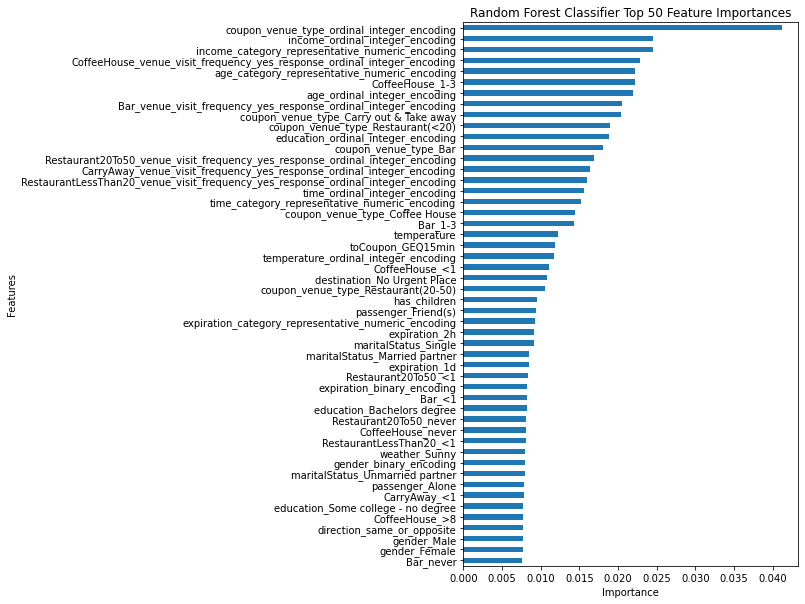

time: 1.01 s (started: 2023-01-10 16:49:00 -08:00)


In [113]:
#get feature importants plot
top_number_features = 50
figsize=(6, 10)
dpi=100
figure_filename = '../reports/figures/figure_random_forest_classifier_train_top_'+ str(top_number_features) +'_feature_importances_v' + filename_version + '.png'


plt.subplots(figsize=figsize)

feature_importances = best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.feature_importances_
series_random_forest_classifier_feature_importances = pd.Series(feature_importances, 
                                                                 index=best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.X_columns).sort_values(ascending=False)
series_random_forest_classifier_feature_importances[0:top_number_features].sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Random Forest Classifier Top ' + str(top_number_features)   + ' Feature Importances');

plt.savefig(figure_filename, bbox_inches='tight', dpi=dpi)

plt.show()



In [114]:
column_name_list_random_forest_classifier_top_50_by_feature_importance = series_random_forest_classifier_feature_importances[0:50].index.to_list()

column_name_list_random_forest_classifier_top_25_by_feature_importance = series_random_forest_classifier_feature_importances[0:25].index.to_list()

pl(column_name_list_random_forest_classifier_top_50_by_feature_importance)

50


['coupon_venue_type_ordinal_integer_encoding',
 'income_ordinal_integer_encoding',
 'income_category_representative_numeric_encoding',
 'CoffeeHouse_venue_visit_frequency_yes_response_ordinal_integer_encoding',
 'age_category_representative_numeric_encoding',
 'CoffeeHouse_1-3',
 'age_ordinal_integer_encoding',
 'Bar_venue_visit_frequency_yes_response_ordinal_integer_encoding',
 'coupon_venue_type_Carry out & Take away',
 'coupon_venue_type_Restaurant(<20)',
 'education_ordinal_integer_encoding',
 'coupon_venue_type_Bar',
 'Restaurant20To50_venue_visit_frequency_yes_response_ordinal_integer_encoding',
 'CarryAway_venue_visit_frequency_yes_response_ordinal_integer_encoding',
 'RestaurantLessThan20_venue_visit_frequency_yes_response_ordinal_integer_encoding',
 'time_ordinal_integer_encoding',
 'time_category_representative_numeric_encoding',
 'coupon_venue_type_Coffee House',
 'Bar_1-3',
 'temperature',
 'toCoupon_GEQ15min',
 'temperature_ordinal_integer_encoding',
 'CoffeeHouse_<1',
 'd

time: 2.48 ms (started: 2023-01-10 16:49:01 -08:00)


In [115]:
column_name_list_random_forest_classifier_top_50_by_feature_importance_target = column_name_list_random_forest_classifier_top_50_by_feature_importance + ['Y']
column_name_list_random_forest_classifier_top_25_by_feature_importance_target = column_name_list_random_forest_classifier_top_25_by_feature_importance + ['Y']
pl(column_name_list_random_forest_classifier_top_25_by_feature_importance_target)


26


['coupon_venue_type_ordinal_integer_encoding',
 'income_ordinal_integer_encoding',
 'income_category_representative_numeric_encoding',
 'CoffeeHouse_venue_visit_frequency_yes_response_ordinal_integer_encoding',
 'age_category_representative_numeric_encoding',
 'CoffeeHouse_1-3',
 'age_ordinal_integer_encoding',
 'Bar_venue_visit_frequency_yes_response_ordinal_integer_encoding',
 'coupon_venue_type_Carry out & Take away',
 'coupon_venue_type_Restaurant(<20)',
 'education_ordinal_integer_encoding',
 'coupon_venue_type_Bar',
 'Restaurant20To50_venue_visit_frequency_yes_response_ordinal_integer_encoding',
 'CarryAway_venue_visit_frequency_yes_response_ordinal_integer_encoding',
 'RestaurantLessThan20_venue_visit_frequency_yes_response_ordinal_integer_encoding',
 'time_ordinal_integer_encoding',
 'time_category_representative_numeric_encoding',
 'coupon_venue_type_Coffee House',
 'Bar_1-3',
 'temperature',
 'toCoupon_GEQ15min',
 'temperature_ordinal_integer_encoding',
 'CoffeeHouse_<1',
 'd

time: 1.73 ms (started: 2023-01-10 16:49:01 -08:00)


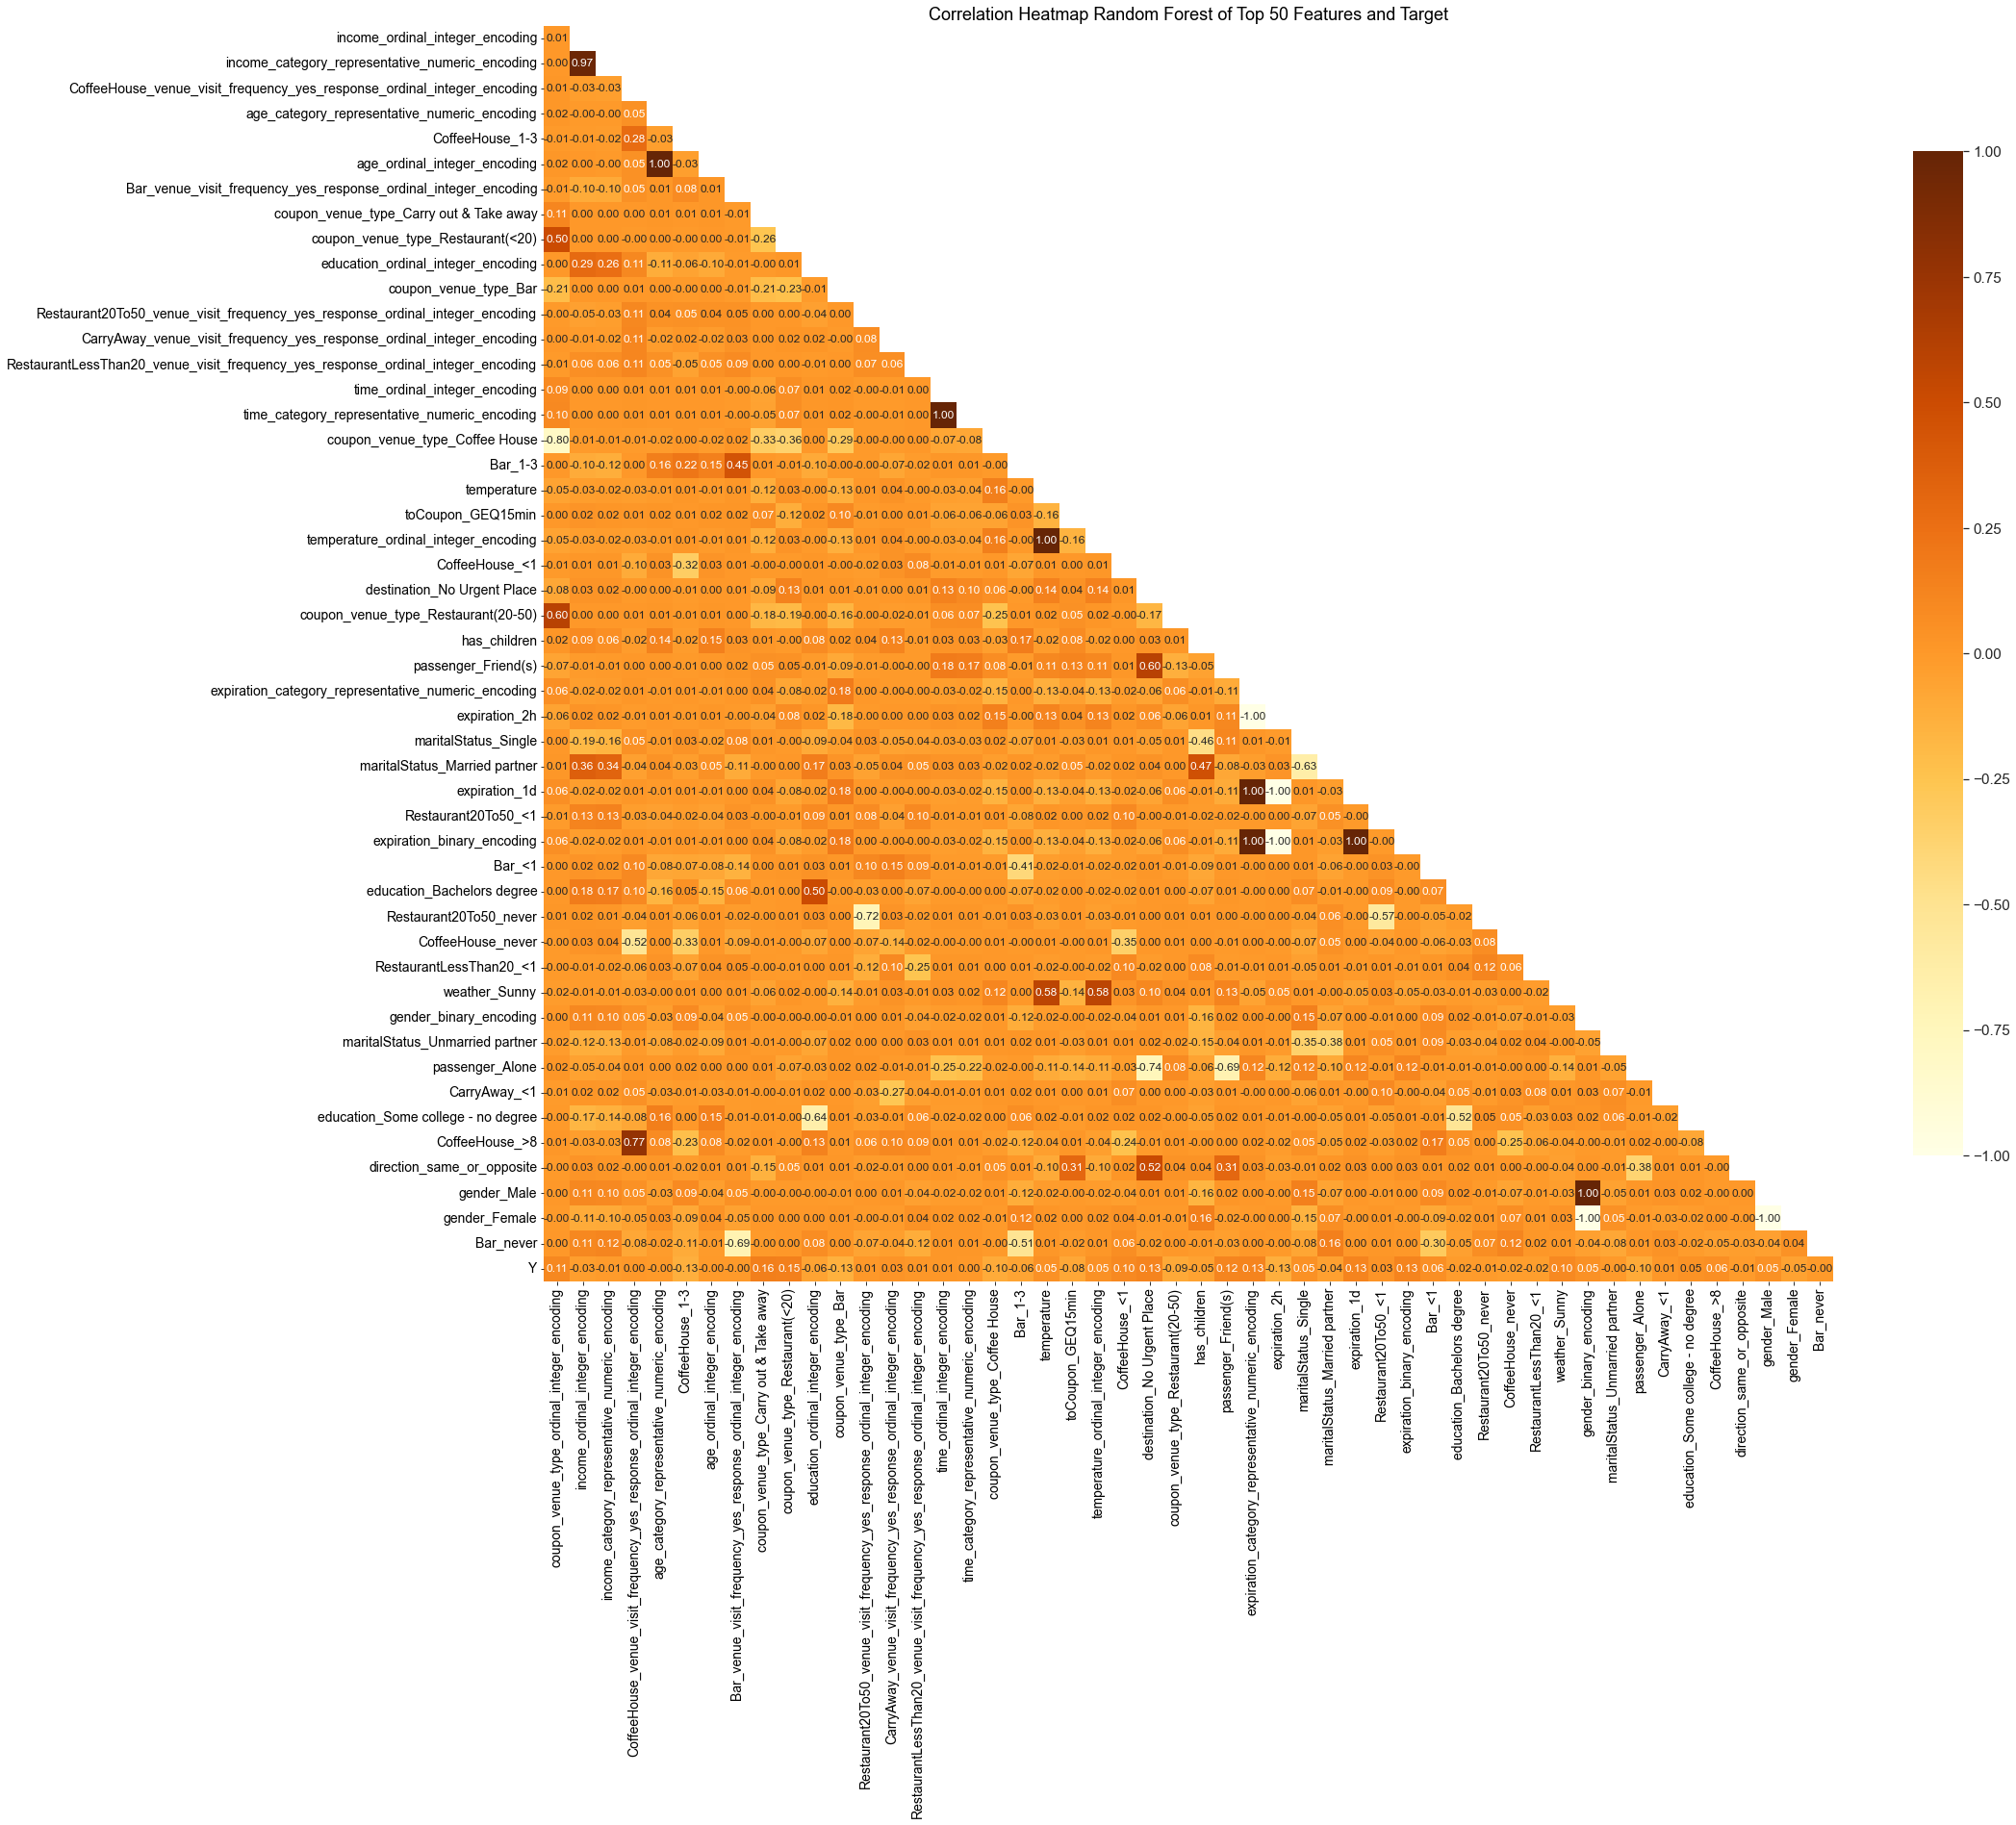

time: 6.14 s (started: 2023-01-10 16:49:01 -08:00)


In [116]:
dpi=100
figure_filename = '../reports/figures/figure_correlation_heatmap_random_forest_classifier_train_top_50_and_target_dpi_' + str(dpi) + '_v' + filename_version + '.png'

figure_filename_exists = os.path.isfile(figure_filename)
if figure_filename_exists == True:
    img = mpimg.imread(figure_filename)
    plt.figure(figsize=(35, 28))
    plt.grid(False)
    plt.axis('off')
    plt.imshow(img)
else:
    #correlation heatmap of top 50 features and target
    
    df_train = pd.concat([data_frame_collection['X_train'], data_frame_collection['Y_train']], axis=1)

    df_corr = df_train.loc[:, column_name_list_random_forest_classifier_top_50_by_feature_importance_target].corr()

    fig, ax = plt.subplots(figsize=(30, 24))

    mask = np.triu(np.ones_like(df_corr, dtype=bool))
    mask = mask[1:, :-1]

    corr = df_corr.iloc[1:,:-1].copy()

    sns.set(font_scale=1.4)
    sns.set_style("white")

    res = sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", annot_kws={"size": 12}, cmap='YlOrBr', vmin=-1, vmax=1, cbar_kws={"shrink": .8})
    res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 14, rotation=90)
    res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14, rotation=0)
    plt.title('Correlation Heatmap Random Forest of Top 50 Features and Target', fontsize=18)

    #save it
    plt.savefig(figure_filename, bbox_inches='tight', dpi=dpi)

plt.show()

<font size="5"><a id='[Modeling_Test_Results]'></a> </font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font> <font size="2">[Modeling_1](#[Modeling_1])</font> <font size="2">[Modeling_2](#[Modeling_2])</font> <font size="2">[Modeling_Train_Results](#[Modeling_Train_Results])</font> <font size="2">[Modeling_Test_Results](#[Modeling_Test_Results])</font>


<font size="6"><a id='[Modeling_Test_Results]'>**Modeling Test Results**</a> </font>

### Get Data Frame Random Forest Prediction Probability, Gradient Boosting Prediction Probability, Y Actual, Coupon Venue Type

In [117]:
feature_column_name_list = ['coupon_venue_type']#, 'age', 'income']

## Get Prediction Probabilities for Gradient Boosting, Prediction Probabilities for Random Forest, Y_actual, and coupon venue type
Y_test_random_forest_prediction_probability_class0_class1_ndarray = best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.predict_proba(data_frame_collection['X_test'])
df_Y_test_random_forest_prediction_probability = pd.DataFrame(Y_test_random_forest_prediction_probability_class0_class1_ndarray).loc[:, 1]


Y_test_gradient_boosting_prediction_probability_class0_class1_ndarray = best_stratified_5_fold_grid_search_cross_validation_gradient_boosting_classifier.predict_proba(data_frame_collection['X_test'])
df_Y_test_gradient_boosting_prediction_probability = pd.DataFrame(Y_test_gradient_boosting_prediction_probability_class0_class1_ndarray).loc[:, 1]


df_y_test_model_name_prediction_probability_y_actual_coupon_venue_type = \
pd.concat([df_Y_test_random_forest_prediction_probability.to_frame().rename(columns={1:'Y_test_random_forest_prediction_probability'}), 
           df_Y_test_gradient_boosting_prediction_probability.to_frame().rename(columns={1:'Y_test_gradient_boosting_prediction_probability'}), 
           data_frame_collection['Y_test'].reset_index(drop=True),
           df_collection['X_test'].loc[:, feature_column_name_list].reset_index(drop=True)], axis=1)

p(df_y_test_model_name_prediction_probability_y_actual_coupon_venue_type)


(2537, 4)


Y_test_random_forest_prediction_probability  \
0                                        0.107202   
1                                        0.053351   
2                                        0.457736   
3                                        0.186667   
4                                        0.593144   
2532                                     0.208086   
2533                                     0.522917   
2534                                     0.203686   
2535                                     0.655833   
2536                                     0.851667   

      Y_test_gradient_boosting_prediction_probability  Y  \
0                                            0.000190  0   
1                                            0.000020  0   
2                                            0.745344  0   
3                                            0.070547  0   
4                                            0.962529  1   
2532                                         0.991149  0   
2533                                         0.277567  1   
2534                                         0.000110  0   
2535                                         0.916642  1   
2536                                         0.996387  1   

          coupon_venue_type  
0              Coffee House  
1              Coffee House  
2              Coffee House  
3         Restaurant(20-50)  
4              Coffee House  
2532        Restaurant(<20)  
2533           Coffee House  
2534                    Bar  
2535  Carry out & Take away  
2536  Carry out & Take away

time: 135 ms (started: 2023-01-10 16:49:07 -08:00)


### Get Random Forest Classifier Y Predicted from Y Prediction Probabilities and Decision Threshold .9 Precision Estimated

In [118]:
model_type='random_forest'
df_Y_test_random_forest_predicted = icr.get_model_predictions_from_prediction_probabilities_and_decision_threshold_proportion_metric_estimated(df=df_random_forest_decision_threshold_precision_recall, 
                                                                                                                                               model_proportion_precision=.9, 
                                                                                                                                               model_proportion_recall=None,
                                                                                                                                               model_precision_column_name=model_type+'_precision', 
                                                                                                                                               model_recall_column_name=model_type+'_recall',
                                                                                                                                               model_decision_threshold_column_name=model_type+'_decision_threshold',
                                                                                                                                               df_Y_test_model_prediction_probability=df_Y_test_random_forest_prediction_probability)
df_Y_test_random_forest_predicted=df_Y_test_random_forest_predicted.rename(columns={'Y_test_predicted':'Y_test_'+str(model_type)+'_predicted'})
p(df_Y_test_random_forest_predicted)



(2537, 1)


Y_test_random_forest_predicted
0                                  0
1                                  0
2                                  0
3                                  0
4                                  0
2532                               0
2533                               0
2534                               0
2535                               0
2536                               1

time: 6.53 ms (started: 2023-01-10 16:49:07 -08:00)


### Get Gradient Boosting Classifier Y Predicted from Y Prediction Probabilities and Decision Threshold .8 Recall Estimated

In [119]:
model_type = 'gradient_boosting'
model_proportion_precision=None
model_proportion_recall=.8

df_Y_test_gradient_boosting_predicted = icr.get_model_predictions_from_prediction_probabilities_and_decision_threshold_proportion_metric_estimated(df=df_gradient_boosting_decision_threshold_precision_recall,
                                                                                                                                                   model_proportion_precision=model_proportion_precision,
                                                                                                                                                   model_proportion_recall=model_proportion_recall,
                                                                                                                                                   model_precision_column_name=model_type+'_precision',
                                                                                                                                                   model_recall_column_name=model_type+'_recall',
                                                                                                                                                   model_decision_threshold_column_name=model_type+'_decision_threshold',
                                                                                                                                                   df_Y_test_model_prediction_probability=df_Y_test_gradient_boosting_prediction_probability)
df_Y_test_gradient_boosting_predicted=df_Y_test_gradient_boosting_predicted.rename(columns={'Y_test_predicted':'Y_test_'+str(model_type)+'_predicted'})
p(df_Y_test_gradient_boosting_predicted)


(2537, 1)


Y_test_gradient_boosting_predicted
0                                      0
1                                      0
2                                      1
3                                      0
4                                      1
2532                                   1
2533                                   0
2534                                   0
2535                                   1
2536                                   1

time: 6.97 ms (started: 2023-01-10 16:49:07 -08:00)


In [120]:
data_fold_type='test'
number_of_predictions=data_frame_collection['X_'+data_fold_type].shape[0]

time: 696 µs (started: 2023-01-10 16:49:07 -08:00)


In [121]:
recall_estimated=1

df_Y_test_survey_100_recall_estimate_predicted = icr.get_survey_coupon_recommendations_by_recall_estimate(number_of_predictions=number_of_predictions, recall_estimated=recall_estimated, random_state=200)

p(df_Y_test_survey_100_recall_estimate_predicted)

(2537, 1)


Y_test_survey_100_recall_estimate_predicted
0                                               1
1                                               1
2                                               1
3                                               1
4                                               1
2532                                            1
2533                                            1
2534                                            1
2535                                            1
2536                                            1

time: 4.28 ms (started: 2023-01-10 16:49:07 -08:00)


In [122]:
recall_estimated=.8

df_Y_test_survey_80_recall_estimate_predicted = icr.get_survey_coupon_recommendations_by_recall_estimate(number_of_predictions=number_of_predictions, recall_estimated=recall_estimated, random_state=200)

p(df_Y_test_survey_80_recall_estimate_predicted)


(2537, 1)


Y_test_survey_80_recall_estimate_predicted
0                                              1
1                                              1
2                                              1
3                                              1
4                                              1
2532                                           1
2533                                           0
2534                                           1
2535                                           0
2536                                           1

time: 3.5 ms (started: 2023-01-10 16:49:07 -08:00)


### Get Data Frame Y Test Random Forest Predicted, Y Test Gradient Boosting Predicted, Y Test Survey Predicted, Y Actual, and Coupon Venue Type

In [123]:
feature_column_name_list = ['coupon_venue_type']#, 'age', 'income']

df_y_test_model_name_predicted_y_test_survey_recall_estimate_predicted_y_actual_coupon_venue_type = \
pd.concat([df_Y_test_random_forest_predicted,
           df_Y_test_gradient_boosting_predicted,
           df_Y_test_survey_100_recall_estimate_predicted,
           df_Y_test_survey_80_recall_estimate_predicted,
           data_frame_collection['Y_test'].reset_index(drop=True),
           df_collection['X_test'].loc[:, feature_column_name_list].reset_index(drop=True)], axis=1)

p(df_y_test_model_name_predicted_y_test_survey_recall_estimate_predicted_y_actual_coupon_venue_type)

(2537, 6)


Y_test_random_forest_predicted  Y_test_gradient_boosting_predicted  \
0                                  0                                   0   
1                                  0                                   0   
2                                  0                                   1   
3                                  0                                   0   
4                                  0                                   1   
2532                               0                                   1   
2533                               0                                   0   
2534                               0                                   0   
2535                               0                                   1   
2536                               1                                   1   

      Y_test_survey_100_recall_estimate_predicted  \
0                                               1   
1                                               1   
2                                               1   
3                                               1   
4                                               1   
2532                                            1   
2533                                            1   
2534                                            1   
2535                                            1   
2536                                            1   

      Y_test_survey_80_recall_estimate_predicted  Y      coupon_venue_type  
0                                              1  0           Coffee House  
1                                              1  0           Coffee House  
2                                              1  0           Coffee House  
3                                              1  0      Restaurant(20-50)  
4                                              1  1           Coffee House  
2532                                           1  0        Restaurant(<20)  
2533                                           0  1           Coffee House  
2534                                           1  0                    Bar  
2535                                           0  1  Carry out & Take away  
2536                                           1  1  Carry out & Take away

time: 6.26 ms (started: 2023-01-10 16:49:07 -08:00)


In [124]:
multiple_index=icr.get_metric_multiple_index(proportion_or_percentage='proportion')
multiple_index


MultiIndex([( 'Model',                                      'Conversion Rate'),
            ( 'Model',                                               'Recall'),
            ( 'Model',                            'Proportion of Conversions'),
            ( 'Model',                                          'Conversions'),
            ( 'Model',                    'Proportion of Coupons Recommended'),
            ( 'Model',                                  'Coupons Recommended'),
            ( 'Model', 'Conversions to Base Survey Coupons Recommended Ratio'),
            ('Survey',                                      'Conversion Rate'),
            ('Survey',                                               'Recall'),
            ('Survey',                            'Proportion of Conversions'),
            ('Survey',                                          'Conversions'),
            ('Survey',                    'Proportion of Coupons Recommended'),
            ('Survey',                  

time: 2.46 ms (started: 2023-01-10 16:49:07 -08:00)


In [125]:
feature_column_name_filter_value_list_dictionary_key_list=['Overall', 'Coffee House', 'Bar', 'Takeout', 'Low-Cost Restaurant', 'Expensive Restaurant']
feature_column_name_filter_value_two_dimension_list=[['Coffee House', 'Bar', 'Carry out & Take away', 'Restaurant(<20)', 'Restaurant(20-50)'], ['Coffee House'], ['Bar'], ['Carry out & Take away'], ['Restaurant(<20)'], ['Restaurant(20-50)']]

feature_column_name_filter_value_list_dictionary=\
dict(zip(feature_column_name_filter_value_list_dictionary_key_list,feature_column_name_filter_value_two_dimension_list))

pdc(feature_column_name_filter_value_list_dictionary)



6


{'Overall': ['Coffee House',
  'Bar',
  'Carry out & Take away',
  'Restaurant(<20)',
  'Restaurant(20-50)'],
 'Coffee House': ['Coffee House'],
 'Bar': ['Bar'],
 'Takeout': ['Carry out & Take away'],
 'Low-Cost Restaurant': ['Restaurant(<20)'],
 'Expensive Restaurant': ['Restaurant(20-50)']}

time: 2.43 ms (started: 2023-01-10 16:49:07 -08:00)


In [126]:
feature_column_name_filter='coupon_venue_type'

time: 481 µs (started: 2023-01-10 16:49:07 -08:00)


### Get Random Forest 90% Conversion Rate Estimated Metrics (Per Coupon Venue Type) Table 

In [127]:
model_type='random_forest'
survey_number_recall_estimated_y_predicted_column_name='Y_test_survey_100_recall_estimate_predicted'



metrics_coupon_venue_type_list = []

for feature_column_name_filter_value_list_dictionary_key in feature_column_name_filter_value_list_dictionary.keys():
    
    metric_list=icr.get_model_and_survey_metrics(df=df_y_test_model_name_predicted_y_test_survey_recall_estimate_predicted_y_actual_coupon_venue_type,
                                                 model_y_predicted_column_name='Y_test_'+model_type+'_predicted',
                                                 survey_number_recall_estimated_y_predicted_column_name=survey_number_recall_estimated_y_predicted_column_name,
                                                 y_actual_column_name='Y',
                                                 feature_column_name_filter=feature_column_name_filter,
                                                 feature_column_name_filter_value_list=feature_column_name_filter_value_list_dictionary[feature_column_name_filter_value_list_dictionary_key],
                                                 metrics_column_name_list=None,)
    metrics_coupon_venue_type_list+=[metric_list]

pd.DataFrame(metrics_coupon_venue_type_list, 
             index=feature_column_name_filter_value_list_dictionary_key_list,
             columns=multiple_index).T



Overall  \
Model  Conversion Rate                                          0.895307   
       Recall                                                   0.342305   
       Proportion of Conversions                                1.000000   
       Conversions                                            496.000000   
       Proportion of Coupons Recommended                        1.000000   
       Coupons Recommended                                    554.000000   
       Conversions to Base Survey Coupons Recommended Ratio     0.195507   
Survey Conversion Rate                                          0.571147   
       Recall                                                   1.000000   
       Proportion of Conversions                                1.000000   
       Conversions                                           1449.000000   
       Proportion of Coupons Recommended                        1.000000   
       Coupons Recommended                                   2537.000000   
       Conversions to Base Survey Coupons Recommended Ratio     0.571147   

                                                             Coffee House  \
Model  Conversion Rate                                           0.896296   
       Recall                                                    0.283372   
       Proportion of Conversions                                 0.243952   
       Conversions                                             121.000000   
       Proportion of Coupons Recommended                         0.243682   
       Coupons Recommended                                     135.000000   
       Conversions to Base Survey Coupons Recommended Ratio      0.149199   
Survey Conversion Rate                                           0.526510   
       Recall                                                    1.000000   
       Proportion of Conversions                                 0.294686   
       Conversions                                             427.000000   
       Proportion of Coupons Recommended                         0.319669   
       Coupons Recommended                                     811.000000   
       Conversions to Base Survey Coupons Recommended Ratio      0.526510   

                                                                    Bar  \
Model  Conversion Rate                                         0.941176   
       Recall                                                  0.102564   
       Proportion of Conversions                               0.032258   
       Conversions                                            16.000000   
       Proportion of Coupons Recommended                       0.030686   
       Coupons Recommended                                    17.000000   
       Conversions to Base Survey Coupons Recommended Ratio    0.040100   
Survey Conversion Rate                                         0.390977   
       Recall                                                  1.000000   
       Proportion of Conversions                               0.107660   
       Conversions                                           156.000000   
       Proportion of Coupons Recommended                       0.157272   
       Coupons Recommended                                   399.000000   
       Conversions to Base Survey Coupons Recommended Ratio    0.390977   

                                                                Takeout  \
Model  Conversion Rate                                         0.909091   
       Recall                                                  0.468320   
       Proportion of Conversions                               0.342742   
       Conversions                                           170.000000   
       Proportion of Coupons Recommended                       0.337545   
       Coupons Recommended                                   187.000000   
       Conversions to Base Survey Coupons Recommended Ratio    0.347648   
Survey Conversion Rate                    

time: 36.9 ms (started: 2023-01-10 16:49:07 -08:00)


### Get Random Forest 90% Conversion Rate Estimated 95% Confidence Interval Metrics (Per Coupon Venue Type) Table 

In [128]:
number_of_replicates=10000
quantile_lower_upper_list=[0.025, 0.975]

feature_column_name_filter='coupon_venue_type'

random_forest_model_survey_95_confidence_interval_metric_collection={}
df_random_forest_90_precision_estimated_feature_filter_number_bootstrap_replicates_metrics_collection={}

for feature_column_name_filter_value_list_dictionary_key in feature_column_name_filter_value_list_dictionary_key_list:

    random_forest_model_survey_95_confidence_interval_metric_collection[feature_column_name_filter_value_list_dictionary_key],\
    df_random_forest_90_precision_estimated_feature_filter_number_bootstrap_replicates_metrics_collection[feature_column_name_filter_value_list_dictionary_key]=\
    icr.get_metric_confidence_interval_table_by_feature_column_name_filter_value_list_dictionary_key(df_y_test_model_name_predicted_y_test_survey_recall_estimate_predicted_y_actual_feature_column_name_filter=df_y_test_model_name_predicted_y_test_survey_recall_estimate_predicted_y_actual_coupon_venue_type,
                                                                                        feature_column_name_filter=feature_column_name_filter,
                                                                                        feature_column_name_filter_value_list_dictionary_key=feature_column_name_filter_value_list_dictionary_key,
                                                                                        feature_column_name_filter_value_list_dictionary=feature_column_name_filter_value_list_dictionary,
                                                                                        multiple_index=multiple_index,
                                                                                        number_of_replicates=number_of_replicates,
                                                                                        quantile_lower_upper_list=quantile_lower_upper_list,
                                                                                        model_type=model_type,
                                                                                        survey_number_recall_estimated_y_predicted_column_name=survey_number_recall_estimated_y_predicted_column_name)


df_random_forest_model_survey_95_confidence_interval_metric_feature_column_name_filter_value=\
icr.convert_collection_to_data_frame_and_drop_top_column_level(random_forest_model_survey_95_confidence_interval_metric_collection)

df_random_forest_model_survey_95_confidence_interval_metric_feature_column_name_filter_value


95% Confidence Interval  \
                                                                            Overall   
Model  Conversion Rate                                                  86.9%-92.1%   
       Recall                                                           31.8%-36.8%   
       Percentage of Conversions                                          100%-100%   
       Conversions                                                          458-536   
       Percentage of Coupons Recommended                                  100%-100%   
       Coupons Recommended                                                  514-596   
       Conversions to Base Survey Coupons Recommended Ratio             18.1%-21.1%   
Survey Conversion Rate                                                  55.2%-59.0%   
       Recall                                                             100%-100%   
       Percentage of Conversions                                          100%-100%   
       Conversions                                                        1401-1498   
       Percentage of Coupons Recommended                                  100%-100%   
       Coupons Recommended                                                2537-2537   
       Conversions to Base Survey Coupons Recommended Ratio             55.2%-59.0%   

                                                                          \
                                                            Coffee House   
Model  Conversion Rate                                       84.3%-94.6%   
       Recall                                                24.1%-32.7%   
       Percentage of Conversions                             20.7%-28.2%   
       Conversions                                               100-143   
       Percentage of Coupons Recommended                     20.8%-28.0%   
       Coupons Recommended                                       113-158   
       Conversions to Base Survey Coupons Recommended Ratio  12.5%-17.4%   
Survey Conversion Rate                                       49.3%-56.0%   
       Recall                                                  100%-100%   
       Percentage of Conversions                             27.1%-31.8%   
       Conversions                                               390-464   
       Percentage of Coupons Recommended                     30.2%-33.8%   
       Coupons Recommended                                       765-858   
       Conversions to Base Survey Coupons Recommended Ratio  49.3%-56.0%   

                                                                           \
                                                                      Bar   
Model  Conversion Rate                                       80.0%-100.0%   
       Recall                                                  5.7%-15.4%   
       Percentage of Conversions                                1.8%-4.9%   
       Conversions                                                   9-24   
       Percentage of Coupons Recommended                        1.7%-4.6%   
       Coupons Recommended                                          10-26   
       Conversions to Base Survey Coupons Recommended Ratio     2.2%-6.1%   
Survey Conversion Rate                                        34.4%-44.0%   
       Recall                                                   100%-100%   
       Percentage of Conversions                               9.2%-12.4%   
       Conversions                                                133-181   
       Percentage of Coupons Recommended                      14.3%-17.1%   
       Coupons Recommended                                        362-435   
       Conversions to Base Survey Coupons Recommended Ratio   34.4%-44.0%   

                                                                          \
                                                                 Takeout   
Model  Conversion Rate                                       86.6

time: 4min 1s (started: 2023-01-10 16:49:07 -08:00)


In [130]:
random_forest_quantile_10=\
df_random_forest_90_precision_estimated_feature_filter_number_bootstrap_replicates_metrics_collection['Overall'].loc[('Model', 'Conversion Rate'),:].quantile(q=.1)

random_forest_quantile_10

0.8786764705882353

time: 2.5 ms (started: 2023-01-10 16:53:09 -08:00)


In [158]:
df_random_forest_90_precision_estimated_feature_filter_number_bootstrap_replicates_metrics_collection['Overall'].loc[('Model', 'Conversion Rate')]*100

0       92.115385
1       90.641248
2       88.773748
3       87.969925
4       88.994307
          ...    
9995    89.369369
9996    88.446970
9997    92.599278
9998    90.298507
9999    90.595010
Name: (Model, Conversion Rate), Length: 10000, dtype: float64

time: 11.3 ms (started: 2023-01-10 16:58:12 -08:00)


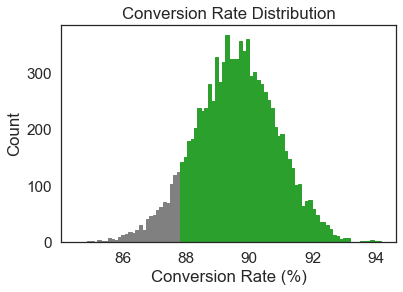

time: 265 ms (started: 2023-01-10 17:33:16 -08:00)


In [212]:
dpi=100
figure_filename = '../reports/figures/figure_random_forest_classifier_conversion_rate_overall_90_percent_confidence_dpi_' + str(dpi) + '_v' + filename_version + '.png'

number_of_bins = 88
bin_number_split_color_split=30

figure_filename_exists = os.path.isfile(figure_filename)
if figure_filename_exists == True:
    img = mpimg.imread(figure_filename)
    plt.figure(figsize=(10, 8))
    plt.grid(False)
    plt.axis('off')
    plt.imshow(img)
else:
    figsize=(6,4)

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize)

    bin_count_array, bin_array, patches = ax.hist(df_random_forest_90_precision_estimated_feature_filter_number_bootstrap_replicates_metrics_collection['Overall'].loc[('Model', 'Conversion Rate'),:]*100,
                                                  linewidth=1,
                                                  bins=number_of_bins,
                                                  rwidth=1,
                                                  alpha=1,
                                                  edgecolor='green',)

    #ax.axvline(x=87.86764705882353, color='b', label='axvline - full height')

    for i in range(0,bin_number_split_color_split):
        patches[i].set_facecolor('gray')
        patches[i].set_edgecolor('gray')
    for i in range(bin_number_split_color_split,len(patches)):    
        patches[i].set_facecolor('tab:green')
        patches[i].set_edgecolor('tab:green')


    plt.xlabel('Conversion Rate (%)')
    plt.ylabel('Count')
    plt.title('Conversion Rate Distribution');

    plt.savefig(figure_filename, bbox_inches='tight', dpi=100)

plt.show()

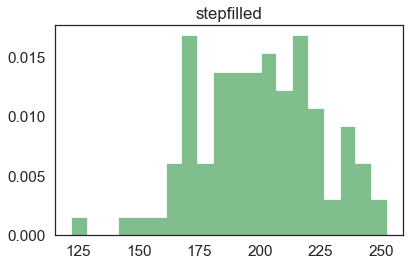

time: 93.8 ms (started: 2023-01-10 17:24:35 -08:00)


In [188]:
np.random.seed(19680801)

mu_x = 200
sigma_x = 25
x = np.random.normal(mu_x, sigma_x, size=100)

mu_w = 200
sigma_w = 10
w = np.random.normal(mu_w, sigma_w, size=100)

fig, axs = plt.subplots(nrows=1, ncols=1)

axs.hist(x, 20, density=True, histtype='stepfilled', facecolor='g', alpha=0.75)

axs.set_title('stepfilled')

fig.tight_layout()
plt.show()

In [132]:
#quantile(q=quantile_lower_upper_list, axis=1, numeric_only=True, interpolation='linear')

time: 457 µs (started: 2023-01-10 16:53:09 -08:00)


In [133]:
model_type='gradient_boosting'
survey_number_recall_estimated_y_predicted_column_name='Y_test_survey_80_recall_estimate_predicted'


metrics_coupon_venue_type_list = []

for feature_column_name_filter_value_list_dictionary_key in feature_column_name_filter_value_list_dictionary.keys():
    
    metric_list=icr.get_model_and_survey_metrics(df=df_y_test_model_name_predicted_y_test_survey_recall_estimate_predicted_y_actual_coupon_venue_type,
                                                 model_y_predicted_column_name='Y_test_'+model_type+'_predicted',
                                                 survey_number_recall_estimated_y_predicted_column_name=survey_number_recall_estimated_y_predicted_column_name,
                                                 y_actual_column_name='Y',
                                                 feature_column_name_filter=feature_column_name_filter,
                                                 feature_column_name_filter_value_list=feature_column_name_filter_value_list_dictionary[feature_column_name_filter_value_list_dictionary_key],
                                                 metrics_column_name_list=None,)
    metrics_coupon_venue_type_list+=[metric_list]

pd.DataFrame(metrics_coupon_venue_type_list, 
             index=feature_column_name_filter_value_list_dictionary_key_list,
             columns=multiple_index).T



Overall  \
Model  Conversion Rate                                          0.798764   
       Recall                                                   0.802622   
       Proportion of Conversions                                1.000000   
       Conversions                                           1163.000000   
       Proportion of Coupons Recommended                        1.000000   
       Coupons Recommended                                   1456.000000   
       Conversions to Base Survey Coupons Recommended Ratio     0.458415   
Survey Conversion Rate                                          0.565972   
       Recall                                                   0.787440   
       Proportion of Conversions                                1.000000   
       Conversions                                           1141.000000   
       Proportion of Coupons Recommended                        1.000000   
       Coupons Recommended                                   2016.000000   
       Conversions to Base Survey Coupons Recommended Ratio     0.449744   

                                                             Coffee House  \
Model  Conversion Rate                                           0.801008   
       Recall                                                    0.744731   
       Proportion of Conversions                                 0.273431   
       Conversions                                             318.000000   
       Proportion of Coupons Recommended                         0.272665   
       Coupons Recommended                                     397.000000   
       Conversions to Base Survey Coupons Recommended Ratio      0.392109   
Survey Conversion Rate                                           0.527157   
       Recall                                                    0.772834   
       Proportion of Conversions                                 0.289220   
       Conversions                                             330.000000   
       Proportion of Coupons Recommended                         0.310516   
       Coupons Recommended                                     626.000000   
       Conversions to Base Survey Coupons Recommended Ratio      0.406905   

                                                                    Bar  \
Model  Conversion Rate                                         0.751592   
       Recall                                                  0.756410   
       Proportion of Conversions                               0.101462   
       Conversions                                           118.000000   
       Proportion of Coupons Recommended                       0.107830   
       Coupons Recommended                                   157.000000   
       Conversions to Base Survey Coupons Recommended Ratio    0.295739   
Survey Conversion Rate                                         0.375375   
       Recall                                                  0.801282   
       Proportion of Conversions                               0.109553   
       Conversions                                           125.000000   
       Proportion of Coupons Recommended                       0.165179   
       Coupons Recommended                                   333.000000   
       Conversions to Base Survey Coupons Recommended Ratio    0.313283   

                                                                Takeout  \
Model  Conversion Rate                                         0.834184   
       Recall                                                  0.900826   
       Proportion of Conversions                               0.281169   
       Conversions                                           327.000000   
       Proportion of Coupons Recommended                       0.269231   
       Coupons Recommended                                   392.000000   
       Conversions to Base Survey Coupons Recommended Ratio    0.668712   
Survey Conversion Rate                    

time: 37.3 ms (started: 2023-01-10 16:53:09 -08:00)


In [134]:
model_type='gradient_boosting'
survey_number_recall_estimated_y_predicted_column_name='Y_test_survey_80_recall_estimate_predicted'

number_of_replicates=1000
quantile_lower_upper_list=[0.025, 0.975]

feature_column_name_filter='coupon_venue_type'



gradient_boosting_model_survey_95_confidence_interval_metric_collection={}
df_gradient_boosting_80_recall_estimated_feature_filter_number_bootstrap_replicates_metrics_collection={}

for feature_column_name_filter_value_list_dictionary_key in feature_column_name_filter_value_list_dictionary_key_list:

    gradient_boosting_model_survey_95_confidence_interval_metric_collection[feature_column_name_filter_value_list_dictionary_key],\
    df_gradient_boosting_80_recall_estimated_feature_filter_number_bootstrap_replicates_metrics_collection[feature_column_name_filter_value_list_dictionary_key]=\
    icr.get_metric_confidence_interval_table_by_feature_column_name_filter_value_list_dictionary_key(df_y_test_model_name_predicted_y_test_survey_recall_estimate_predicted_y_actual_feature_column_name_filter=df_y_test_model_name_predicted_y_test_survey_recall_estimate_predicted_y_actual_coupon_venue_type,
                                                                                        feature_column_name_filter=feature_column_name_filter,
                                                                                        feature_column_name_filter_value_list_dictionary_key=feature_column_name_filter_value_list_dictionary_key,
                                                                                        feature_column_name_filter_value_list_dictionary=feature_column_name_filter_value_list_dictionary,
                                                                                        multiple_index=multiple_index,
                                                                                        number_of_replicates=number_of_replicates,
                                                                                        quantile_lower_upper_list=quantile_lower_upper_list,
                                                                                        model_type=model_type,
                                                                                        survey_number_recall_estimated_y_predicted_column_name=survey_number_recall_estimated_y_predicted_column_name)

df_gradient_boosting_model_survey_95_confidence_interval_metric_feature_column_name_filter_value=\
icr.convert_collection_to_data_frame_and_drop_top_column_level(gradient_boosting_model_survey_95_confidence_interval_metric_collection)

df_gradient_boosting_model_survey_95_confidence_interval_metric_feature_column_name_filter_value


95% Confidence Interval  \
                                                                            Overall   
Model  Conversion Rate                                                  77.9%-81.9%   
       Recall                                                           78.2%-82.2%   
       Percentage of Conversions                                          100%-100%   
       Conversions                                                        1114-1209   
       Percentage of Coupons Recommended                                  100%-100%   
       Coupons Recommended                                                1405-1503   
       Conversions to Base Survey Coupons Recommended Ratio             43.9%-47.7%   
Survey Conversion Rate                                                  54.4%-58.8%   
       Recall                                                           76.6%-80.9%   
       Percentage of Conversions                                          100%-100%   
       Conversions                                                        1092-1193   
       Percentage of Coupons Recommended                                  100%-100%   
       Coupons Recommended                                                1979-2054   
       Conversions to Base Survey Coupons Recommended Ratio             43.0%-47.0%   

                                                                          \
                                                            Coffee House   
Model  Conversion Rate                                       76.1%-83.9%   
       Recall                                                70.4%-78.9%   
       Percentage of Conversions                             25.1%-29.9%   
       Conversions                                               287-350   
       Percentage of Coupons Recommended                     25.2%-29.6%   
       Coupons Recommended                                       363-434   
       Conversions to Base Survey Coupons Recommended Ratio  35.7%-42.6%   
Survey Conversion Rate                                       49.0%-56.6%   
       Recall                                                73.5%-81.1%   
       Percentage of Conversions                             26.4%-31.7%   
       Conversions                                               298-365   
       Percentage of Coupons Recommended                     29.0%-33.1%   
       Coupons Recommended                                       582-668   
       Conversions to Base Survey Coupons Recommended Ratio  37.3%-44.3%   

                                                                          \
                                                                     Bar   
Model  Conversion Rate                                       68.5%-81.8%   
       Recall                                                68.7%-82.1%   
       Percentage of Conversions                              8.5%-11.8%   
       Conversions                                                97-139   
       Percentage of Coupons Recommended                      9.3%-12.3%   
       Coupons Recommended                                       135-180   
       Conversions to Base Survey Coupons Recommended Ratio  25.5%-34.0%   
Survey Conversion Rate                                       32.6%-43.0%   
       Recall                                                74.0%-86.6%   
       Percentage of Conversions                              9.3%-12.7%   
       Conversions                                               105-146   
       Percentage of Coupons Recommended                     14.9%-18.2%   
       Coupons Recommended                                       300-366   
       Conversions to Base Survey Coupons Recommended Ratio  27.1%-36.1%   

                                                                          \
                                                                 Takeout   
Model  Conversion Rate                                       79.6%-87.0%   
     

time: 24.5 s (started: 2023-01-10 16:53:09 -08:00)


In [135]:
#get 95% confidence interval plot??

    #get metric replicates of parametric boostraps from function ... ????? 
    
    
    
    
    
    
#other options for explaining uncertainty or certainty??







time: 521 µs (started: 2023-01-10 16:53:33 -08:00)


In [136]:
#what's more relavant in the survey stage??? conversion rate or recall???



time: 297 µs (started: 2023-01-10 16:53:33 -08:00)


In [137]:
#expensive restaurant looks sus!

#it appears that bootstrap confidence interval may not be the preferred method for low data point count!



time: 364 µs (started: 2023-01-10 16:53:33 -08:00)


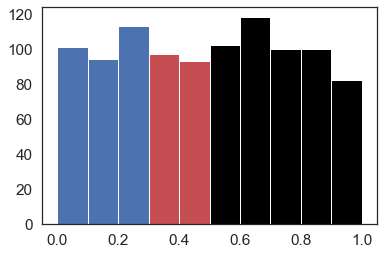

time: 83.3 ms (started: 2023-01-10 16:53:33 -08:00)


In [138]:
figsize=(6,4)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize)
data = np.random.rand(1000)

N, bins, patches = ax.hist(data, edgecolor='white', linewidth=1)

for i in range(0,3):
    patches[i].set_facecolor('b')
for i in range(3,5):    
    patches[i].set_facecolor('r')
for i in range(5, len(patches)):
    patches[i].set_facecolor('black')

plt.show()

In [139]:
# print('option 1: 90% '+str('Conversion Rate')+' with 34% recall. And 95% confidence of conversion rate between '+str(round(lower_metric_value*100))+'% and '+str(round(upper_metric_value*100))+'%')


time: 502 µs (started: 2023-01-10 16:53:34 -08:00)


In [140]:
# def get_model_and_survey_metric_confidence_interval_table(df):
#     '''
#     df:contain model/survey y predicted, y actual, and feature for filtering
    
#     '''
    
    
#     return None



# _ = \
# get_model_and_survey_metric_confidence_intervals(df=df_y_test_model_name_predicted_y_test_survey_recall_estimate_predicted_y_actual_coupon_venue_type)

# type(_)

time: 503 µs (started: 2023-01-10 16:53:34 -08:00)


In [141]:


#get confidence interval of precision
    #get parametric random sample test rows with replacement
    #get 10,000 of them
    
    #get precision, recall, and other metrics for each sample
    
    #plot a graph of the precision confidence interval
    
    #plot recall confidence interval, plot recall confidnece interval of some subset of good precision
    
    #plot precision vs recall
    



time: 613 µs (started: 2023-01-10 16:53:34 -08:00)


## Get Survey Test  Metrics for .8 Recall Estimated

SURVEY TEST
baseline_precision: 57.1%
baseline_recall: 100.0%
baseline_accuracy: 57.1%
tn: 0
fp: 1088
fn: 0
tp: 1449
In the survey test, selecting 100% of survey scenario response cases, i.e. all 2537 coupon recommendations, in 1449 cases the coupon was accepted with the participant saying they would use it,     a 57.1% acceptance rate
This is a 57.1% survey conversion rate and 1449 survey conversions


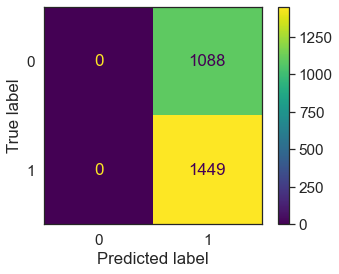

time: 77.9 ms (started: 2023-01-10 16:53:34 -08:00)


In [142]:
data_fold_type='test'
class_1_probability = 1


number_of_predictions = data_frame_collection['Y_'+data_fold_type].shape[0]

y_true=data_frame_collection['Y_'+data_fold_type]

np.random.seed(200)
class_0_probability = 1-class_1_probability


y_pred=np.random.choice([0, 1], size=number_of_predictions, p=[class_0_probability, class_1_probability])


print('SURVEY ' + data_fold_type.upper())
baseline_precision = precision_score(y_true, y_pred)
baseline_recall = recall_score(y_true, y_pred)
baseline_accuracy = accuracy_score(y_true, y_pred)

print('baseline_precision: '+ str(round(baseline_precision*100, 1)) + '%')
print('baseline_recall: ' + str(round(baseline_recall*100, 1)) + '%')
print('baseline_accuracy: ' + str(round(baseline_accuracy*100, 1)) + '%')

confusion_matrix_ndarray = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = confusion_matrix_ndarray.ravel()
print('tn: ' + str(tn))
print('fp: ' + str(fp))
print('fn: ' + str(fn))
print('tp: ' + str(tp))


if (class_1_probability == 1):
    print('In the survey '+ data_fold_type +', selecting ' + str(class_1_probability*100) + '% of survey scenario response cases, i.e. all ' + str(tp + fp + tn + fn) + ' coupon recommendations, in ' + str(tp+fn) + ' cases the coupon was accepted with the participant saying they would use it,\
     a ' + str(round(tp/(tp+fp)*100,1)) + '% acceptance rate')
else:
    print('In the survey test, selecting approximately ' + str(class_1_probability*100) + '% of the survey scenario response cases, i.e. ' + str(tp+fp) + ' coupon recommendations, in '+ str(tp) + ' cases the coupon was accepted with the participant saying they would use it, a ' + str(round(tp/(tp+fp)*100,1)) + '% acceptance rate')

print('This is a ' + str(round(baseline_precision*100, 1)) + '% survey conversion rate and ' + str(tp) + ' survey conversions') 

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_ndarray, display_labels=[0,1])
disp.plot()
plt.grid(False)

plt.show()

SURVEY TEST
baseline_precision: 56.6%
baseline_recall: 78.7%
baseline_accuracy: 53.4%
tn: 213
fp: 875
fn: 308
tp: 1141
In the survey test, selecting approximately 80.0% of the survey scenario response cases, i.e. 2016 coupon recommendations, in 1141 cases the coupon was accepted with the participant saying they would use it, a 56.6% acceptance rate
This is a 56.6% survey conversion rate and 1141 survey conversions


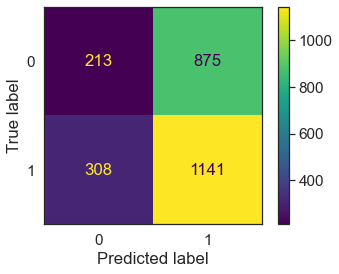

time: 78.2 ms (started: 2023-01-10 16:53:34 -08:00)


In [143]:
data_fold_type='test'
class_1_probability = .8


number_of_predictions = data_frame_collection['Y_'+data_fold_type].shape[0]

y_true=data_frame_collection['Y_'+data_fold_type]

np.random.seed(200)
class_0_probability = 1-class_1_probability


y_pred=np.random.choice([0, 1], size=number_of_predictions, p=[class_0_probability, class_1_probability])


print('SURVEY ' + data_fold_type.upper())
baseline_precision = precision_score(y_true, y_pred)
baseline_recall = recall_score(y_true, y_pred)
baseline_accuracy = accuracy_score(y_true, y_pred)

print('baseline_precision: '+ str(round(baseline_precision*100, 1)) + '%')
print('baseline_recall: ' + str(round(baseline_recall*100, 1)) + '%')
print('baseline_accuracy: ' + str(round(baseline_accuracy*100, 1)) + '%')

confusion_matrix_ndarray = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = confusion_matrix_ndarray.ravel()
print('tn: ' + str(tn))
print('fp: ' + str(fp))
print('fn: ' + str(fn))
print('tp: ' + str(tp))


if (class_1_probability == 1):
    print('In the survey '+ data_fold_type +', selecting ' + str(class_1_probability*100) + '% of survey scenario response cases, i.e. all ' + str(tp + fp + tn + fn) + ' coupon recommendations, in ' + str(tp+fn) + ' cases the coupon was accepted with the participant saying they would use it,\
     a ' + str(round(tp/(tp+fp)*100,1)) + '% acceptance rate')
else:
    print('In the survey test, selecting approximately ' + str(class_1_probability*100) + '% of the survey scenario response cases, i.e. ' + str(tp+fp) + ' coupon recommendations, in '+ str(tp) + ' cases the coupon was accepted with the participant saying they would use it, a ' + str(round(tp/(tp+fp)*100,1)) + '% acceptance rate')

print('This is a ' + str(round(baseline_precision*100, 1)) + '% survey conversion rate and ' + str(tp) + ' survey conversions') 

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_ndarray, display_labels=[0,1])
disp.plot()
plt.grid(False)

plt.show()

### Random Forest Classifier: All Data, Reduced Features

In [144]:
#drop repeated features with 99-100% correlation
drop_features_list = ['income_ordinal_integer_encoding',
                      'age_ordinal_integer_encoding',
                      'time_ordinal_integer_encoding',
                      'temperature_ordinal_integer_encoding']

#get all preprocessed data
df_X_train_test = pd.concat([data_frame_collection['X_train'], data_frame_collection['X_test']], axis=0).drop(columns=drop_features_list)
df_Y_train_test = pd.concat([data_frame_collection['Y_train'], data_frame_collection['Y_test']], axis=0)

#get data frame with all data
df_X_train_test_Y_train_test = pd.concat([df_X_train_test, df_Y_train_test], axis=1)
del df_X_train_test, df_Y_train_test

#train random forest classifer all data
random_forest_classifier_all_data = RandomForestClassifier(bootstrap=False, max_depth=25, min_samples_split=5, n_estimators=200, random_state=200)
random_forest_classifier_all_data.fit(df_X_train_test_Y_train_test.drop(columns=['Y']), df_X_train_test_Y_train_test.loc[:, 'Y'])
random_forest_classifier_all_data_fit = random_forest_classifier_all_data
del random_forest_classifier_all_data



#save random forest classifier all data
model_readback = icr.return_saved_model_if_it_exists(filename=random_forest_classifier_all_data_fit_filename)
if model_readback != None:
    random_forest_classifier_all_data_fit = model_readback
else:   
    #add model environment data to model
    random_forest_classifier_all_data_fit.version = model_version
    random_forest_classifier_all_data_fit.pandas_version = pd.__version__
    random_forest_classifier_all_data_fit.numpy_version = np.__version__
    random_forest_classifier_all_data_fit.sklearn_version = sklearn_version
    random_forest_classifier_all_data_fit.X_columns = [column_name for column_name in df_X_train_test_Y_train_test.drop(columns=['Y']).columns]
    random_forest_classifier_all_data_fit.build_datetime = datetime.datetime.now()
    
    #save it
    random_forest_classifier_all_data_fit = icr.save_and_return_model(random_forest_classifier_all_data_fit, filename=random_forest_classifier_all_data_fit_filename)
    
random_forest_classifier_all_data_fit


This file already exists


RandomForestClassifier(bootstrap=False, max_depth=25, min_samples_split=5,
                       n_estimators=200, random_state=200)

time: 3.14 s (started: 2023-01-10 16:53:34 -08:00)


### Get Feature Importances Plot

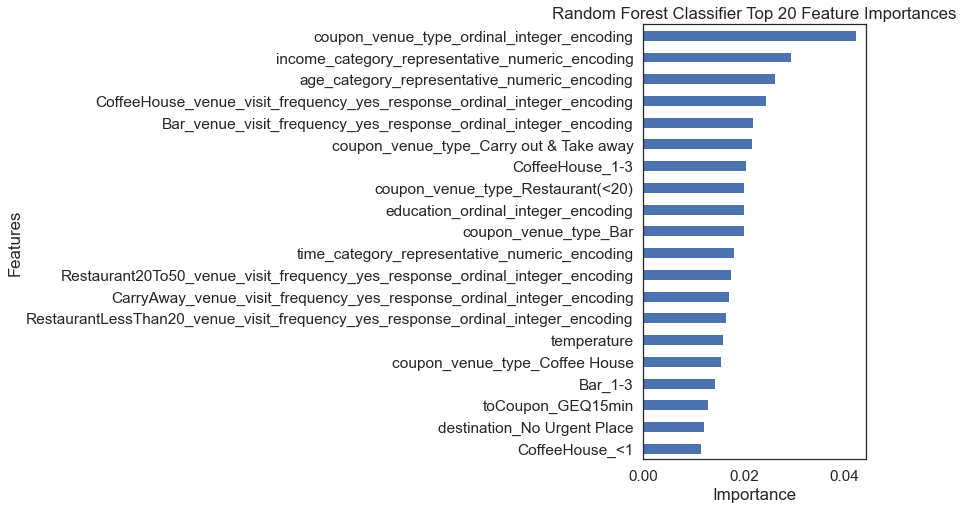

time: 325 ms (started: 2023-01-10 16:53:37 -08:00)


In [145]:
dpi=100
figure_filename = '../reports/figures/figure_random_forest_classifier_all_data_fit_top_20_feature_importances_dpi_' + str(dpi) + '_v' + filename_version + '.png'

figure_filename_exists = os.path.isfile(figure_filename)
if figure_filename_exists == True:
    img = mpimg.imread(figure_filename)
    plt.figure(figsize=(15, 12))
    plt.grid(False)
    plt.axis('off')
    plt.imshow(img)
else:
    plt.subplots(figsize=(4, 8))

    random_forest_classifier_all_data_fit_feature_importances = random_forest_classifier_all_data_fit.feature_importances_
    series_random_forest_classifier_all_data_fit_feature_importances = pd.Series(random_forest_classifier_all_data_fit_feature_importances, 
                                                                                 index=random_forest_classifier_all_data_fit.X_columns).sort_values(ascending=False)

    series_random_forest_classifier_all_data_fit_feature_importances[0:20].sort_values(ascending=True).plot(kind='barh')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.title('Random Forest Classifier Top 20 Feature Importances');

    plt.savefig(figure_filename, bbox_inches='tight', dpi=100)

plt.show()

### Random Forest Classifier: All Data, Reduced Features

#### Get Random Forest Features By Importance

In [146]:
#get and order random forest features by importance
random_forest_classifier_all_data_fit_feature_importances = random_forest_classifier_all_data_fit.feature_importances_
series_random_forest_classifier_all_data_fit_feature_importances = pd.Series(random_forest_classifier_all_data_fit_feature_importances,
                                                                             index=random_forest_classifier_all_data_fit.X_columns).sort_values(ascending=False)


#get top 25 and 50 features list
column_name_list_random_forest_classifier_all_data_top_50_by_feature_importance_target = series_random_forest_classifier_all_data_fit_feature_importances[0:50].index.to_list() + ['Y']
column_name_list_random_forest_classifier_all_data_top_25_by_feature_importance_target = series_random_forest_classifier_all_data_fit_feature_importances[0:25].index.to_list() + ['Y']

pl(column_name_list_random_forest_classifier_all_data_top_50_by_feature_importance_target)


51


['coupon_venue_type_ordinal_integer_encoding',
 'income_category_representative_numeric_encoding',
 'age_category_representative_numeric_encoding',
 'CoffeeHouse_venue_visit_frequency_yes_response_ordinal_integer_encoding',
 'Bar_venue_visit_frequency_yes_response_ordinal_integer_encoding',
 'coupon_venue_type_Carry out & Take away',
 'CoffeeHouse_1-3',
 'coupon_venue_type_Restaurant(<20)',
 'education_ordinal_integer_encoding',
 'coupon_venue_type_Bar',
 'time_category_representative_numeric_encoding',
 'Restaurant20To50_venue_visit_frequency_yes_response_ordinal_integer_encoding',
 'CarryAway_venue_visit_frequency_yes_response_ordinal_integer_encoding',
 'RestaurantLessThan20_venue_visit_frequency_yes_response_ordinal_integer_encoding',
 'temperature',
 'coupon_venue_type_Coffee House',
 'Bar_1-3',
 'toCoupon_GEQ15min',
 'destination_No Urgent Place',
 'CoffeeHouse_<1',
 'coupon_venue_type_Restaurant(20-50)',
 'has_children',
 'maritalStatus_Single',
 'passenger_Friend(s)',
 'weather

time: 17.1 ms (started: 2023-01-10 16:53:37 -08:00)


#### Identify High Correlation Features For Drop

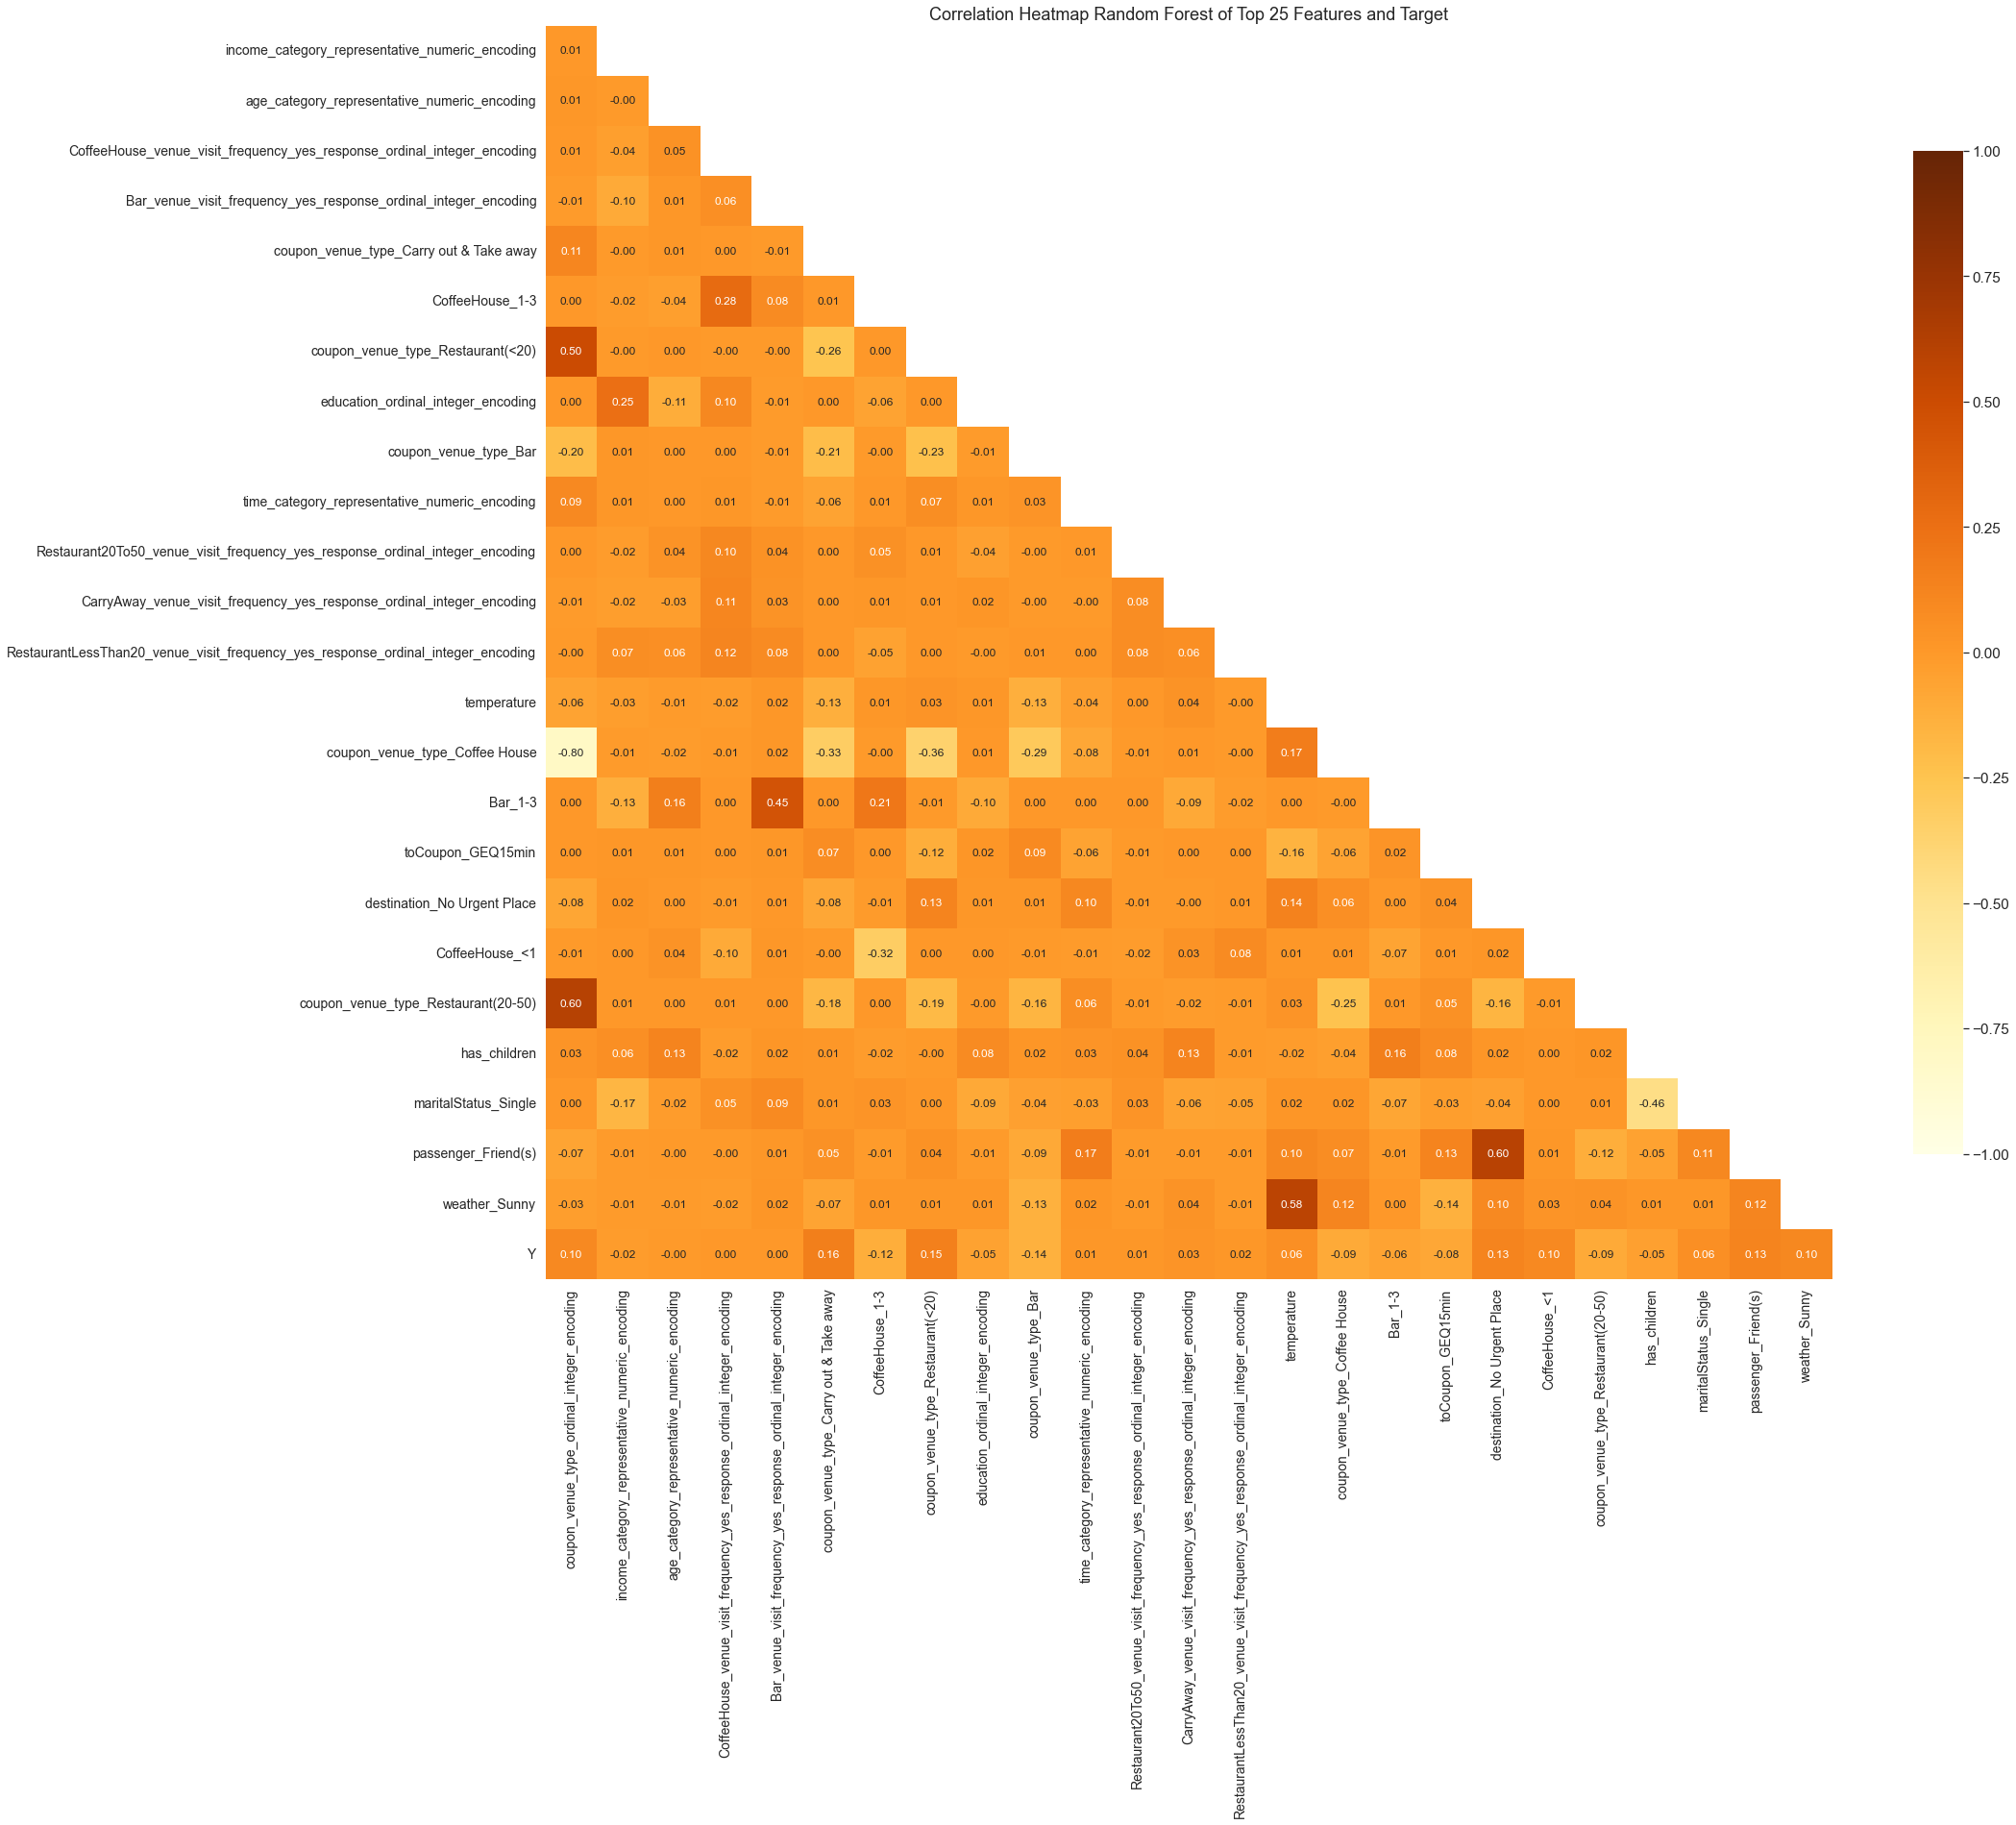

time: 2.2 s (started: 2023-01-10 16:53:37 -08:00)


In [147]:
#Identify High Correlation Features For Drop
dpi=100
figure_filename = '../reports/figures/figure_correlation_heatmap_random_forest_classifier_all_data_top_25_and_target_dpi_' + str(dpi) + '_v' + filename_version + '.png'

figure_filename_exists = os.path.isfile(figure_filename)
if figure_filename_exists == True:
    img = mpimg.imread(figure_filename)
    plt.figure(figsize=(35, 28))
    plt.grid(False)
    plt.axis('off')
    plt.imshow(img)
else:
    #correlation heatmap of top 25 features and target

    df_corr = df_X_train_test_Y_train_test.loc[:, column_name_list_random_forest_classifier_all_data_top_25_by_feature_importance_target].corr()

    fig, ax = plt.subplots(figsize=(30, 24))

    mask = np.triu(np.ones_like(df_corr, dtype=bool))
    mask = mask[1:, :-1]

    corr = df_corr.iloc[1:,:-1].copy()

    sns.set(font_scale=1.4)
    sns.set_style("white")

    res = sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", annot_kws={"size": 12}, cmap='YlOrBr', vmin=-1, vmax=1, cbar_kws={"shrink": .8})
    res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 14, rotation=90)
    res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14, rotation=0)
    plt.title('Correlation Heatmap Random Forest of Top 25 Features and Target', fontsize=18)

    #save it
    plt.savefig(figure_filename, bbox_inches='tight', dpi=dpi)

plt.show()



In [148]:
top_25_feature_importance_duplicate_like_features_list = \
['income_ordinal_integer_encoding',
 'income_category_representative_numeric_encoding',
 'age_category_representative_numeric_encoding',
 'age_ordinal_integer_encoding',
 'time_ordinal_integer_encoding',
 'time_category_representative_numeric_encoding',
 'temperature_ordinal_integer_encoding',
 'temperature']

top_25_feature_importance_duplicate_like_features_list_drop = \
['income_ordinal_integer_encoding',
 'age_ordinal_integer_encoding',
 'time_ordinal_integer_encoding',
 'temperature_ordinal_integer_encoding']

pl(top_25_feature_importance_duplicate_like_features_list_drop)

4


['income_ordinal_integer_encoding',
 'age_ordinal_integer_encoding',
 'time_ordinal_integer_encoding',
 'temperature_ordinal_integer_encoding']

time: 2.3 ms (started: 2023-01-10 16:53:39 -08:00)


In [149]:
dir()

['Audio',
 'ConfusionMatrixDisplay',
 'GradientBoostingClassifier',
 'GridSearchCV',
 'In',
 'N',
 'N_population_size',
 'Out',
 'RandomForestClassifier',
 'StandardScaler',
 'StratifiedKFold',
 'StratifiedKFold_5_splits',
 'Y_test_gradient_boosting_prediction_probability_class0_class1_ndarray',
 'Y_test_random_forest_prediction_probability_class0_class1_ndarray',
 'Y_train_plot',
 '_',
 '_10',
 '_100',
 '_102',
 '_103',
 '_104',
 '_105',
 '_106',
 '_109',
 '_11',
 '_110',
 '_114',
 '_115',
 '_117',
 '_118',
 '_119',
 '_12',
 '_121',
 '_122',
 '_123',
 '_124',
 '_125',
 '_127',
 '_128',
 '_129',
 '_13',
 '_130',
 '_133',
 '_134',
 '_144',
 '_146',
 '_148',
 '_15',
 '_16',
 '_17',
 '_18',
 '_24',
 '_25',
 '_27',
 '_33',
 '_34',
 '_35',
 '_43',
 '_64',
 '_71',
 '_73',
 '_77',
 '_78',
 '_8',
 '_82',
 '_83',
 '_84',
 '_85',
 '_86',
 '_87',
 '_88',
 '_89',
 '_90',
 '_93',
 '_94',
 '_95',
 '_96',
 '_97',
 '_98',
 '_99',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__

time: 5.66 ms (started: 2023-01-10 16:53:39 -08:00)


In [150]:
!pip3 install watermark

%load_ext watermark

Defaulting to user installation because normal site-packages is not writeable
time: 1.39 s (started: 2023-01-10 16:53:39 -08:00)


In [151]:
%watermark -a "Paul Jacob" -d -t -v -p numpy,pandas -g

Author: Paul Jacob

Python implementation: CPython
Python version       : 3.9.12
IPython version      : 8.2.0

numpy : 1.21.5
pandas: 1.4.2

Git hash: 737568e12c2d8b86edf1d18ef30fc3c1dac35ad8

time: 48.1 ms (started: 2023-01-10 16:53:41 -08:00)


In [152]:
#https://towardsdatascience.com/generating-a-requirements-file-jupyter-notebook-385f1c315b52



time: 757 µs (started: 2023-01-10 16:53:41 -08:00)


Modeling Test Results Summary: 
- **1. Take each of two decision thresholds selected in Model Train Results for estimated .9 Precision and estimated .8 Recall.**
- **2. Based on demographic and scenario features, get coupon acceptance or refusal prediction probabilities.**
- **3. Combine model prediction probabilities and decision threshold to get recommendation to offer or not offer a coupon.**
- **4. Get metrics for coupon recommendations, e.g. conversion rate, number of coupons recommended, number of conversions, and recall**

- **Survey results???**
- **line**
    - **line1** line1
    - **exploratory data analysis** (pandas Foundations, Module Two)
- **line2** line2


we make decisions on who to offer a coupon to in the survey given their demographic and scenario features